In [41]:
# from google.colab import drive
# drive.mount("/content/drive")

<img src="https://raw.githubusercontent.com/barauna-lo/Code_Library/refs/heads/main/Logo_IFAST.jpeg" width="800" align="center">


# READ ME

A general code for preprocessing.

Important contributions to this code were made by:
- [Luan Orion Baraúna](https://www.linkedin.com/in/barauna-lo/)
- Thiago Franke Melchiors (FGV)
- Yonathan Rabinovici Gherman(FGV)
- Luan Rodrigues de Carvalho(FGV)
- Mariana Lima de Brito Oliveira(FGV)
- Eduardo Lapa Ramos(FGV)
- Eliane Da Silva Moreira(FGV)
- Gustavo Luciano dos Santos(FGV)

#### Supervisors
- Leonardo Bacelar Lima Santos
- Luiz Fernando Satolo
- Walter Wagner Carvalho Sande(FGV)


## Imports

In [42]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import pacf, acf
from matplotlib.dates import DateFormatter
from scipy.signal import periodogram
import matplotlib.dates as mdates
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

## File handling

### Files used can be found at: 
https://drive.google.com/drive/folders/1NCrHzWVHG67q1ooWqbJqyJ7gFvjuPOiL?usp=sharing
### No downloading nescessary!

In [43]:
def read_csv(path: str) -> pd.DataFrame:
    """Reads a CSV file into a Pandas DataFrame.

    Args:
        path (str): The path to the CSV file.

    Returns:
        pd.DataFrame: A DataFrame containing the data from the CSV file.
    """

    return pd.read_csv(path)


def into_txt(data: pd.DataFrame, file_name: str) -> None:
    """Writes a Pandas DataFrame to a text file.

    Args:
        data (pd.DataFrame): The DataFrame to be written to the text file.
        file_name (str): The name of the text file to be created.

    Returns:
        None
    """

    with open(file_name, 'w') as f:
        f.write(data.to_string())

#### Loading data

In [ ]:
# Path to working directory
Tamanduatei = "13anjuaBD8Dr9S6DboQkwbtjYt3u51hOP"
Bengalas = "1CyGsX0XeoAZ43tG216KEZZ3JYMvTQhBL"
Negro_uruguai = "1_Ql8U7GI2VGHmPbeWRKOOQQRvDknxwlt"

path = f'https://drive.google.com/uc?export=download&id={Negro_uruguai}' # Use the content directory for uploaded files

# Data files
data_Negro_uruguai = read_csv(f'https://drive.google.com/uc?export=download&id={Negro_uruguai}' )
# data_Negro_uruguai = data_Negro_uruguai.drop(columns = ["Unnamed: 0"])  # Remove indexes column
data_Bengalas = read_csv(f'https://drive.google.com/uc?export=download&id={Bengalas}' )
# df_missing_data = read_csv(path + "Jaqueline_com_dados_faltando.csv")
data_Tamanduatei = read_csv(f'https://drive.google.com/uc?export=download&id={Tamanduatei}' )
# data_pcd = pd.read_excel(path + "PCDs_/PCD_Acqua_CE_230240401C.xlsx")

## Graphical Views

In [44]:
def plot_time_series(
        data: pd.DataFrame,
        time_column: str,
        value_column_1: str = None,
        value_column_2: str = None,
        output_path: str = None,
        file_name: str = None,
        display_graph: bool = False,
        title_1: str = "Value 1",
        title_2: str = "Value 2"
    ) -> None:
    """
    Plots time series data with the ability to handle either one or two types of data.
    It can plot data with two y-axes if both value columns are provided.

    Parameters:
        data (pd.DataFrame): The dataframe containing the time series data.
        time_column (str): The name of the column containing the time data. This column will be used for the x-axis.
        value_column_1 (str, optional): The name of the first value column to be plotted on the left y-axis. Defaults to None.
        value_column_2 (str, optional): The name of the second value column to be plotted on the right y-axis, mirrored. Defaults to None.
        output_path (str, optional): The directory path where the resulting plot image will be saved. If None, the plot is not saved.
        file_name (str, optional): The name of the file to save the plot as. Required if output_path is provided.
        display_graph (bool): If True, displays the generated plot. Defaults to False.
        title_1 (str): Title for the first value column plot (left y-axis). Defaults to "Value 1".
        title_2 (str): Title for the second value column plot (right y-axis). Defaults to "Value 2".

    Returns:
        None: This function does not return any value. It generates and optionally saves/displays a plot.

    Raises:
        ValueError: If output_path is provided but file_name is not.
    """
    fig, ax1 = plt.subplots(figsize = (10, 6))
    fig.patch.set_facecolor("#E6ECE9")  # Background color (off axis)

    # Standardize datetime column
    data[time_column] = pd.to_datetime(data[time_column], errors="coerce")

    if value_column_1:
        color1 = "#FFA07A"
        ax1.set_xlabel("Time")
        ax1.set_ylabel(title_1, color = color1)
        ax1.plot(data[time_column], data[value_column_1], color = color1, drawstyle='steps-post')
        ax1.tick_params(axis = "y", labelcolor = color1)
        ax1.set_facecolor("#D9DFD7")  # Background color (inside the axis)

    if value_column_2:
        ax2 = ax1.twinx() if value_column_1 else ax1
        color2 = "#31708E"
        ax2.set_ylabel(title_2, color = color2)
        ax2.plot(data[time_column], data[value_column_2], color = color2, drawstyle='steps-post')
        ax2.tick_params(axis = "y", labelcolor = color2)
        ax2.invert_yaxis()  # Negative values for mirroring
        # Ensure that the mirror axis starts at zero and ends a little after its highest value
        max_val_2 = data[value_column_2].max()
        ax2.set_ylim(max_val_2 * 1.1, 0)
        ax2.set_facecolor("#D9DFD7")  # Background color (inside the axis)

    fig.tight_layout(pad=3.0)  # Adjust the padding so as not to cut off the title
    plt.title(f"{title_1} and {title_2} over time" if value_column_1 and value_column_2 else title_1 if value_column_1 else title_2)

    # Saving the figure
    plt.gcf().autofmt_xdate()  # Automatic formatting of dates for better viewing
    plt.gca().xaxis.set_major_formatter(DateFormatter("%Y-%m"))  # Formatting the x-axis to show year-month

    if output_path:
        if file_name is None:
            raise ValueError("file_name must be provided if output_path is specified.")
        if not os.path.exists(output_path):
            os.makedirs(output_path)

        plt.savefig(output_path+file_name, bbox_inches="tight")

    if display_graph:
        plt.show()


def plot_histogram(
        data: pd.DataFrame,
        column: str,
        save_to_file: str = False,
        display_graph: bool = False,
        title: str = "Histogram to visualize the distribution of data"
    ) -> None:
    """
    Creates and saves a histogram of a specified column from a DataFrame.

    Parameters:
        data (pd.DataFrame): The DataFrame containing the data.
        column (str): The column name in the DataFrame for which the histogram will be plotted.
        save_to_file (str, optional): The directory path where the histogram image will be saved. If None, the plot is not saved.
        display_graph (bool): If True, displays the generated graph. Defaults to False.
        title (str): The title for the histogram. Defaults to "Histogram to visualize the distribution of data".

    Returns:
        None: This function does not return any value. It generates and optionally saves/displays a plot.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(data[column], bins=30, color="#689D8D", edgecolor="black")
    plt.xlim(data[column].min(), data[column].max())

    plt.title(title)
    plt.xlabel(column)
    plt.ylabel("Frequency")

    plt.gca().set_facecolor("#D9DFD7")  # Lighter off-axis background color
    plt.gcf().patch.set_facecolor("#E6ECE9")  # Greenish-gray background color
    plt.tight_layout(pad=2)

    # If a file path is provided, save the plot
    if save_to_file:
        # if path does not exist, create it
        if not os.path.exists(save_to_file):
            os.makedirs(save_to_file)
        plt.savefig(f"{save_to_file}{column}.png", dpi=300, bbox_inches="tight")

    if display_graph:
        plt.show()


def plot_boxplot(
        data: pd.DataFrame,
        columns: list,
        save_to_file: str = None,
        display_graph: bool = False,
        titles: list = ["Value 1", "Value 2"]
    ) -> None:
    """
    Creates and saves boxplots for specified columns from a DataFrame. It handles cases where one or both columns may be missing.

    Parameters:
        data (pd.DataFrame): The DataFrame containing the data.
        columns (list): A list of column names for which boxplots will be created.
        save_to_file (str, optional): The directory path where the boxplot image(s) will be saved. If None, the plot(s) are not saved.
        display_graph (bool): If True, displays the generated graph(s). Defaults to False.
        titles (list): A list of titles corresponding to each boxplot. The order should match the order of columns. Defaults to ["Value 1", "Value 2"].

    Returns:
        None: This function does not return any value. It generates and optionally saves/displays plot(s).
    """
    # Filter out None values and prepare titles accordingly
    valid_columns = [col for col in columns if col]
    valid_titles = [titles[i] for i in range(len(columns)) if columns[i]]

    if not valid_columns:  # If no valid columns, do nothing
        print("No valid columns provided for boxplot.")
        return

    # Determine the number of subplots based on the number of valid columns
    num_plots = len(valid_columns)
    fig, axs = plt.subplots(1, num_plots, figsize=(6 * num_plots, 6))

    if num_plots == 1:
        axs = [axs]  # Make it iterable for consistency in the for loop below

    for i, column in enumerate(valid_columns):
        axs[i].boxplot(data[column].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor="#689D8D", color="#689D8D"))
        axs[i].set_title(valid_titles[i])
        axs[i].set_ylabel("Values")
        axs[i].set_facecolor("#E6ECE9")

    plt.gcf().patch.set_facecolor("#D9DFD7")
    plt.tight_layout(pad=2)

    # If a file path is provided, save the plot
    if save_to_file:
        # if path does not exist, create it
        if not os.path.exists(save_to_file):
            os.makedirs(save_to_file)
        # Save each boxplot individually
        for i, column in enumerate(valid_columns):
            plt.figure() # Create a new figure for each boxplot to save them separately
            plt.boxplot(data[column].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor="#689D8D", color="#689D8D"))
            plt.title(valid_titles[i])
            plt.ylabel("Values")
            plt.gca().set_facecolor("#E6ECE9")
            plt.gcf().patch.set_facecolor("#D9DFD7")
            plt.tight_layout(pad=2)
            plt.savefig(f"{save_to_file}{column}_boxplot.png", dpi=300, bbox_inches="tight")
            plt.close() # Close the figure to free up memory


    if display_graph:
        plt.show()

def plot_violinplot(
        data: pd.DataFrame,
        columns: list,
        save_to_file: str = None,
        display_graph: bool = False,
        titles: list = ["Value 1", "Value 2"]
    ) -> None:
    """
    Creates and saves violin plots for specified columns from a DataFrame. It handles cases where one or both columns may be missing.

    Parameters:
        data (pd.DataFrame): The DataFrame containing the data.
        columns (list): A list of column names for which violin plots will be created.
        save_to_file (str, optional): The directory path where the violin plot image(s) will be saved. If None, the plot(s) are not saved.
        display_graph (bool): If True, displays the generated graph(s). Defaults to False.
        titles (list): A list of titles corresponding to each violin plot. The order should match the order of columns. Defaults to ["Value 1", "Value 2"].

    Returns:
        None: This function does not return any value. It generates and optionally saves/displays plot(s).
    """
    # Filter out None values and prepare titles accordingly
    valid_columns = [col for col in columns if col]
    valid_titles = [titles[i] for i in range(len(columns)) if columns[i]]

    if not valid_columns:  # If no valid columns, do nothing
        print("No valid columns provided for violin plot.")
        return

    # Determine the number of subplots based on the number of valid columns
    num_plots = len(valid_columns)
    fig, axs = plt.subplots(1, num_plots, figsize=(6 * num_plots, 6))

    if num_plots == 1:
        axs = [axs]  # Make it iterable for consistency in the for loop below

    for i, column in enumerate(valid_columns):
        sns.violinplot(ax=axs[i], data=data, y=column, palette="muted", inner="quartile")
        axs[i].set_title(valid_titles[i])
        axs[i].set_ylabel("Values")
        axs[i].set_facecolor("#E6ECE9")

    plt.gcf().patch.set_facecolor("#D9DFD7")
    plt.tight_layout(pad=2)

    # If a file path is provided, save the plot
    if save_to_file:
        # if path does not exist, create it
        if not os.path.exists(save_to_file):
            os.makedirs(save_to_file)
        # Save each violin plot individually
        for i, column in enumerate(valid_columns):
            plt.figure() # Create a new figure for each violin plot to save them separately
            sns.violinplot(data=data, y=column, palette="muted", inner="quartile")
            plt.title(valid_titles[i])
            plt.ylabel("Values")
            plt.gca().set_facecolor("#E6ECE9")
            plt.gcf().patch.set_facecolor("#D9DFD7")
            plt.tight_layout(pad=2)
            plt.savefig(f"{save_to_file}{column}_violinplot.png", dpi=300, bbox_inches="tight")
            plt.close() # Close the figure to free up memory

    if display_graph:
        plt.show()

## Database processing

### Basic processing

In [45]:
# def replace_missing_data(df: pd.DataFrame) -> pd.DataFrame:
#     """
#     Fills Nan or Null values with the corresponding missing column data of the
#     datapoint above it. In case the missing data is the first datapoint of
#     the DataFrame, it's filled with 0.0.

#     Parameters:
#         df (pd.DataFrame): The dataframe with excpecting missing data.

#     Returns:
#         pd.DataFrame: The dataframe with the missing data filled.
#     """

#     # If any data is missing, returns the original DataFrame
#     if (df.isnull().sum() == 0).all():
#         return df
#     else:
#         # Fill the missing data with the datapoint above
#         df_filled = df.fillna(method='ffill')
#         if (df_filled.isnull().sum() == 0).all():
#             return df_filled
#         else:
#             # In case there are still missing data (miss data in the first datapoint)
#             df_filled = df_filled.fillna(0.0)
#             return df_filled


def take_mean_duplicates(df: pd.DataFrame, temporal_column: str) -> pd.DataFrame:
    """
    Replaces rows with duplicate values in a specified temporal column with a single row
    containing the mean of the duplicated values for all other columns.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        temporal_column (str): The name of the column to check for duplicate values.

    Returns:
          pd.DataFrame: The DataFrame with duplicates in the temporal column replaced
                        by their mean, sorted by the temporal column.
    """
    # If there are no duplicates
    if (df.duplicated(subset=temporal_column, keep = False) == False).all():
        return df
    # If there is any duplicate
    else:
        duplicates = df.duplicated(subset = temporal_column, keep = False)
        duplicates_mean = df[duplicates].groupby(temporal_column).mean().reset_index()

        df.drop_duplicates(subset = temporal_column, keep = False, inplace = True)
        df = pd.concat([df, duplicates_mean], ignore_index = True)

        df = df.sort_values(by = temporal_column)
        df = df.reset_index().drop(['index'], axis = 1)

        return df

### Missing data statistics

<br>

- **Calculation of Percentage of Missing Data:**
  - **Explanation:** Measures the fraction of missing values in each column of a dataset and is essential for evaluating data quality. The formula used is:

    $$
    \text{Percentage of Missing Data} = \frac{n_{\text{miss}}}{n} \times 100\%
    $$

    Where $n$ is the total number of observations and $n_{\text{miss}}$ is the number of missing observations.
        
    <br>

  - **Reference:** For more information on missing data handling in Pandas, see the official documentation:
    - [Pandas Handling Missing Data](https://pandas.pydata.org/docs/user_guide/missing_data.html)

    <br>
- **Handling Missing Values:**
  - **Explanation:** Techniques for addressing missing data.
    - *Filling with Zero:* Replaces missing values with zero.
    - *Row Removal:* Removes rows that contain missing values in specific columns.
    - *Linear Interpolation:* Estimates missing values based on a linear relationship between known data points surrounding the missing entry. This is especially useful for time series. For example, if the missing value is $X_t$, then:

    <br>

      $$X_t \approx X_{t-1} + \frac{X_{t+1} - X_{t-1}}{2}$$
    
    <br>

  - **Reference:** For methods to handle missing data in Pandas, see:
    - [Pandas fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)
    - [Pandas dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)
    - [Pandas interpolate](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html)


<br>

In [46]:
def missing_data_percentage(df: pd.DataFrame) -> None:
    """
    Calculates the percentage of missing data for each column in the DataFrame
     and saves the results to a file named 'missing_data_report.txt'.

    Args:
        df (pd.DataFrame): The DataFrame for which to calculate missing data percentages.

    Returns:
        None: The function saves a report to a file and does not return a value.
    """
    missing_percentages = df.isna().mean() * 100
    with open('missing_data_report.txt', 'w') as file:
        for column, percentage in missing_percentages.items():
            file.write(f'{column}: {percentage:.2f}%\n')


# def plot_missing_data_matrix(
#         data: pd.DataFrame,
#         name: str,
#         output_path: str = None,
#         display_graph: bool = False
#     ) -> None:
#     """
#     Plots a matrix of 0s and 1s to indicate the presence of missing data in PCD dataframes.

#     Parameters:
#         data (pd.DataFrame): The dataframe to plot the missing data matrix.
#         name (str): The title of the dataset.
#         output_path (str, optional): If provided, saves the missing data matrix plot to a file.
#         display_graph (bool): Displays the graph if true.
#     """
#     # Create a matrix of 0s and 1s to indicate the presence of missing data
#     missing_data = data.isnull().astype(int)
#     missing_data.drop(columns=["Time"], inplace=True)

#     #y_g Plot the matrix
#     plt.figure(figsize=(18, 1.5))
#     plt.imshow(missing_data.T, cmap="binary", aspect="auto", interpolation="nearest")
#     plt.grid(False)
#     plt.yticks(ticks=range(3), labels=["Precip", "US10cm", "US20cm"])
#     plt.title(f"Missing Data in {name} dataset")

#     if output_path:
#         plt.savefig(output_path, bbox_inches="tight")

#     if displaraph:
#         plt.show()

def handle_missing_values(
        data: pd.DataFrame,
        columns: list = None,
        method: str = "fill_zeros"
    ) -> pd.DataFrame:
    """
    Handles missing values in the specified columns of a DataFrame using various methods.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        columns (list, optional): A list of column names to process for missing values. If None, all columns are processed.
        method (str): Method to handle missing values. Options are:
                      - "fill_zeros": Fill missing values with zero.
                      - "drop_rows": Remove rows with missing values.
                      - "linear_interpolation": Fill missing values using linear interpolation.
                      - : Fill missing values using exponential interpolation.  (Note: This option is incomplete in the original code)

    Returns:
        pd.DataFrame: The DataFrame with missing values handled according to the specified method.

    Raises:
        ValueError: If an invalid method is provided.
    """
    if method not in ["fill_zeros", "drop_rows", "linear_interpolation", ]:
        raise ValueError("Invalid method. Choose from 'fill_zeros', 'drop_rows', or 'linear_interpolation'")

    data = data.copy()

    if columns is None:
        columns = data.columns.tolist()

    if method == "fill_zeros":
        for column in columns:
            data[column] = data[column].fillna(0)

    elif method == "drop_rows":
        data = data.dropna(subset=columns)

    elif method == "linear_interpolation":
        for column in columns:
            data[column] = data[column].interpolate(method="linear")

    return data

## Statistics

### Descriptive statistics

<br>

- **Descriptive Statistics Calculations:**
  - **Explanation:** These are fundamental measures for summarizing and describing the basic characteristics of a dataset.
    - *Minimum:* The smallest value in the dataset.

    <br>

    - *Mean:* The sum of all values divided by the number of values:
    $$\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i$$
    Where $\bar{x}$ is the sample mean, $n$ is the total number of observations, and $\displaystyle \sum_{i=1}^n x_i$ is the sum of all individual observations.
        
    <br>

    - *Median:* The value $x_m$ such that 50% of the data are less than or equal to $x_m$. In an ordered dataset, $x_m$ corresponds to the middle value if the number of observations is odd, and to the arithmetic mean of the two central values if the number of observations is even.
        
    <br>

    - *Mode:* The value that appears most frequently.
        
    <br>

    - *Maximum:* The largest value in the dataset.
        
    <br>

    - *Variance:* A measure of data dispersion around the mean:
    $$s^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2$$
    Where $s^2$ is the sample variance, $n$ is the total number of observations, $x_i$ is each individual observation, and $\bar{x}$ is the sample mean. The divisor $n-1$ is used for sample variance.
        
    <br>

    - *Range:* The difference between the maximum and minimum values.
        
    <br>

  - **Reference:**

    - [Mean, Mode, and Median](https://www.todamateria.com.br/media-moda-e-mediana/)  
    - [Variance](https://www.datageeks.com.br/variancia/)

          
<br>

In [47]:
def calculate_min(df: pd.DataFrame) -> pd.Series:
    """
    Calculates the minimum value for each column in the DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame for which minimum values are to be calculated.

    Returns:
        pd.Series: A Series containing the minimum value for each column.
    """

    return df.min()


def calculate_mean(df: pd.DataFrame) -> pd.Series:
    """
    Calculates the mean value for each column in the DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame for which mean values are to be calculated.

    Returns:
        pd.Series: A Series containing the mean value for each column.
    """

    return df.mean()


def calculate_median(df: pd.DataFrame) -> pd.Series:
    """
    Calculates the median value for each column in the DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame for which median values are to be calculated.

    Returns:
        pd.Series: A Series containing the median value for each column.
    """

    return df.median()


def calculate_mode(df: pd.DataFrame) -> pd.Series:
    """
    Calculates the mode value for each column in the DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame for which mode values are to be calculated.

    Returns:
        pd.Series: A Series containing the mode value for each column. If multiple modes exist, returns the first one.
    """

    return df.mode().iloc[0]


def calculate_max(df: pd.DataFrame) -> pd.Series:
    """
    Calculates the maximum value for each column in the DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame for which maximum values are to be calculated.

    Returns:
        pd.Series: A Series containing the maximum value for each column.
    """

    return df.max()


def calculate_variance(df: pd.DataFrame) -> pd.Series:
    """
    Calculates the variance for each column in the DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame for which variance is to be calculated.

    Returns:
        pd.Series: A Series containing the variance for each column.
    """

    return df.var()


def calculate_range(df: pd.DataFrame) -> pd.Series:
    """
    Calculates the range (maximum - minimum) for each column in the DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame for which the range is to be calculated.

    Returns:
        pd.Series: A Series containing the range for each column.
    """

    return df.max() - df.min()

def calculate_null_percentage(df: pd.DataFrame) -> pd.Series:
    """
    Calculates the percentage of null values in each column of the DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame for which the null percentage is to be calculated.

    Returns:
        pd.Series: A Series containing the percentage of null values for each column.
    """

    return df.isnull().mean() * 100


def descriptive_statistics(df: pd.DataFrame, save_to_file: str = None) -> pd.DataFrame:
    """
    Calculates descriptive statistics for each column in the DataFrame by
    utilizing separate functions for minimum, mean, median, mode, maximum,
    variance, range, and null percentage. Optionally saves the results to a text file.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        save_to_file (str, optional): If provided, saves the descriptive statistics to a text file with this name.

    Returns:
        pd.DataFrame: A DataFrame containing the minimum, mean, median, mode,
        maximum, variance, range, and null percentage for each column.
    """

    desc_stats = pd.DataFrame({
        "Minimum": calculate_min(df),
        "Mean": calculate_mean(df),
        "Median": calculate_median(df),
        "Mode": calculate_mode(df),
        "Maximum": calculate_max(df),
        "Variance": calculate_variance(df),
        "Range": calculate_range(df),
        "Null Percentage": calculate_null_percentage(df)
    })

    # Check if a file name is provided, then save the DataFrame to a text file
    if save_to_file:
        into_txt(desc_stats, save_to_file)

    return desc_stats

### Additional statistics

<br>


- **Normality Test (Shapiro-Wilk):**

  - **Explanation:** A statistical test to assess whether a sample of data follows a normal distribution.
  
    - Null hypothesis: the variable of interest comes from a normally distributed population;  
    - Alternative hypothesis: the variable of interest does not come from a normally distributed population.

  <br>

  - **Reference:**
  
    For the shapiro function in SciPy, see:
    - [SciPy shapiro](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

    For more details on the formula, see:
    - [Shapiro](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)
  
  <br>

- **Correlation Matrix (Pearson Coefficient):**

  - **Explanation:** Measures the linear relationship between pairs of variables. The Pearson correlation coefficient ranges from -1 to +1, where +1 indicates a perfect positive linear correlation, -1 a perfect negative linear correlation, and 0 no linear correlation.
  
  <br>

  - **Formula:**
  
    $$
    r = \frac{\displaystyle \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}
    {\sqrt{\displaystyle \sum_{i=1}^{n} (x_i - \bar{x})^2} \cdot
    \sqrt{\displaystyle \sum_{i=1}^{n} (y_i - \bar{y})^2}}
    $$

    Where $r$ is the Pearson correlation coefficient, $n$ is the number of data pairs, $x_i$ and $y_i$ are individual observations of the two variables, and $\bar{x}$ and $\bar{y}$ are their respective means.

  <br>

  - **Reference:**

    For correlation calculation in Pandas, see:
    - [Pandas corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

    For a deeper understanding of the formula, see:
    - [Pearson Correlation Coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)


<br>

- **Autocorrelation:**
  - **Explanation:** Measures the correlation between a time series and its lagged versions. It helps identify seasonal patterns and trends.

  - **Formula:** The autocorrelation at lag $k$ is the correlation between $x_t$ and $x_{t-k}$:

    $$\rho_k = \frac{Cov(x_t, x_{t-k})}{\sqrt{Var(x_t)Var(x_{t-k})}}$$

    Where $Cov$ is covariance and $Var$ is variance.

    <br>

  - **Reference:**

     For more information, see:
     - [Autocorrelation](https://rpubs.com/hudsonchavs/fac_facp)


<br>

- **Partial Autocorrelation:**
  - **Explanation:** Measures the correlation between a time series and its lagged versions after removing the influence of intermediate lags. The partial autocorrelation at lag $k$ is the correlation between $x_t$ and $x_{t-k}$ with the linear dependence on $x_{t-1}, \dots, x_{t-k+1}$ removed.

  - **Reference:**

     For more information, see:
     - [Partial Autocorrelation](https://rpubs.com/hudsonchavs/fac_facp)

<br>

- **Power Spectrum (Periodogram):**

  - **Explanation:** Analyzes the distribution of variance of a time series across different frequencies. It helps identify cyclical or seasonal components in the data. The periodogram is an estimate of the power spectral density.

  - **Reference:** For the periodogram function in SciPy, see:
    - [SciPy periodogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.periodogram.html)

<br>

- **Moving Average:**

  - **Explanation:** Computes the average of a subset of data within a sliding "window" over time. It is used to smooth short-term fluctuations and highlight long-term trends in time series data.

  - **Reference:** For moving average calculations in Pandas, see:
    - [Pandas rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html)

<br>

In [48]:
def test_normality(
        data: pd.DataFrame,
        columns: list,
        output_path: str = None
    ) -> pd.DataFrame:
    """
    Performs Shapiro-Wilk test for normality on each specified column in the DataFrame.

    Parameters:
        data (pd.DataFrame): The DataFrame to test for normality.
        columns (list): A list of column names to test for normality.
        output_path (str, optional): If provided, saves the normality test results to a text file with this name.

    Returns:
        pd.DataFrame: A DataFrame containing the Shapiro-Wilk test statistics and p-values for each column.
    """
    normality_results = {}
    for col in columns:
        # Drop NA values to ensure the test runs smoothly
        test_stat, p_value = shapiro(data[col].dropna())
        normality_results[col] = {"Statistic": test_stat, "p-value": p_value}

    normality_df = pd.DataFrame(normality_results).T

    # Check if a file name is provided, then save the DataFrame to a text file
    if output_path:
        into_txt(normality_df, output_path)

    return normality_df


def correlation_matrix(
        data: pd.DataFrame,
        columns: list,
        output_path: str = None
    ) -> pd.DataFrame:
    """
    Calculates the Pearson correlation coefficient matrix for the specified columns in the DataFrame.

    Parameters:
        data (pd.DataFrame): The DataFrame for which to calculate the correlation matrix.
        columns (list): A list of column names for which to calculate the correlation matrix.
        output_path (str, optional): If provided, saves the correlation matrix to a text file with this name.

    Returns:
        pd.DataFrame: The Pearson correlation coefficient matrix.
    """
    corr_matrix = data[columns].corr()
    # Check if a file name is provided, then save the DataFrame to a text file
    if output_path:
        into_txt(corr_matrix, output_path)

    return corr_matrix


def plot_correlation_matrix(
        data: pd.DataFrame,
        columns: list,
        output_path: str = None,
        display_graph: bool = False,
        title: str = "Heatmap Correlation Matrix"
    ) -> None:
    """
    Calculates the Pearson correlation coefficient matrix for the specified columns in the DataFrame and generates a heatmap.

    Parameters:
        data (pd.DataFrame): The DataFrame for which to calculate the correlation matrix.
        columns (list): A list of column names for which to calculate the correlation matrix.
        output_path (str, optional): The directory path where the correlation matrix image will be saved. If None, the plot is not saved.
        display_graph (bool): If True, displays the generated graph. Defaults to False.
        title (str): The title for the heatmap.

    Returns:
        None: This function does not return any value. It generates and optionally saves/displays a plot.
    """
    # Calculate the correlation matrix
    corr_matrix = data[columns].corr()

    # Dynamic adjustment of image size based on the number of columns
    img_height = max(10, len(columns) * 1)
    img_width = max(8, len(columns) * 0.8)

    # Dynamic font size adjustments based on image size
    title_fontsize = img_width * 1.8

    # Plotting the correlation matrix
    plt.figure(figsize=(img_height, img_width))
    ax = plt.subplot()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, ax=ax)
    ax.set_title(title)
    ax.set_facecolor("#D9DFD7")
    plt.gcf().patch.set_facecolor("#E6ECE9")
    sns.set(font_scale=1.2)
    plt.title(title, fontsize=title_fontsize)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    if output_path:
        if not os.path.exists(output_path):
            os.makedirs(output_path)
        plt.savefig(output_path, bbox_inches="tight", dpi=300)

    if display_graph:
        plt.show()


def calculate_autocorrelation(
        data: pd.DataFrame,
        columns: list,
        nlags: int,
        save_to_file:
        str = None
    ) -> pd.DataFrame:
    """
    Calculates autocorrelation for a specified list of columns in the dataframe.

    Parameters:
        data (pd.DataFrame): The dataframe containing the specified columns.
        columns (list): List of column names for which to calculate autocorrelation.
        nlags (int): Number of lags for which autocorrelation is calculated.
        save_to_file (str, optional): If provided, saves the autocorrelation results to a text file.

    Returns:
        pd.DataFrame: A dataframe containing autocorrelation values for each specified column.
    """
    results = {}
    for column in columns:
        autocorr_values = acf(data[column].dropna(), nlags = nlags, fft = True)
        results[column] = {"Autocorrelation": autocorr_values}

    autocorr_df = pd.DataFrame(results).T

    # Check if a file name is provided, then save the DataFrame to a text file
    if save_to_file:
        into_txt(autocorr_df, save_to_file)

    return autocorr_df


def plot_autocorrelation(
        data: pd.DataFrame,
        columns: list,
        nlags: int,
        save_to_file: str = None
    ) -> None:
    """
    Calculates and plots autocorrelation for a specified list of columns in the dataframe using plot_acf.

    Parameters:
        data (pd.DataFrame): The dataframe containing the specified columns.
        columns (list): List of column names for which to calculate and plot autocorrelation.
        nlags (int): Number of lags for which autocorrelation is calculated and plotted.
        save_to_file (str, optional): If provided, saves the autocorrelation plot images to files.

    Returns:
        None.
    """
    plt.rcParams["font.size"] = 14

    for column in columns:
        fig, ax = plt.subplots(figsize=(18, 8))
        ax.set_facecolor("#D9DFD7")
        fig.patch.set_facecolor("#E6ECE9")

        plt.xlabel("Lag")
        plt.ylabel("Autocorrelation")

        # Calculating and plotting the autocorrelation
        # To remove the 95% confidence interval, add the parameter [..., ax=ax, alpha=None,...]
        plot_acf(data[column].dropna().values, lags=nlags, ax=ax, title=f"Autocorrelation for {column}",
                 use_vlines=True, vlines_kwargs={"colors": "#689D8D"}, color="#4D7C6C")

        # If a file path is provided, save the plot
        if save_to_file:
            # if path does not exist, create it
            if not os.path.exists(save_to_file):
                os.makedirs(save_to_file)
            plt.savefig(f"{save_to_file}{column}.png", dpi=300, bbox_inches="tight")

        plt.show()


def calculate_partial_autocorrelation(
        data: pd.DataFrame,
        columns: list,
        nlags: int,
        output_path: str = None
    ) -> pd.DataFrame:
    """
    Calculates partial autocorrelation for a specified list of columns in the dataframe.

    Parameters:
        data (pd.DataFrame): The dataframe containing the specified columns.
        columns (list): List of column names for which to calculate partial autocorrelation.
        nlags (int): Number of lags for which the partial autocorrelation is calculated.
        output_path (str, optional): If provided, saves the partial autocorrelation results to a text file.

    Returns:
        pd.DataFrame: A dataframe containing partial autocorrelation values for each specified column.
    """
    results = {}
    for column in columns:
        pacorr_values = pacf(data[column].dropna(), nlags = nlags)
        results[column] = {"Parcial autocorrelation": pacorr_values}

    pacorr_df = pd.DataFrame(results).T

    # Check if whether a file name is provided, then save the DataFrame to a text file
    if output_path:
        into_txt(pacorr_df, output_path)

    return pacorr_df


def plot_partial_autocorrelation(
        data: pd.DataFrame,
        columns: list,
        nlags: int,
        save_to_file: str = None
    ) -> None:
    """
    Calculates and plots partial autocorrelation for a specified list of columns in the dataframe.

    Parameters:
        data (pd.DataFrame): The dataframe containing the specified columns.
        columns (list): List of column names for which to calculate and plot partial autocorrelation.
        nlags (int): Number of lags for which the partial autocorrelation is calculated and plotted.
        save_to_file (str, optional): If provided, saves the partial autocorrelation plot images to files.

    Returns:
        None.
    """
    plt.rcParams["font.size"] = 14

    for column in columns:
        fig, ax = plt.subplots(figsize=(18, 8))
        ax.set_facecolor("#D9DFD7")
        fig.patch.set_facecolor("#E6ECE9")

        plt.xlabel("Lag")
        plt.ylabel("Autocorrelation")

        # Calculate and plot the partial autocorrelation
        # To remove the 95% confidence interval, add the parameter [..., ax=ax, alpha=None,...]
        plot_pacf(data[column].dropna().values, lags=nlags, ax=ax, title=f'Partial Autocorrelation for {column}',
                  use_vlines=True, vlines_kwargs={"colors": "#689D8D"}, color="#4D7C6C")

        # If a file path is provided, save the plot
        if save_to_file:
            if not os.path.exists(save_to_file):
                os.makedirs(save_to_file)
            plt.savefig(f"{save_to_file}{column}.png", dpi=300, bbox_inches="tight")

        plt.show()


def calculate_power_spectrum(
        data: pd.DataFrame,
        columns: list,
        save_to_file: str = None
    ) -> pd.DataFrame:
    """
    Calculates the power spectrum for a specified list of columns in the dataframe using Fast Fourier Transform (FFT).

    Parameters:
        data (pd.DataFrame): The dataframe containing the specified columns.
        columns (list): List of column names for which to calculate the power spectrum.
        save_to_file (str, optional): If provided, saves the power spectrum results to a text file.

    Returns:
        pd.DataFrame: A dataframe containing the power spectrum values and corresponding frequencies for each specified column.
    """
    results = {}
    for column in columns:
        series = data[column].dropna()
        freqs = np.fft.fftfreq(len(series))
        ps = np.abs(np.fft.fft(series)) ** 2
        results[column] = {"Power spectrum": ps, "Frequency": freqs}

    spectrum_df = pd.DataFrame(results).T

    # Check if a file name is provided, then save the DataFrame to a text file
    if save_to_file:
        into_txt(spectrum_df, save_to_file)

    return spectrum_df


# def plot_power_spectrum(
#         data: pd.DataFrame,
#         columns: list,
#         fs: float = 1.0,
#         save_to_file: str = None,
#         is_loglog: bool = False
#     ) -> None:
#     """
#     Calculates and plots the power spectral density using the periodogram for a specified list of columns in the dataframe.

#     Parameters:
#         data (pd.DataFrame): The dataframe containing the specified columns.
#         columns (list): List of columns for which to calculate and plot the power spectral density.
#         fs (float, optional): The sampling frequency of the time series. Defaults to 1.0.
#         save_to_file (str, optional): If provided, saves the power spectrum plot images to files.

#     Returns:
#         None.
#     """

#     plt.rcParams["font.size"] = 14

#     for column in columns:
#         # Calculate the frequency and power spectral density using the periodogram
#         freqs, power = periodogram(data[column].dropna().values, fs=fs)

#         # Plotting
#         fig, ax = plt.subplots(figsize=(18, 8))
#         ax.set_facecolor("#D9DFD7")
#         fig.patch.set_facecolor("#E6ECE9")

#         # Plot the power spectral density with the specified color

#         if is_loglog:
#             ax.loglog(freqs, power, color="#689D8D", lw=2)
#         else:
#             ax.plot(freqs, power, color="#689D8D", lw=2)
#         a,b = np.polyfit(np.log(freqs[freqs>0.0]),np.log(ft[freqs>0.0]),deg=1)
#         ax.set_title(f"Power Spectral Density for {column}")
#         ax.set_xlabel("Frequency (Hz)")
#         ax.set_ylabel("Power Spectral Density")

#         # If a file path is provided, save the plot
#         if save_to_file:
#             if not os.path.exists(save_to_file):
#                 os.makedirs(save_to_file)
#             plt.savefig(f"{save_to_file}{column}_periodogram.png", dpi=300, bbox_inches="tight")
#         plt. tight_layout()
#         plt.show()


def plot_power_spectrum(
        data: pd.DataFrame,
        columns: list,
        fs: float = 1.0,
        save_to_file: str = None,
        is_loglog: bool = False
    ) -> None:
    """
    Calculates and plots the power spectral density using the periodogram for a specified list of columns in the dataframe.

    Parameters:
        data (pd.DataFrame): The dataframe containing the specified columns.
        columns (list): List of columns for which to calculate and plot the power spectral density.
        fs (float, optional): The sampling frequency of the time series. Defaults to 1.0.
        save_to_file (str, optional): If provided, saves the power spectrum plot images to files.
        is_loglog (bool, optional): If True, plots in log-log scale.

    Returns:
        None.
    """

    plt.rcParams["font.size"] = 14

    for column in columns:
        # Calculate the frequency and power spectral density using the periodogram
        freqs, power = periodogram(data[column].dropna().values, fs=fs)

        # Filter for positive frequencies only to calculate the slope
        positive_freqs = freqs[freqs > 0.0]
        positive_power = power[freqs > 0.0]

        # Fit a line to the log-log data
        log_freqs = np.log(positive_freqs)
        log_power = np.log(positive_power)
        slope, intercept = np.polyfit(log_freqs, log_power, deg=1)

        # Plotting
        fig, ax = plt.subplots(figsize=(18, 8))
        ax.set_facecolor("#D9DFD7")
        fig.patch.set_facecolor("#E6ECE9")

        # Plot the power spectral density
        if is_loglog:
            ax.loglog(freqs, power, color="#689D8D", lw=2, label=f"Slope = {slope:.3f} ± {intercept:.3f}")
        else:
            ax.plot(freqs, power, color="#689D8D", lw=2, label=f"Slope = {slope:.3f} ± {intercept:.3f}")
        ax.set_ylim(1e-5, 1e5)
        # Add labels and title
        ax.set_title(f"Power Spectral Density for {column}")
        ax.set_xlabel("Frequency (Hz)")
        ax.set_ylabel("Power Spectral Density")
        ax.legend()

        # If a file path is provided, save the plot
        if save_to_file:
            if not os.path.exists(save_to_file):
                os.makedirs(save_to_file)
            plt.savefig(f"{save_to_file}{column}_periodogram.png", dpi=300, bbox_inches="tight")

        plt.tight_layout()
        plt.show()


def moving_average(
        data: pd.DataFrame,
        columns: list,
        window_size: int,
        save_to_file: str = None
    ) -> pd.DataFrame:
    """
    Calculates the moving average for a specified list of columns in the DataFrame.

    Parameters:
        data (pd.DataFrame): The DataFrame containing the specified columns.
        columns (list): A list of column names for which to calculate the moving average.
        window_size (int): The number of observations used for calculating the moving average.
        save_to_file (str, optional): If provided, saves the moving average results to a text file.

    Returns:
        pd.DataFrame: A DataFrame containing the moving average for the specified columns.
    """

    moving_average = data[columns].rolling(window=window_size).mean()

    # Check if a file name is provided, then save the DataFrame to a text file
    if save_to_file:
        into_txt(moving_average, save_to_file)

    return moving_average


def plot_moving_average(
        data: pd.DataFrame,
        columns: list,
        window_size: int,
        save_to_file: str = None
    ) -> None:
    """
    Plots the moving average for specified columns in the DataFrame.

    Parameters:
        data (pd.DataFrame): The DataFrame containing the specified columns.
        columns (list): A list of column names for which to plot the moving average.
        window_size (int): The number of observations used for calculating the moving average.
        save_to_file (str, optional): If provided, saves the moving average plot images to files.

    Returns:
        None.
    """
    plt.rcParams["font.size"] = 14

    for column in columns:
        # Calculate the moving average using the rolling window
        ma = data[column].rolling(window=window_size).mean()

        # Plotting
        fig, ax = plt.subplots(figsize=(18, 8))
        ax.plot(data[column], label=f"Original {column}", color="#2B3A67")
        ax.plot(ma, label=f"{window_size}-Point Moving Average", color="#689D8D", lw=2)

        ax.set_title(f"Moving Average for {column}")
        ax.set_xlabel("Observation")
        ax.set_ylabel("Value")
        ax.legend()

        ax.set_facecolor("#D9DFD7")
        fig.patch.set_facecolor("#E6ECE9")

        # If a file path is provided, save the plot
        if save_to_file:
            if not os.path.exists(save_to_file):
                os.makedirs(save_to_file)
            plt.savefig(f"{save_to_file}{column}_movingaverage.png", dpi=300, bbox_inches="tight")

        plt.show()

## Feature Engenring

- **Outlier Detection and Treatment:**

  - **Explanation:** Identifies data points that deviate significantly from the mean (beyond a certain number of standard deviations) and provides methods for handling them (replace with zero, mean, median, mode, or remove the row).

  - **Formula (thresholds based on standard deviation):**
  
    Upper Limit = Mean + $\sigma \times$ Threshold  
    
    Lower Limit = Mean - $\sigma \times$ Threshold  

    Where $\sigma$ is the standard deviation and "Threshold" is a multiplier (e.g., 2 or 3) that defines how far the limits are set in terms of standard deviations from the mean.

  - **Reference:**
    - [Outliers](https://medium.com/@gabrielpbreis/outliers-como-definir-detectar-e-tratar-parte-2-5240149f8f98)

<br>

- **Data Normalization:**

  - **Explanation:** Transforms data to a common scale, which is important for many machine learning algorithms.

    - *Min-Max:* Scales data to a fixed range (usually 0 to 1).

      $$x' = \frac{x - \min(x)}{\max(x) - \min(x)}$$
      
      Where $x$ is the original value, $\min(x)$ is the minimum value in the dataset, and $\max(x)$ is the maximum value.

      <br>
      
    - *Z-Score:* Standardizes data to have mean 0 and standard deviation 1.
    
      $$x' = \frac{x - \bar{x}}{\sigma}$$
      
      Where $x$ is the original value, $\bar{x}$ is the dataset mean, and $\sigma$ is the dataset standard deviation.

      <br>

    - *Scale -1 to 1:* Scales data to the range of -1 to 1.
    
      $$x' = 2 \times \frac{x - \min(x)}{\max(x) - \min(x)} - 1$$
      Where $x$ is the original value, $\min(x)$ is the dataset minimum, and $\max(x)$ is the dataset maximum.

      <br>

  - **Reference:**

    - [Data Normalization](https://dataaspirant.com/data-normalization-techniques/)

In [49]:
def detect_and_handle_outliers(
        data: pd.DataFrame,
        columns: list = None,
        sigma_threshold: float = 3,
        method: str = "fill_zeros"
    ) -> pd.DataFrame:
    """
    Detects and handles outliers in the specified columns of a DataFrame based on a sigma threshold.

    Parameters:
        data (pd.DataFrame): The DataFrame containing the data.
        columns (list, optional): A list of column names to process for outliers. If None, all columns are processed.
        sigma_threshold (float): The number of standard deviations beyond which a value is considered an outlier.
        method (str): Method to handle outliers. Options are:
                      - "fill_zeros": Replace outliers with zero.
                      - "drop_rows": Remove rows containing outliers.
                      - "fill_mean": Replace outliers with the column mean.
                      - "fill_median": Replace outliers with the column median.
                      - "fill_mode": Replace outliers with the column mode.

    Returns:
        pd.DataFrame: The DataFrame with outliers handled.
    """
    if method not in ["fill_zeros", "drop_rows", "fill_mean", "fill_median", "fill_mode"]:
        raise ValueError("Invalid method. Choose from 'fill_zeros', 'drop_rows', 'fill_mean', 'fill_median', or 'fill_mode'.")

    data = data.copy()

    if columns is None:
        columns = data.columns.tolist()

    for column in columns:
        if data[column].dtype.kind in 'bifc':  # Process only numeric columns
            mean = data[column].mean()
            std = data[column].std()
            upper_limit = mean + sigma_threshold * std
            lower_limit = mean - sigma_threshold * std

            outlier_mask = (data[column] > upper_limit) | (data[column] < lower_limit)

            if method == "fill_zeros":
                data.loc[outlier_mask, column] = 0

            elif method == "drop_rows":
                data = data[~outlier_mask]

            elif method == "fill_mean":
                data.loc[outlier_mask, column] = mean

            elif method == "fill_median":
                median = data[column].median()
                data.loc[outlier_mask, column] = median

            elif method == "fill_mode":
                mode = data[column].mode()[0]
                data.loc[outlier_mask, column] = mode

    return data

def normalize_data(
        data: pd.DataFrame,
        columns: list = None,
        method: str = "min_max",
        inverse: bool = False,
        original_min_max: dict = None,
        original_mean_std: dict = None
    ) -> pd.DataFrame:
    """
    Normalizes the specified columns of a DataFrame using the chosen method and supports inverse normalization.

    Parameters:
        data (pd.DataFrame): The DataFrame containing the data.
        columns (list, optional): A list of column names to normalize. If None, all numeric columns are processed.
        method (str): Normalization method. Options are:
                      - "min_max": Scales data between 0 and 1.
                      - "z_score": Standardizes data with mean 0 and std 1.
                      - "scale_minus1_1": Scales data between -1 and 1.
        inverse (bool): If True, performs inverse normalization.
        original_min_max (dict, optional): A dictionary containing original min and max values for inverse min-max normalization.
        original_mean_std (dict, optional): A dictionary containing original mean and std values for inverse z-score normalization.

    Returns:
        pd.DataFrame: The DataFrame with normalized or inverse-normalized data.
    """
    if method not in ["min_max", "z_score", "scale_minus1_1"]:
        raise ValueError("Invalid method. Choose from 'min_max', 'z_score', or 'scale_minus1_1'.")

    data = data.copy()

    if columns is None:
        columns = data.select_dtypes(include=["number"]).columns.tolist()

    if inverse:
        if method == "min_max" and original_min_max is None:
            raise ValueError("Original min-max values are required for inverse min-max normalization.")

        if method == "z_score" and original_mean_std is None:
            raise ValueError("Original mean and std values are required for inverse z-score normalization.")

        for column in columns:
            if method == "min_max":
                min_val, max_val = original_min_max[column]
                data[column] = data[column] * (max_val - min_val) + min_val

            elif method == "z_score":
                mean, std = original_mean_std[column]
                data[column] = data[column] * std + mean

            elif method == "scale_minus1_1":
                min_val, max_val = original_min_max[column]
                data[column] = (data[column] + 1) * (max_val - min_val) / 2 + min_val

    else:
        if method == "min_max":
            original_min_max = {}
            for column in columns:
                min_val = data[column].min()
                max_val = data[column].max()
                original_min_max[column] = (min_val, max_val)
                data[column] = (data[column] - min_val) / (max_val - min_val)

        elif method == "z_score":
            original_mean_std = {}
            for column in columns:
                mean = data[column].mean()
                std = data[column].std()
                original_mean_std[column] = (mean, std)
                data[column] = (data[column] - mean) / std

        elif method == "scale_minus1_1":
            original_min_max = {}
            for column in columns:
                min_val = data[column].min()
                max_val = data[column].max()
                original_min_max[column] = (min_val, max_val)
                data[column] = 2 * (data[column] - min_val) / (max_val - min_val) - 1

    return data, original_min_max if method != "z_score" else original_mean_std
from sklearn.model_selection import train_test_split
def split_train_validation(
        data: pd.DataFrame,
        features: list,
        target_index: int or str,
        date_column: str,
        date_split: str,
        test_size: float = 0.2,
        seed_number: int = 55
    ) -> tuple:
    """
    Splits normalized data into training and validation sets based on a date split and creates train-test datasets for time series forecasting.

    Parameters:
        data (pd.DataFrame): The normalized DataFrame with a datetime index.
        features (list): List of feature column names.
        target_index (int or str): The index or name of the target column in the normalized feature array.
        date_column (str): The name of the date column to be used for indexing.
        date_split (str): The cutoff date for separating training and test datasets.
        test_size (float): Proportion of the training data to be used as validation set.
        seed_number (int): Random state seed for reproducibility.

    Returns:
        tuple: x_train, x_val, y_train, y_val, x_test, y_test, date_train, date_test
    """
    # Convert the date column to datetime and set it as the index
    data[date_column] = pd.to_datetime(data[date_column], dayfirst=True)
    data = data.set_index(date_column)

    # Handle target_index to support both int and str types
    if isinstance(target_index, str):
        if target_index not in features:
            raise ValueError(f"Target column '{target_index}' not found in features list.")
        target_index = features.index(target_index)

    # Extract feature matrix and target vector
    x = data[features].values
    y = x[:, target_index]

    # Create feature and target names
    x_features = features[:x.shape[1]]
    y_features = features[target_index] + " t+1"

    # Determine training data cutoff index based on date_split
    train_index = data[data.index < date_split].shape[0]
    date_train = data.index[0:train_index].strftime('%Y-%m-%d')

    # Adjust data to predict the next time step
    in_data, out_data = x[:-1], y[1:]

    # Split into train and test datasets
    x_train_without_test, y_train_without_test = in_data[:train_index], out_data[:train_index]
    x_test, y_test = in_data[train_index:], out_data[train_index:]
    data_test = data.index[train_index:].strftime('%Y-%m-%d')

    # Further split training data into training and validation sets
    x_train, x_val, y_train, y_val = train_test_split(
        x_train_without_test, y_train_without_test,
        test_size=test_size, random_state=seed_number
    )

    return x_train, x_val, y_train, y_val, x_test, y_test, date_train, data_test

## Main

### For the Negro_uruguai dataset:

#### Metrics

In [51]:
Negro_uruguai_metrics_path = path + "Negro_uruguai_metrics/"

# Name of Negro_uruguai columns with data
Negro_uruguai_columns_name = data_Negro_uruguai.columns.drop(["dt", "dt.1"])

In [52]:
Negro_uruguai_columns_name

Index(['Unnamed: 0', 'Bonete_level', 'Manuel_Díaz_level', 'Cuñapirú_level',
       'Mazangano_level', 'Coelho_level', 'Paso_de_las_Toscas_level',
       'Aguiar_level', 'Laguna_I_level', 'Laguna_II_level', 'Pereira_level',
       'San_Gregorio_level', 'Paso_de_los_Toros_level', 'Salsipuedes_level',
       'Sarandi_del_Yi_level', 'Durazno_level', 'Polanco_level', 'Lugo_level',
       'Mercedes_level', 'Villa_Soriano_level', 'Bonete_precipitation',
       'Manuel_Diaz_precipitation', 'Cuñapirú_precipitation',
       'Mazagano_precipitation', 'Coelho_precipitation',
       'Paso_de_las_Toscas_precipitation', 'Aguiar_precipitation',
       'Laguna_I_precipitation', 'Laguna_II_precipitation',
       'Pereira_precipitation', 'San_Gregorio_precipitation',
       'Paso_de_los_toros_precipitation', 'Salsipuedes_precipitation',
       'Sarandi_del_Yi_precipitation', 'Polanco_precipitation',
       'Durazno_precipitation', 'Paso_de_Lugo_precipitation',
       'Mercedes_precipitation', 'Villa_Sori

Matrics in text files

In [ ]:
# Create the directory if it doesn't exist
if not os.path.exists(Negro_uruguai_metrics_path):
    print(f"Creating directory: {Negro_uruguai_metrics_path}")
    os.makedirs(Negro_uruguai_metrics_path)

# Basic metrics
data_metrics = descriptive_statistics(data_Negro_uruguai[Negro_uruguai_columns_name], Negro_uruguai_metrics_path + "descriptive_statistics.txt")

# Other statistics
Negro_uruguai_normality_test = test_normality(data_Negro_uruguai, Negro_uruguai_columns_name, Negro_uruguai_metrics_path + "normality_test.txt")

Negro_uruguai_corr_matrix = correlation_matrix(data_Negro_uruguai, Negro_uruguai_columns_name, Negro_uruguai_metrics_path + "corr_matrix.txt")

Negro_uruguai_autocorrelation = calculate_autocorrelation(data_Negro_uruguai, Negro_uruguai_columns_name, 40, Negro_uruguai_metrics_path + "autocorrelation.txt")

Negro_uruguai_partial_autocorrelation = calculate_partial_autocorrelation(data_Negro_uruguai, Negro_uruguai_columns_name, 40, Negro_uruguai_metrics_path + "partial_autocorrelation.txt")

Negro_uruguai_power_spectrum = calculate_power_spectrum(data_Negro_uruguai, Negro_uruguai_columns_name, Negro_uruguai_metrics_path + "power_spectrum.txt")

Negro_uruguai_moving_average = moving_average(data_Negro_uruguai, Negro_uruguai_columns_name, 7, Negro_uruguai_metrics_path + "moving_average.txt")

OSError: [Errno 22] Invalid argument: 'https://drive.google.com/uc?export=download&id=1_Ql8U7GI2VGHmPbeWRKOOQQRvDknxwltNegro_uruguai_metrics/descriptive_statistics.txt'

Metrics in graphs

IsADirectoryError: [Errno 21] Is a directory: '/content/johan_metrics/corr_matrix.png'

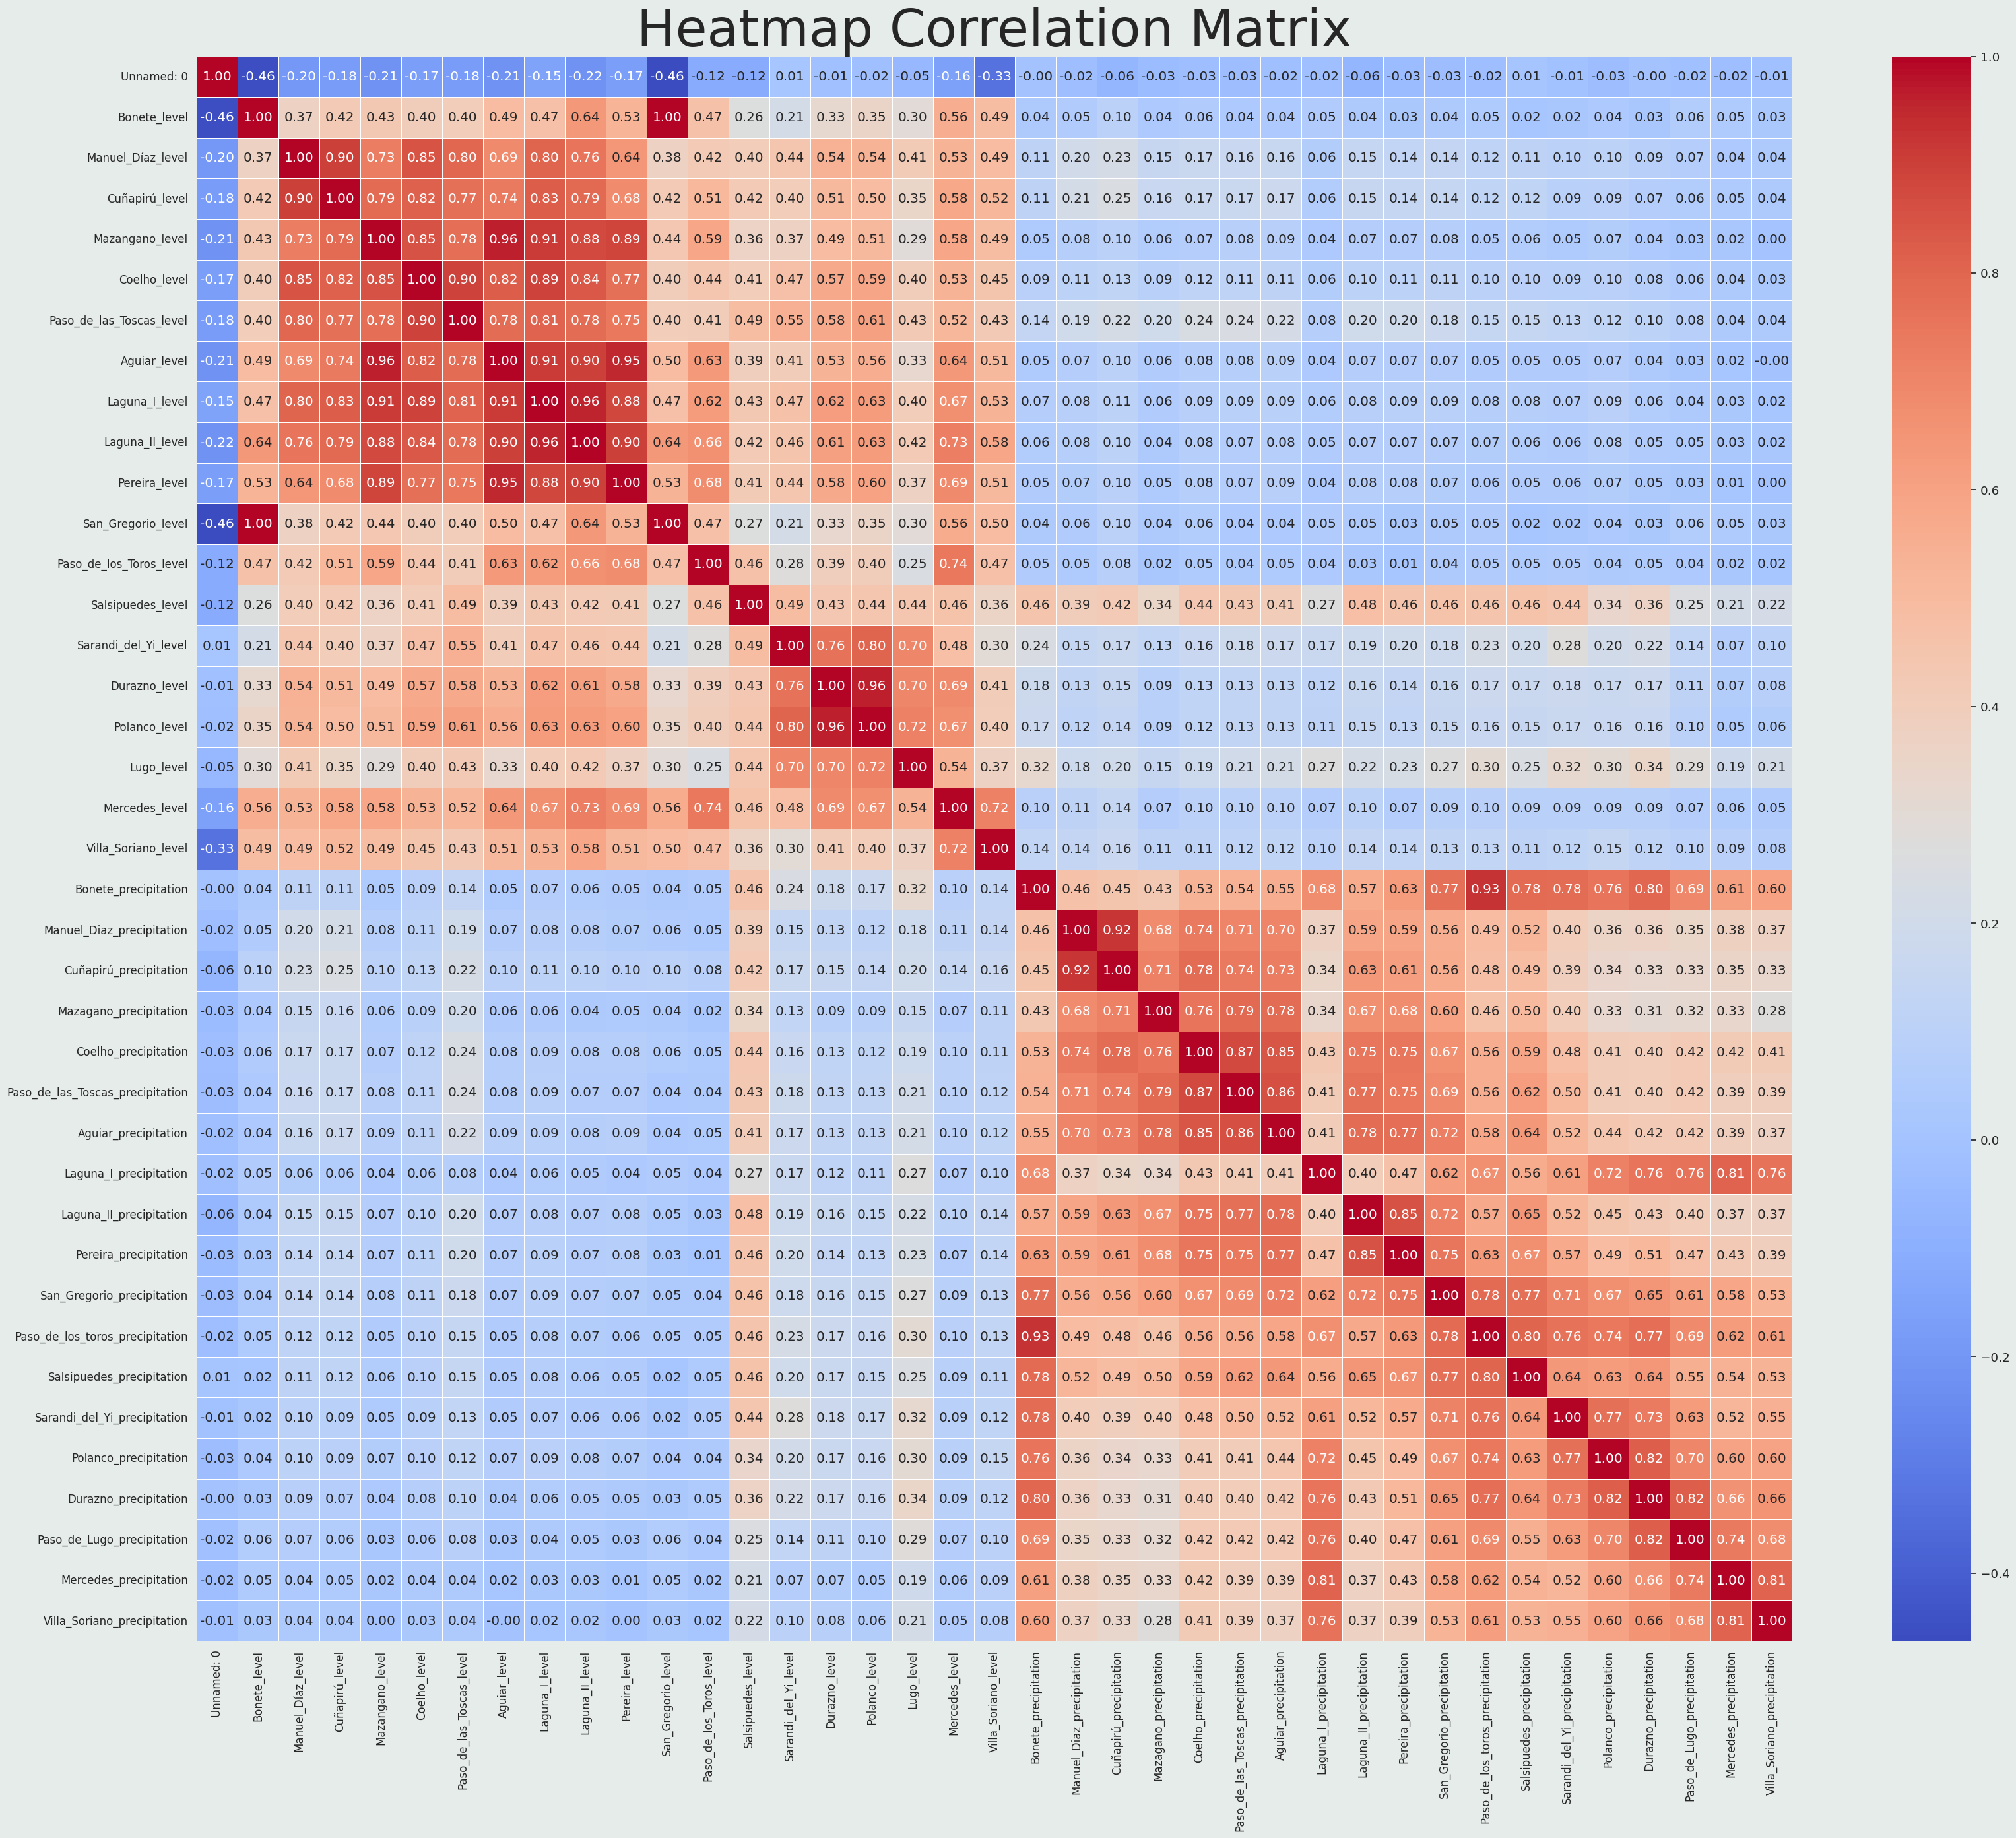

In [ ]:
plot_correlation_matrix(data_a, Negro_uruguai_columns_name, Negro_uruguai_metrics_path + "corr_matrix.png")

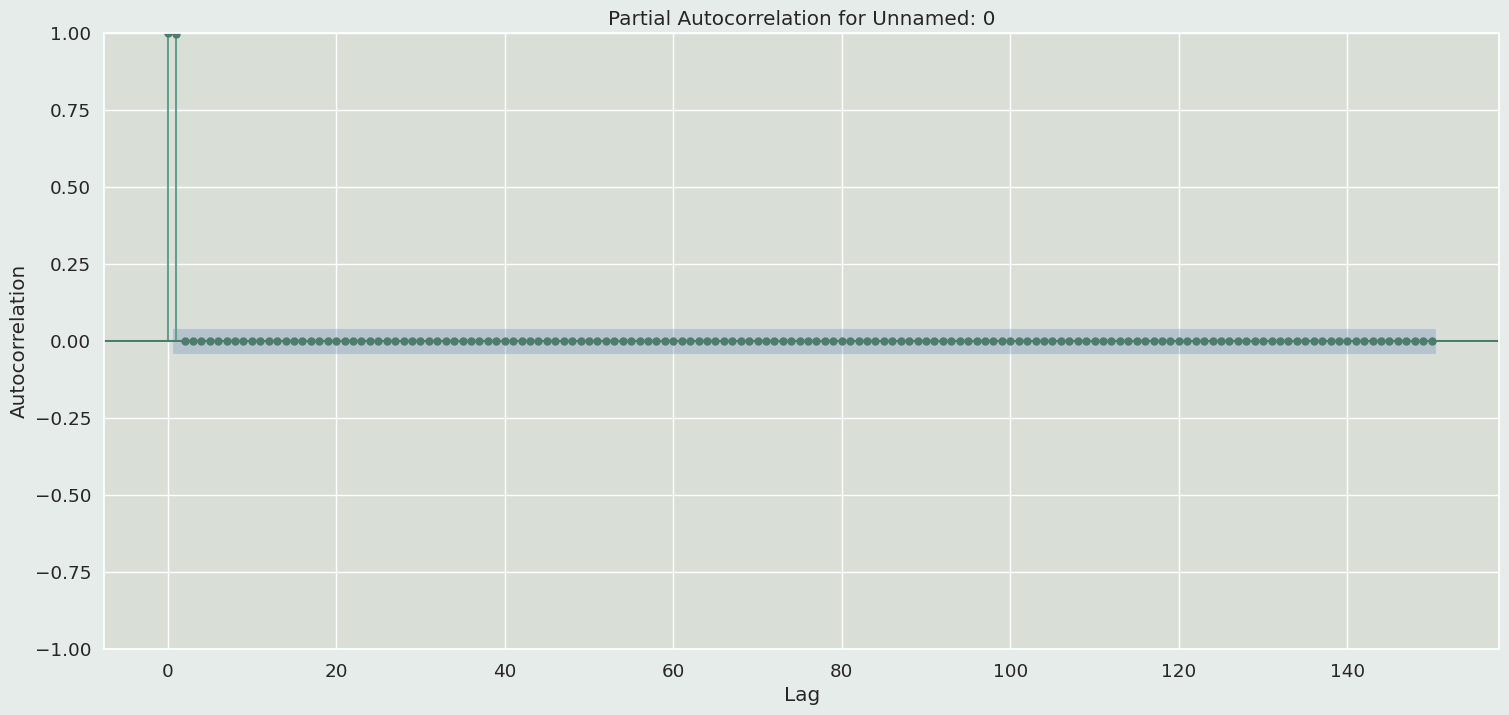

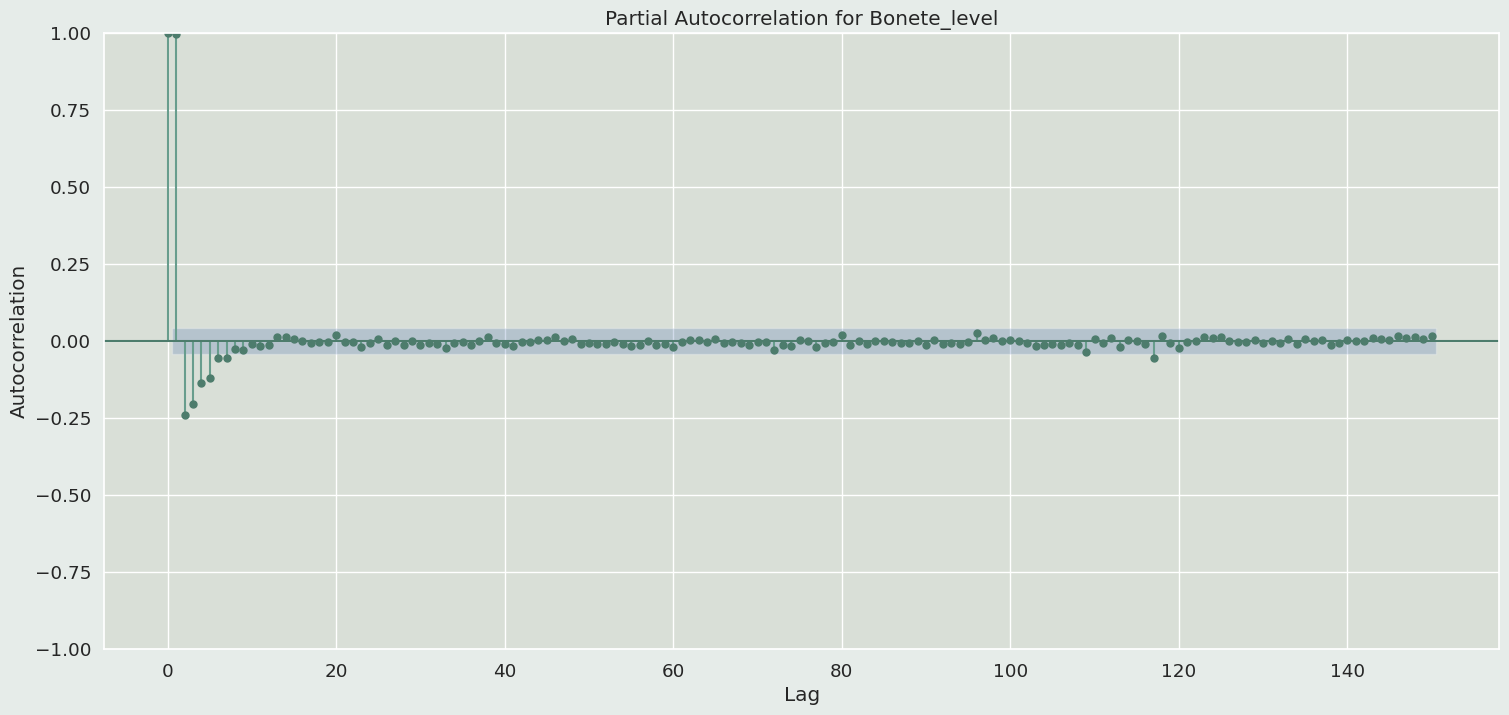

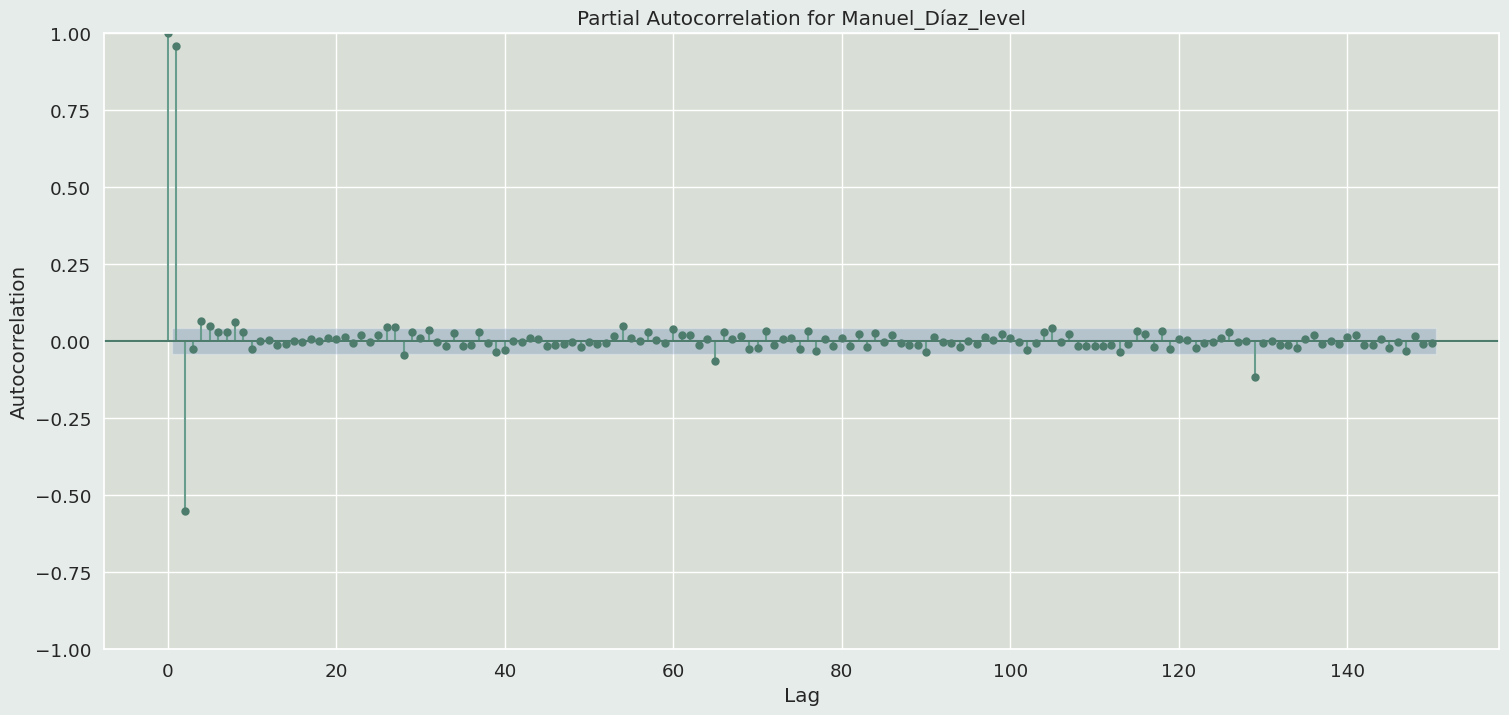

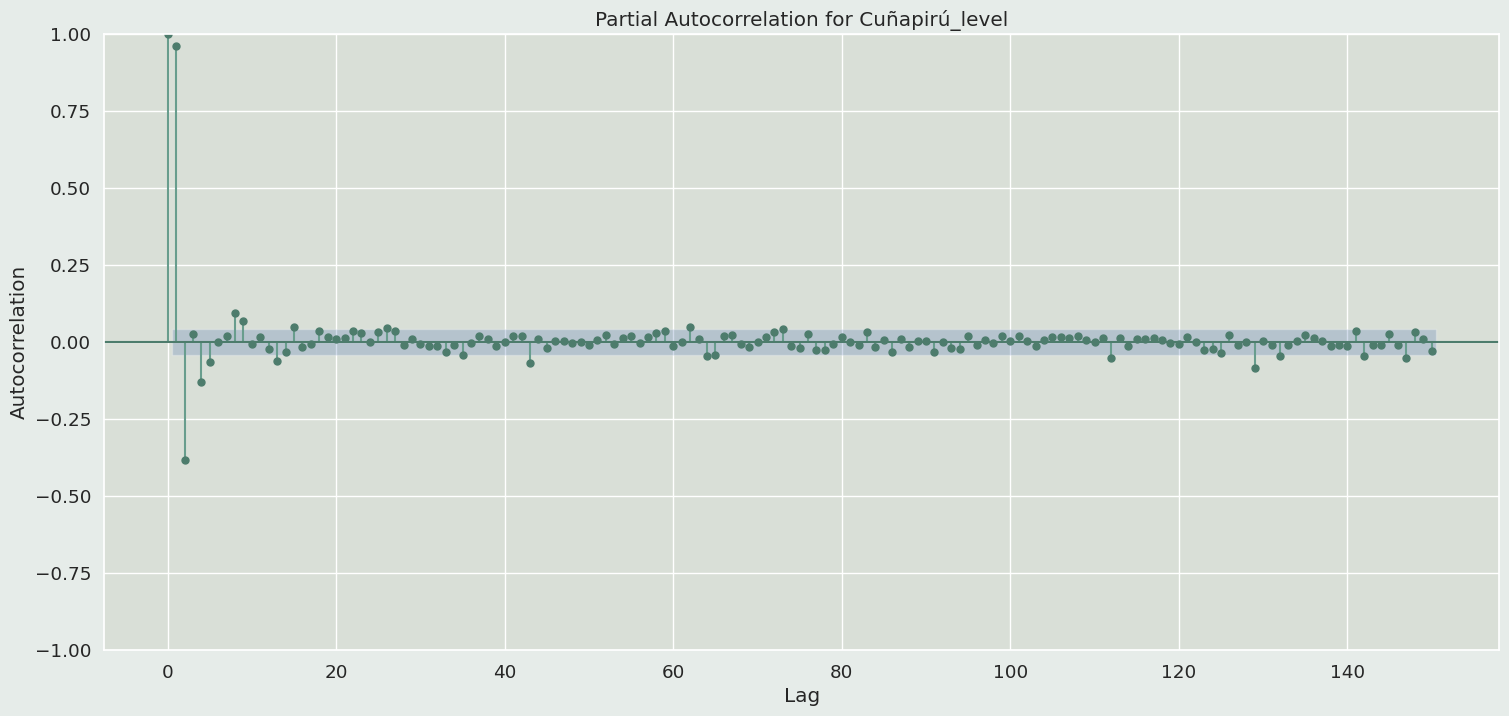

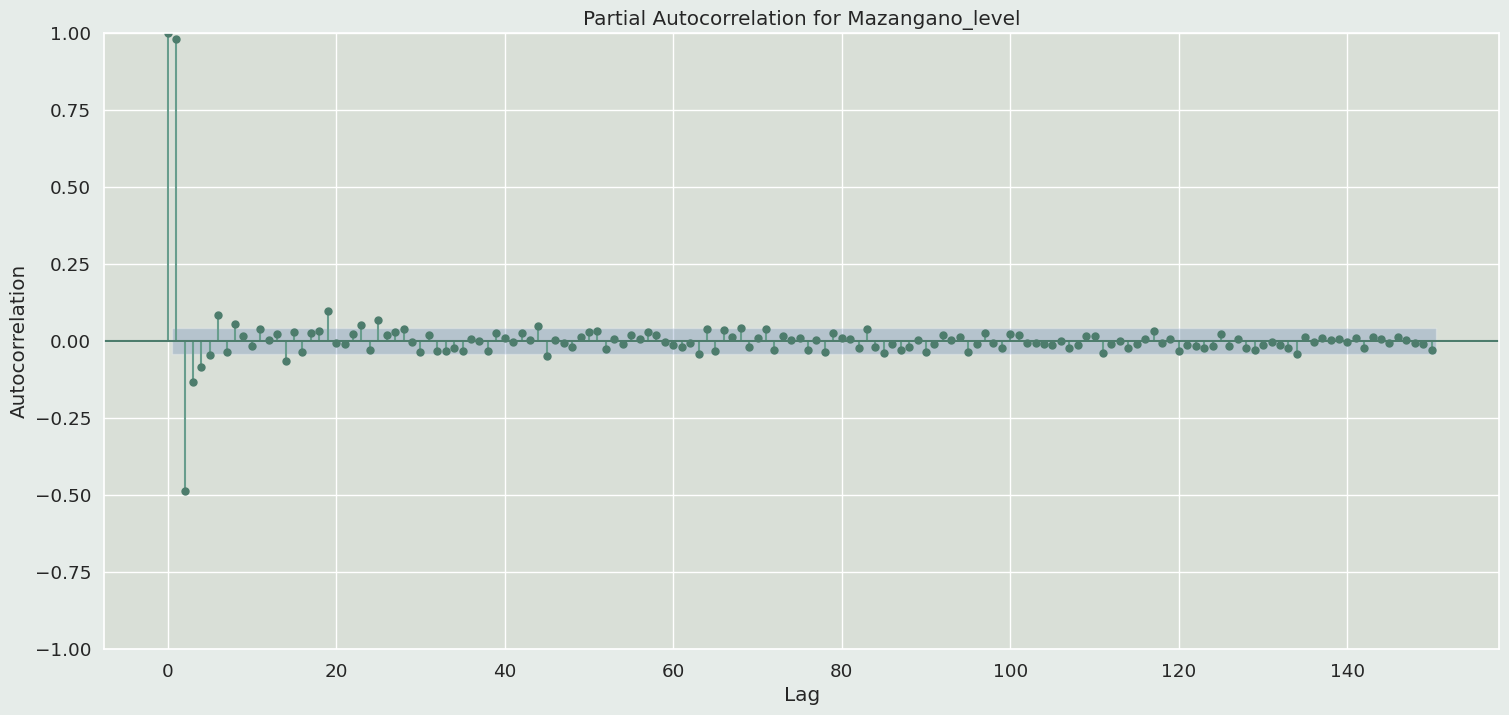

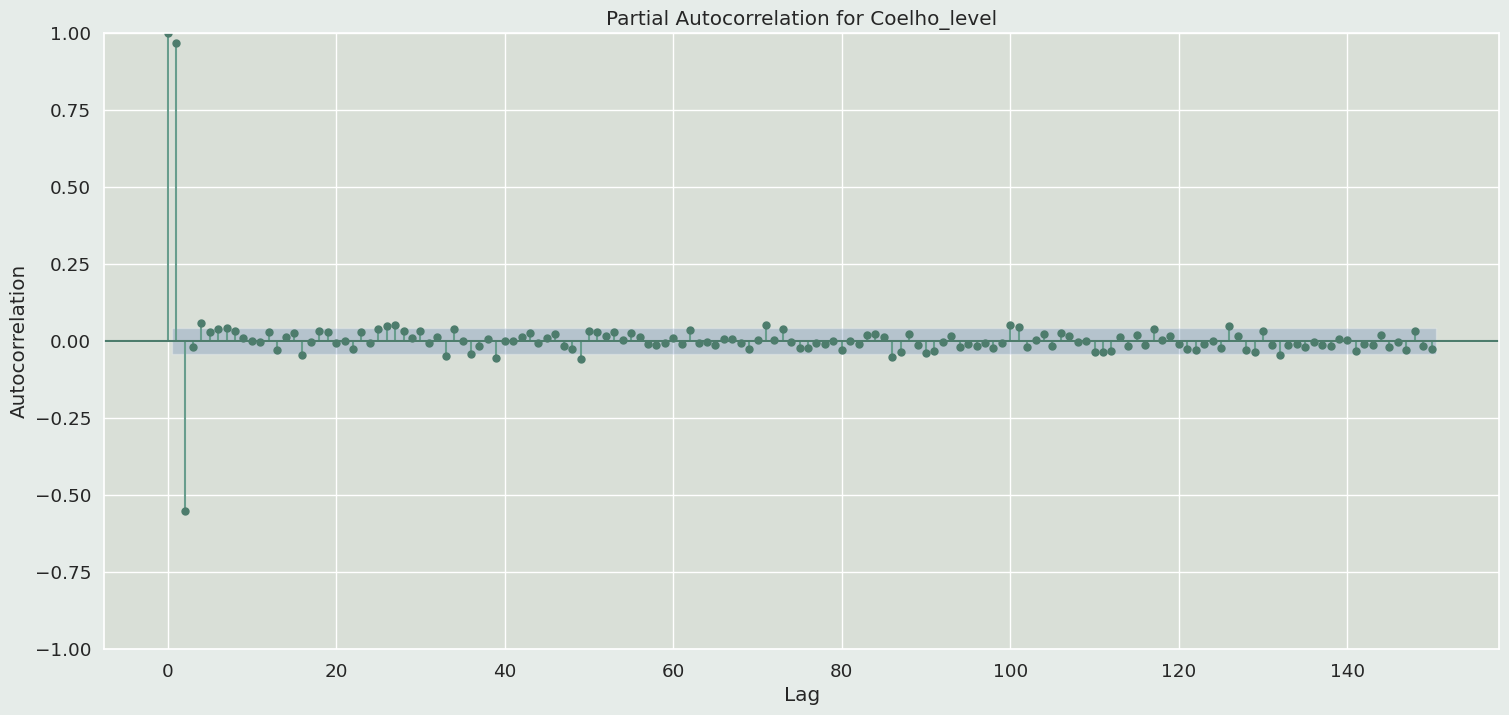

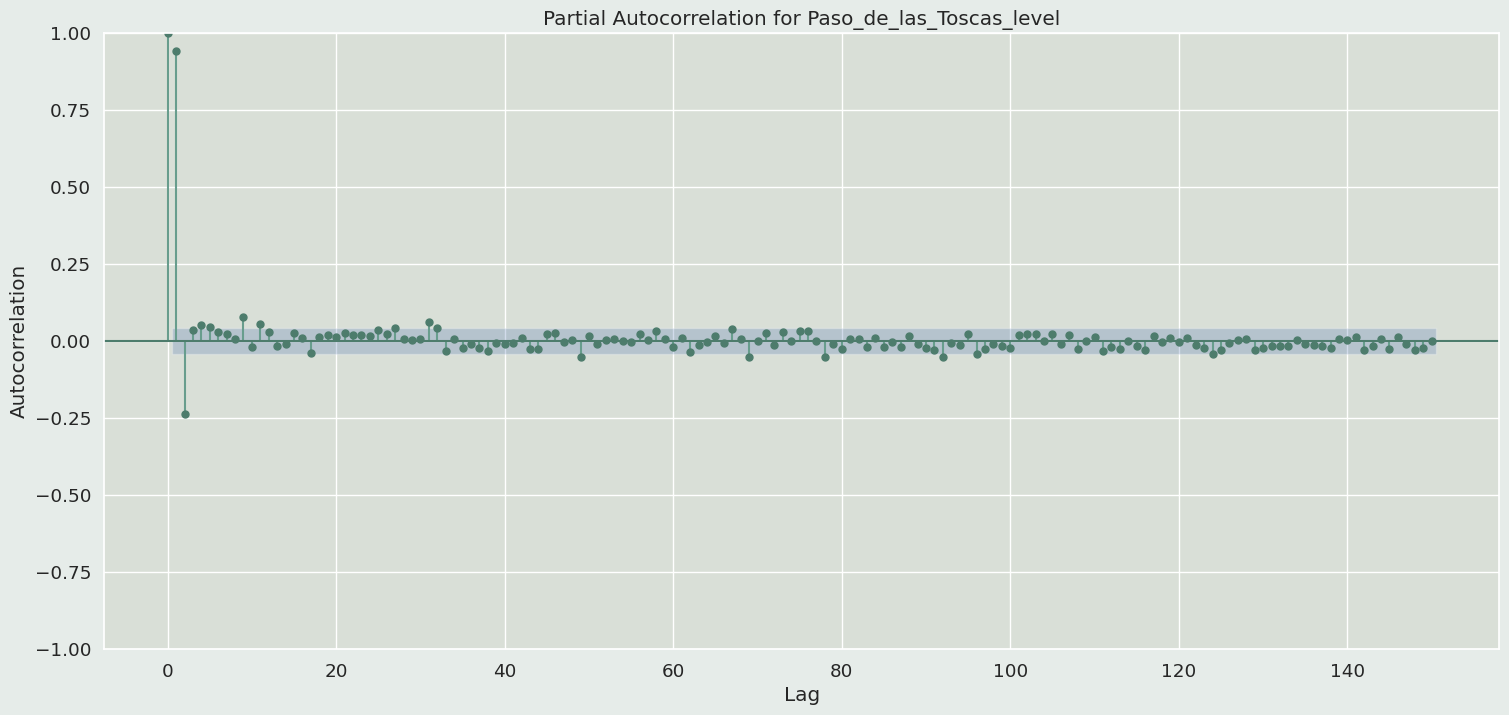

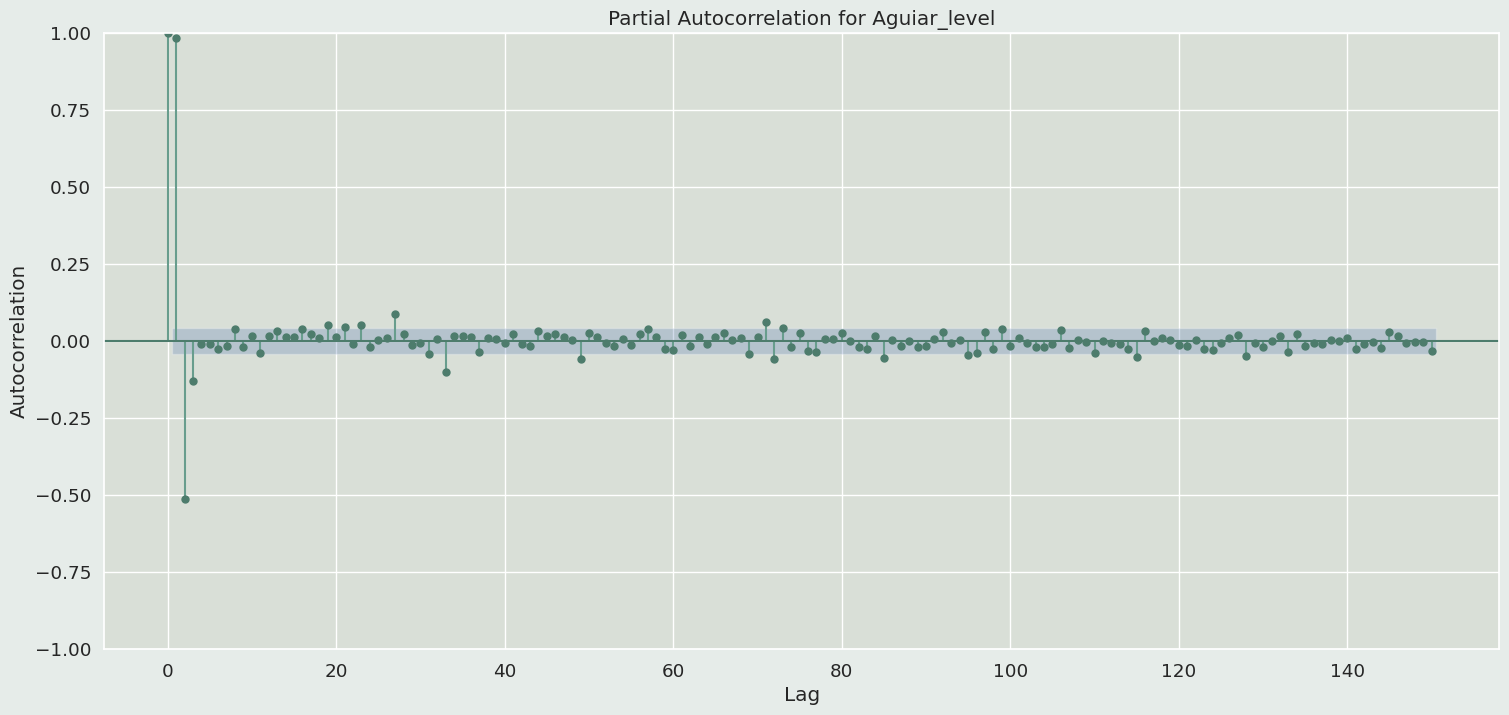

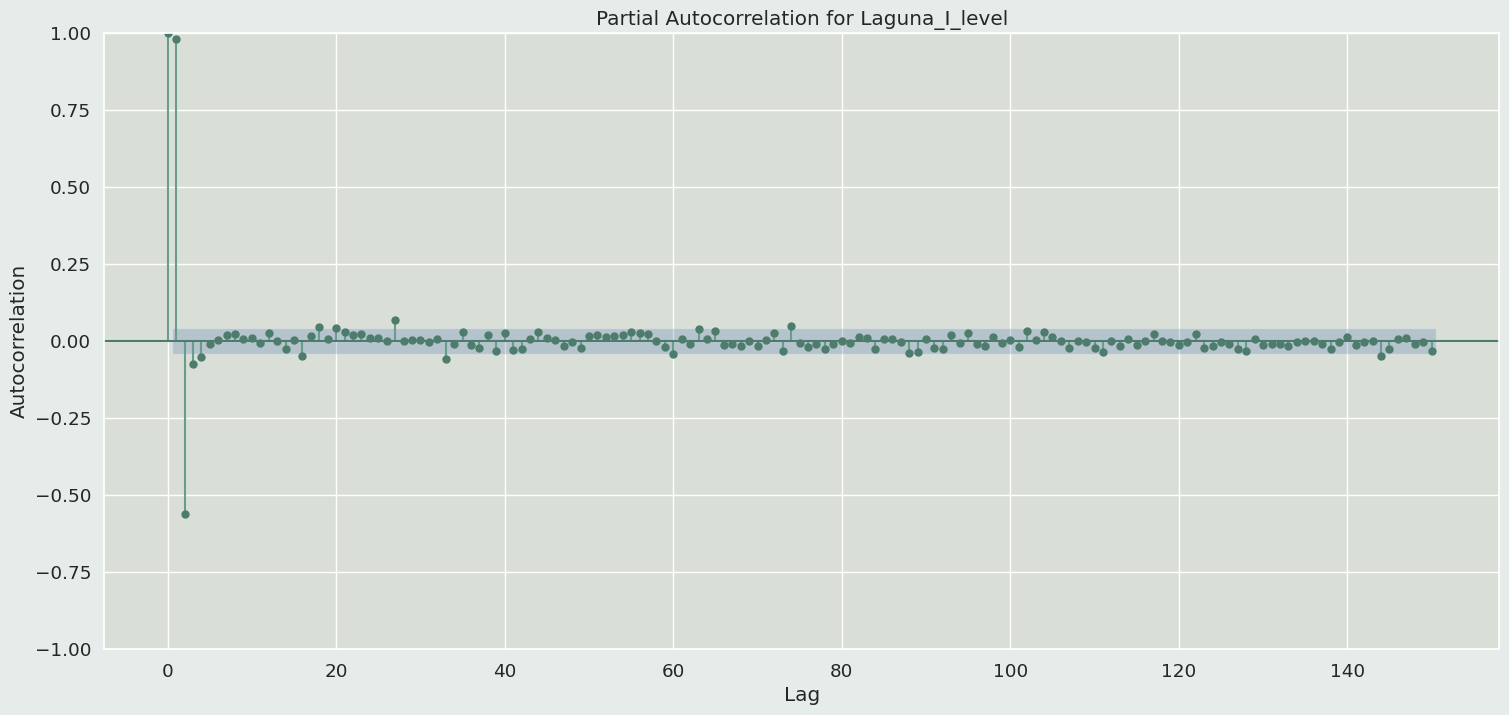

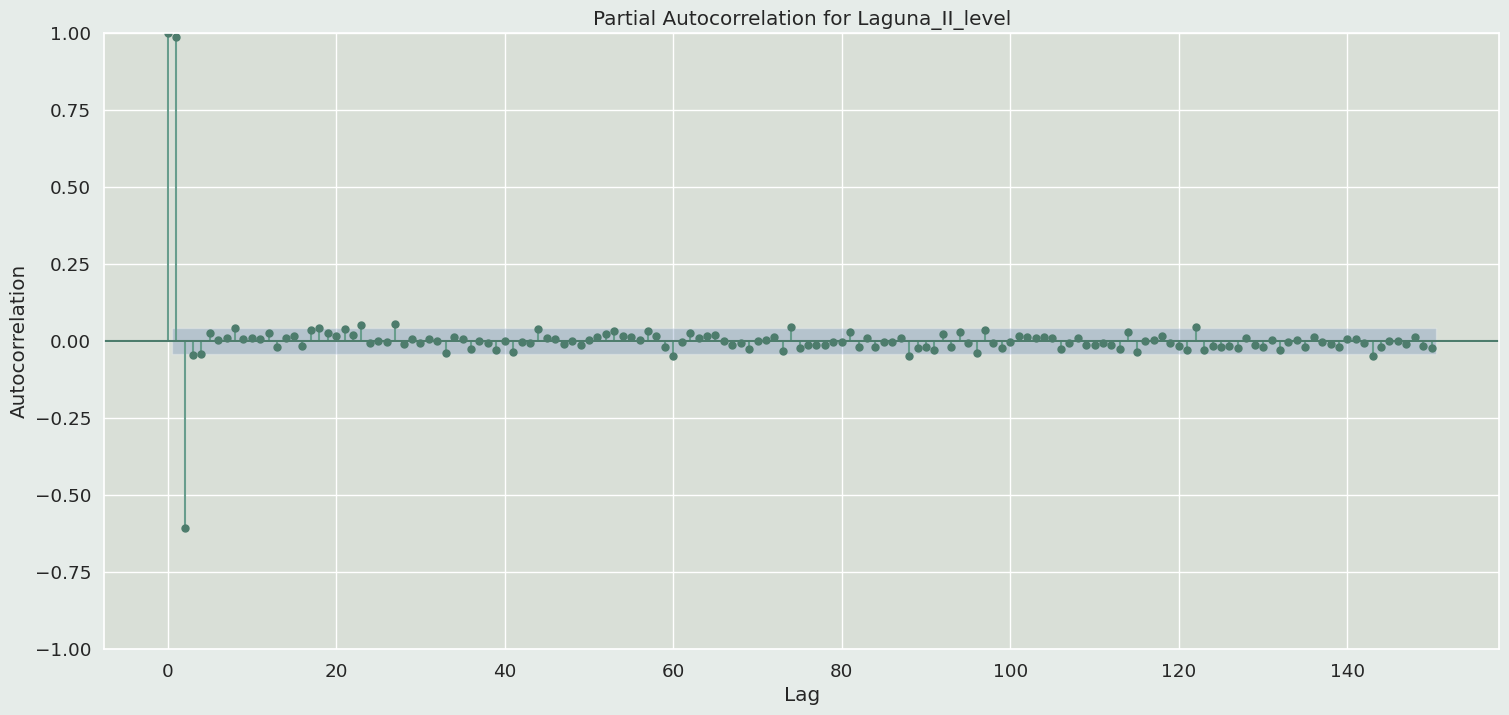

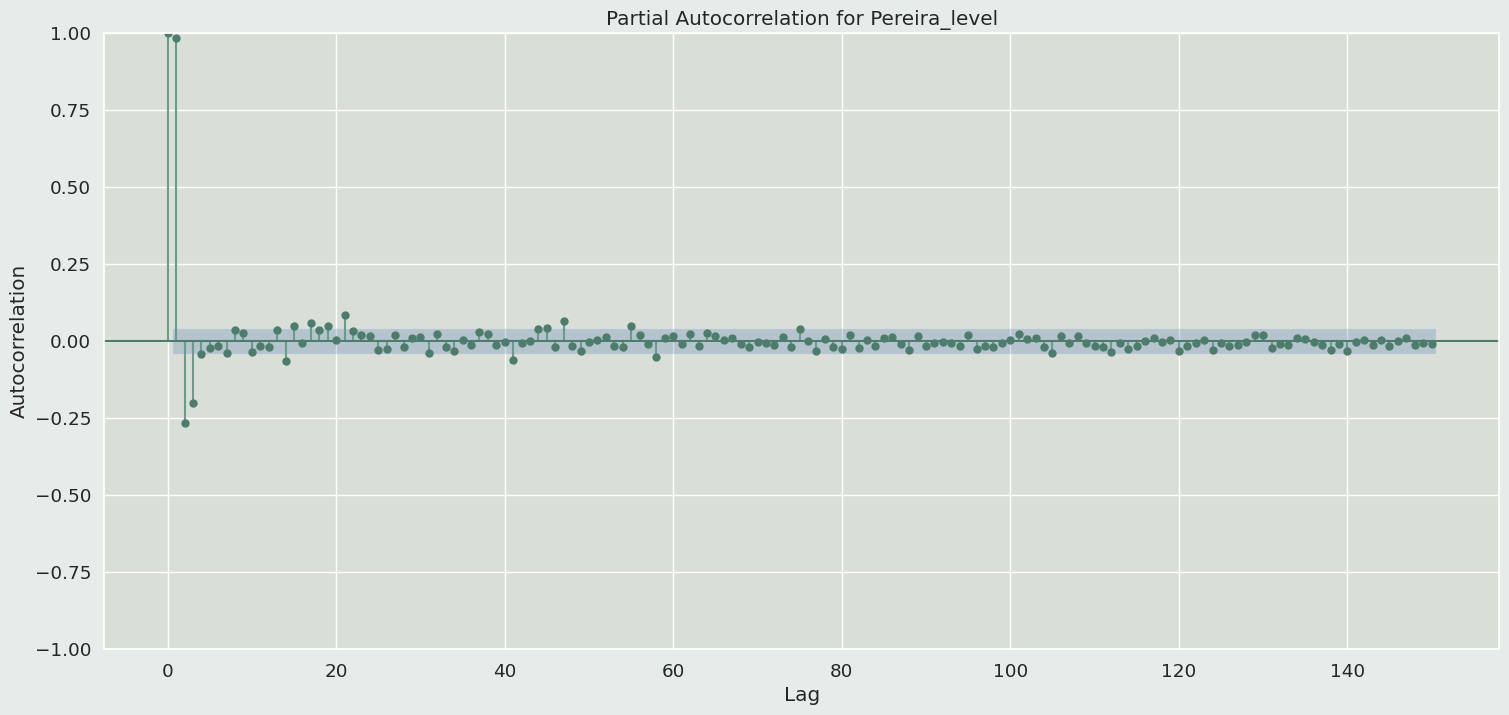

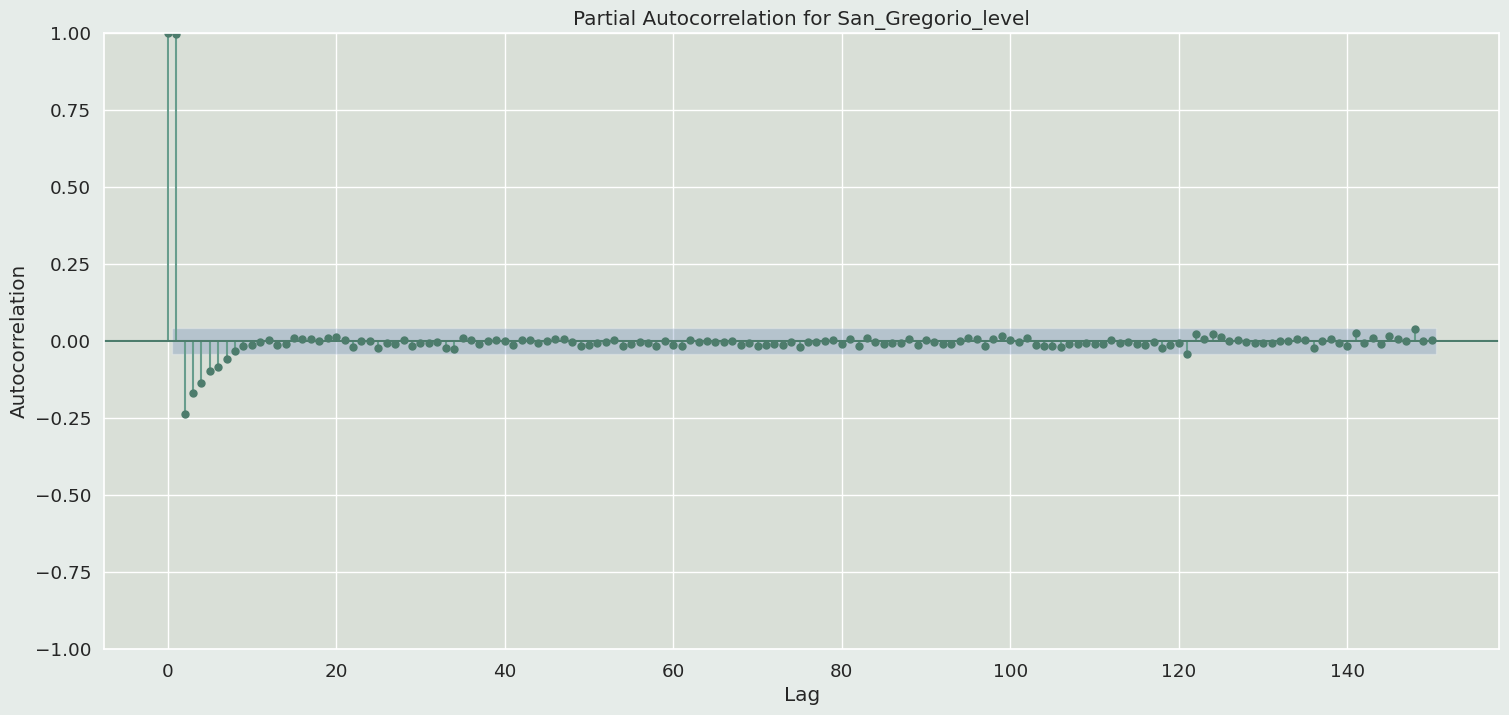

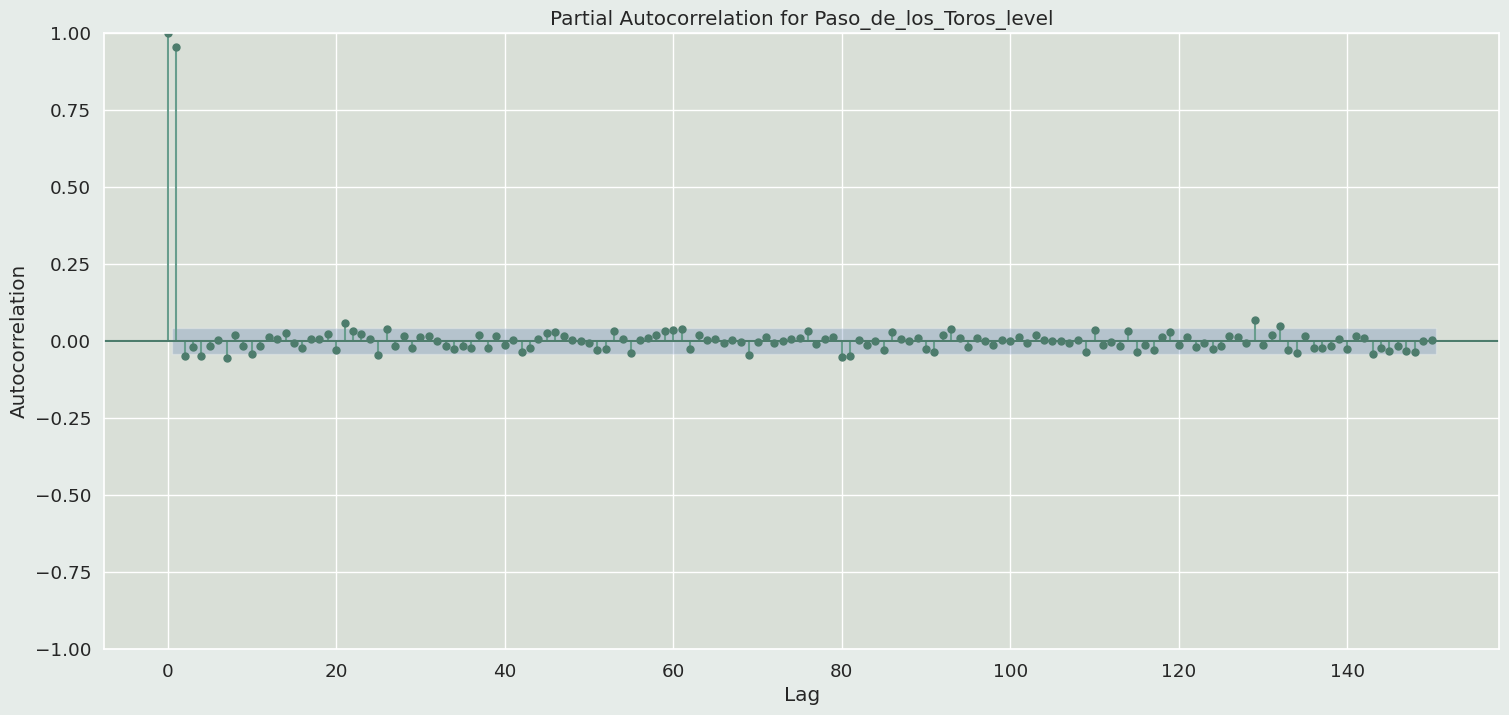

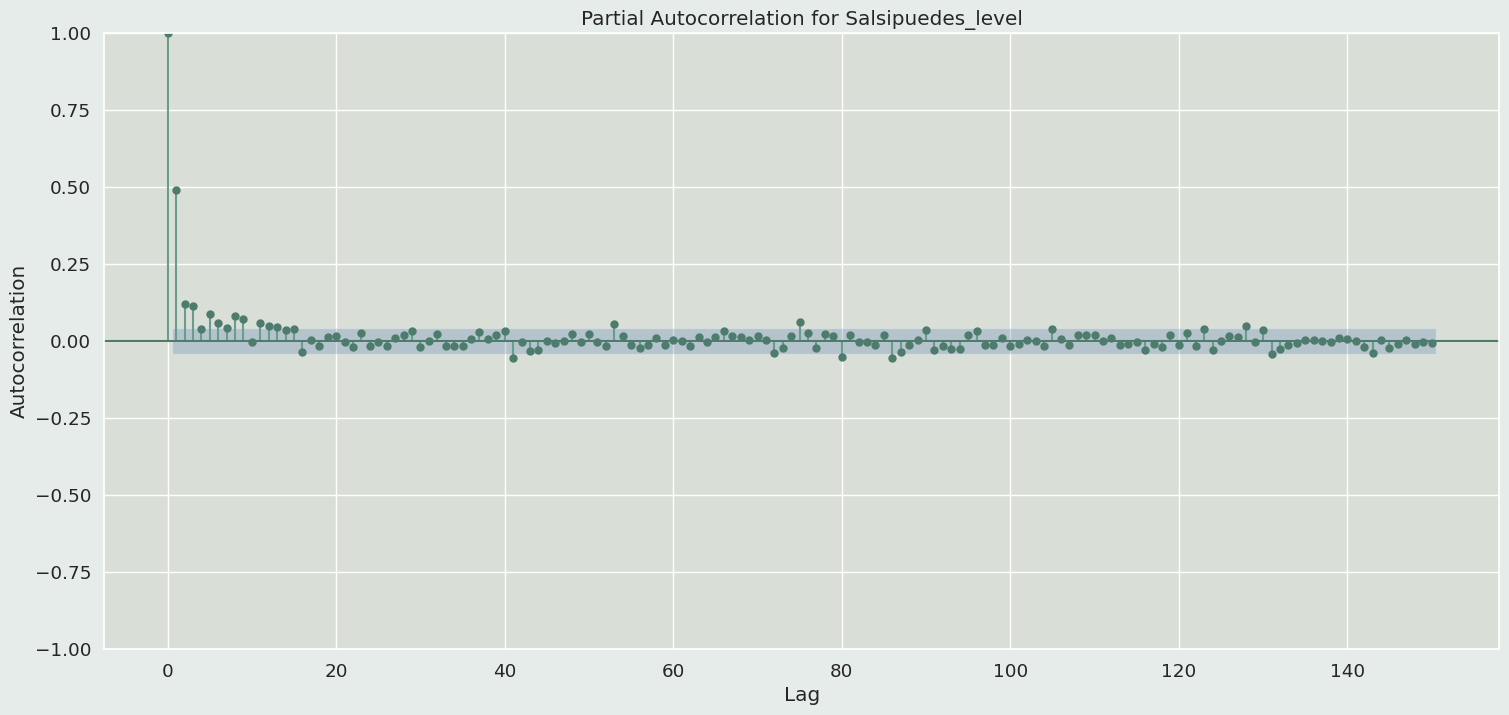

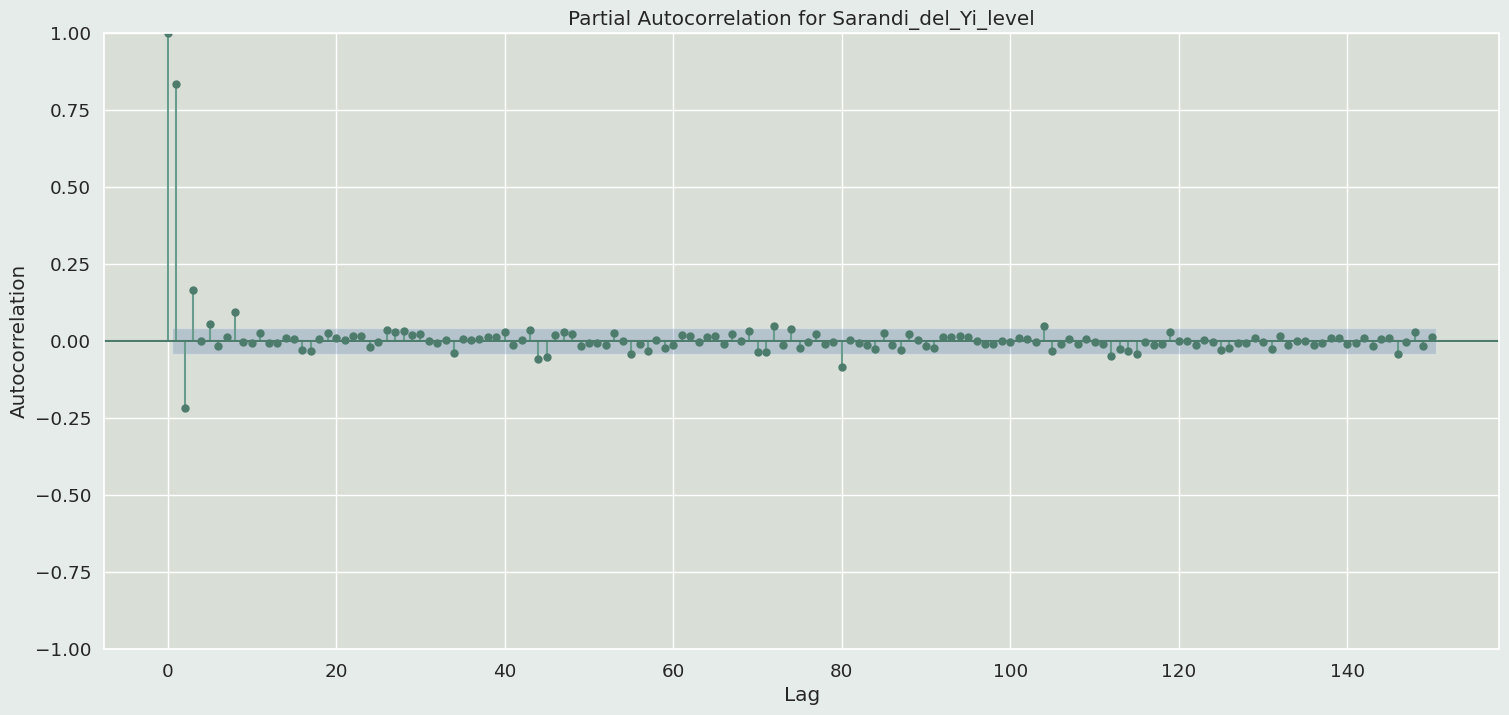

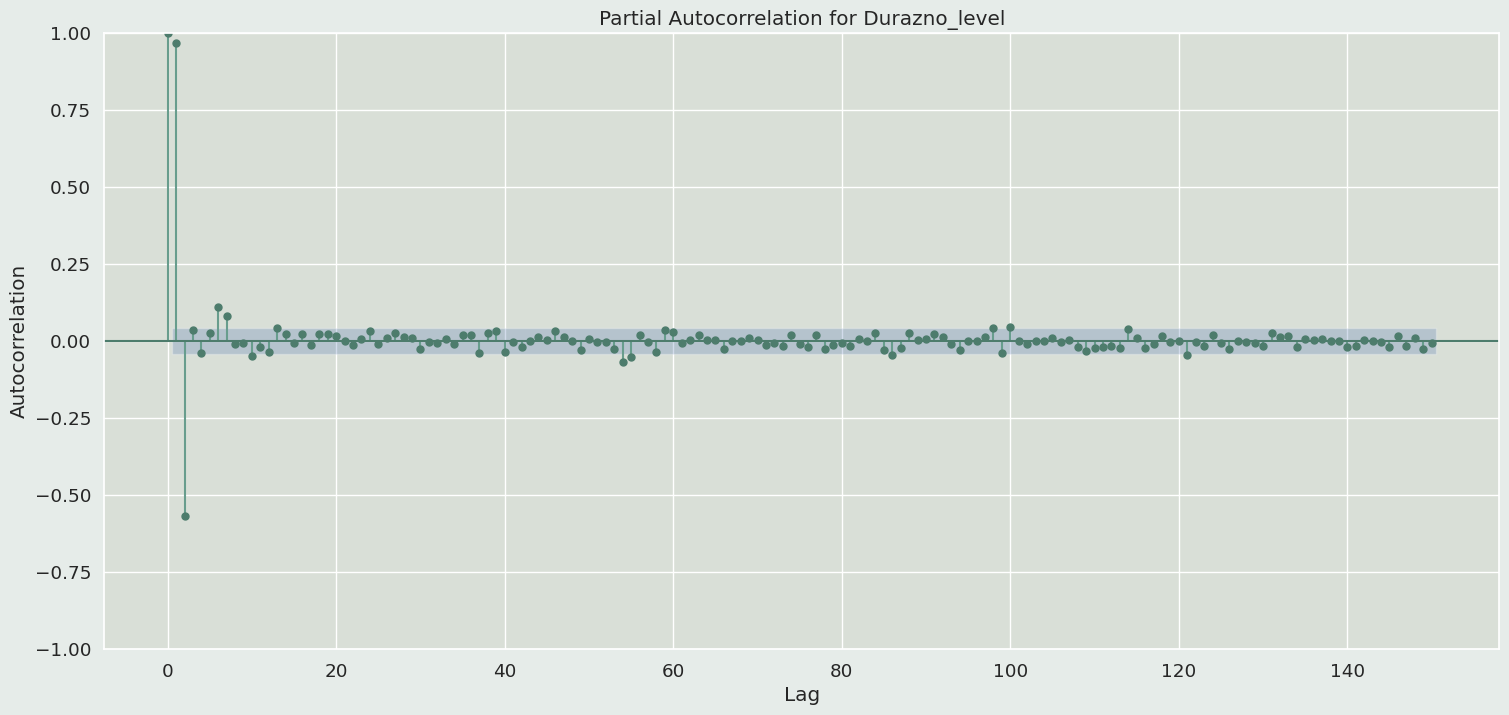

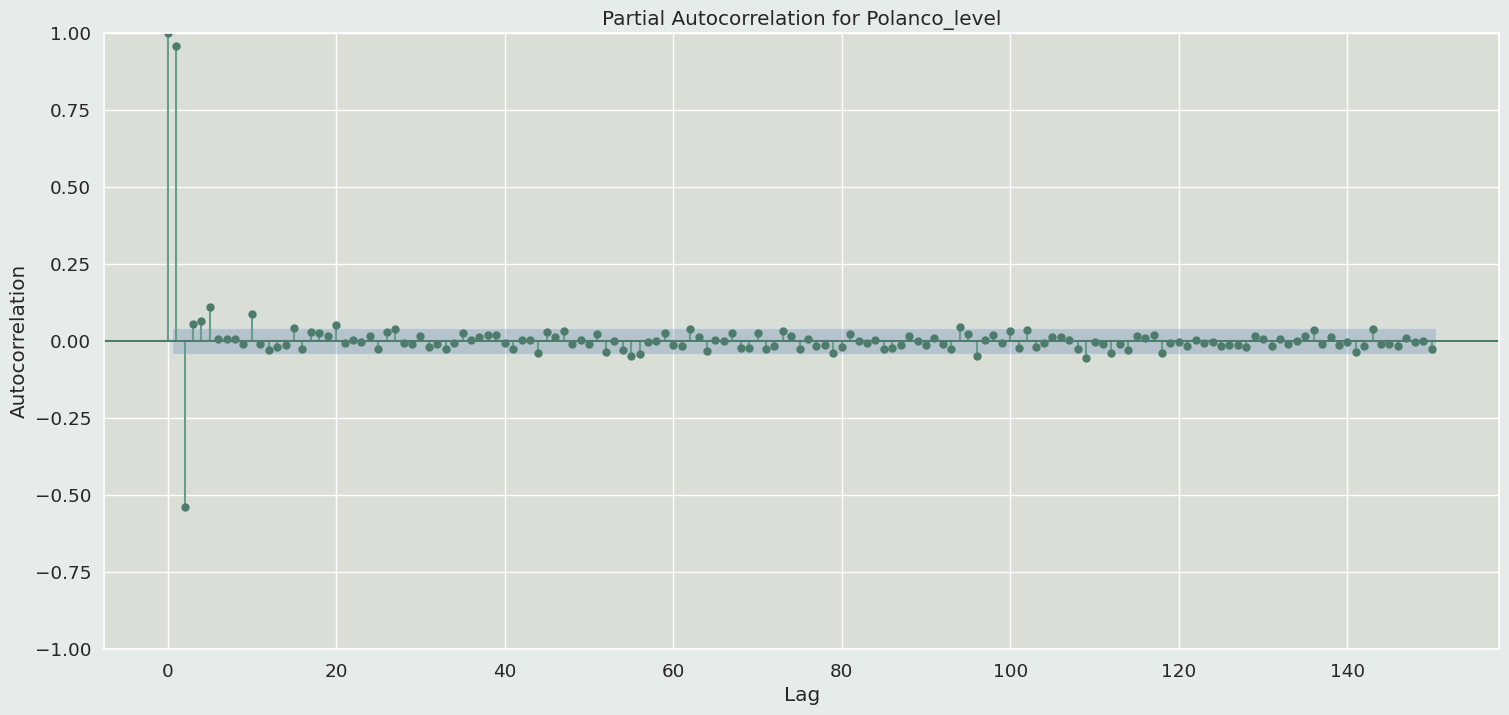

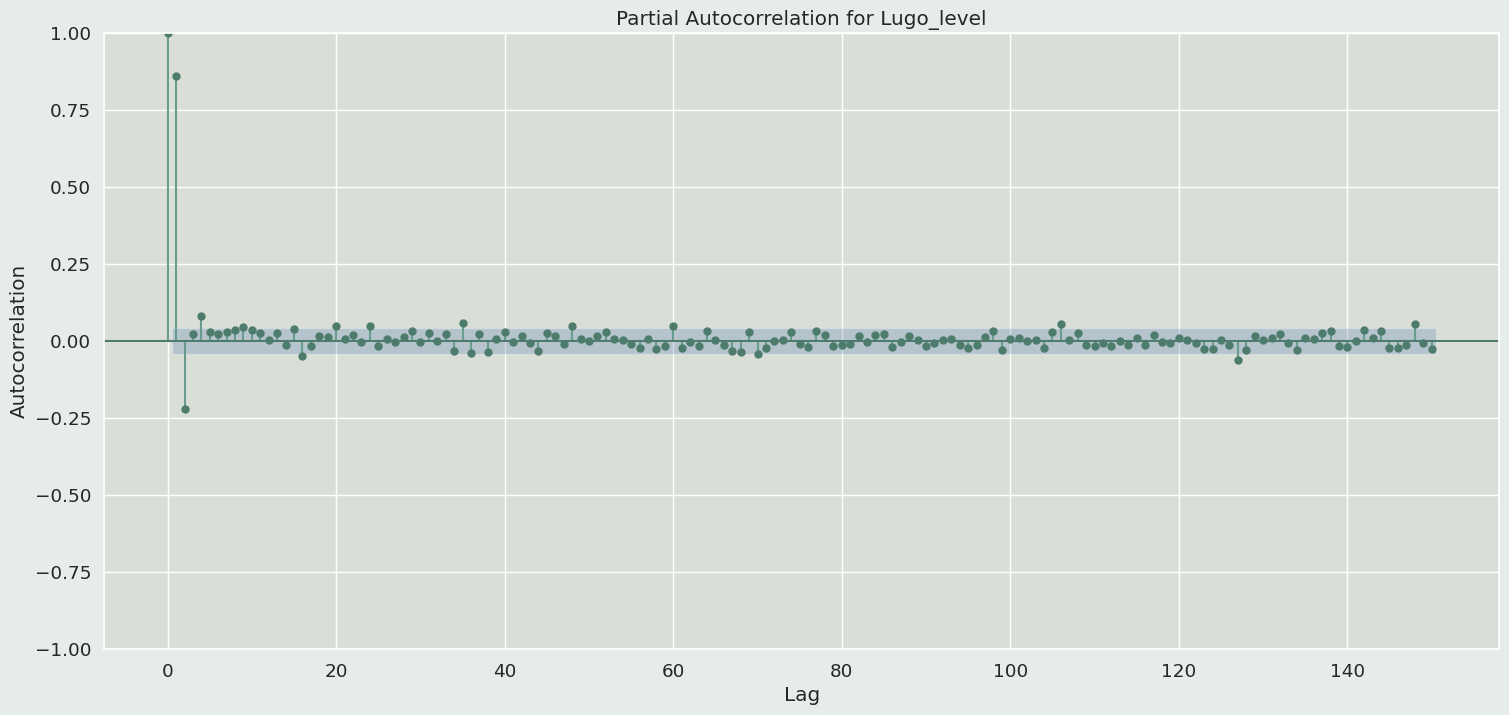

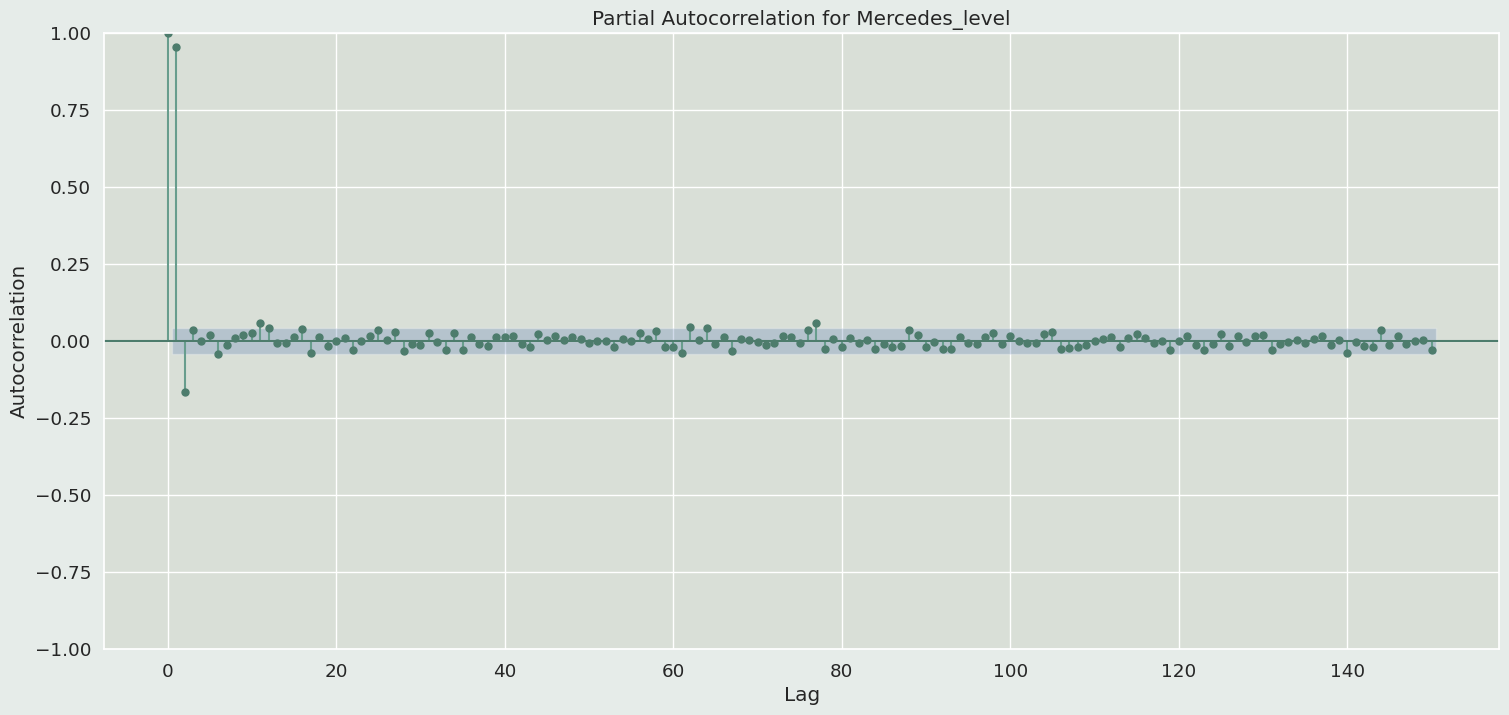

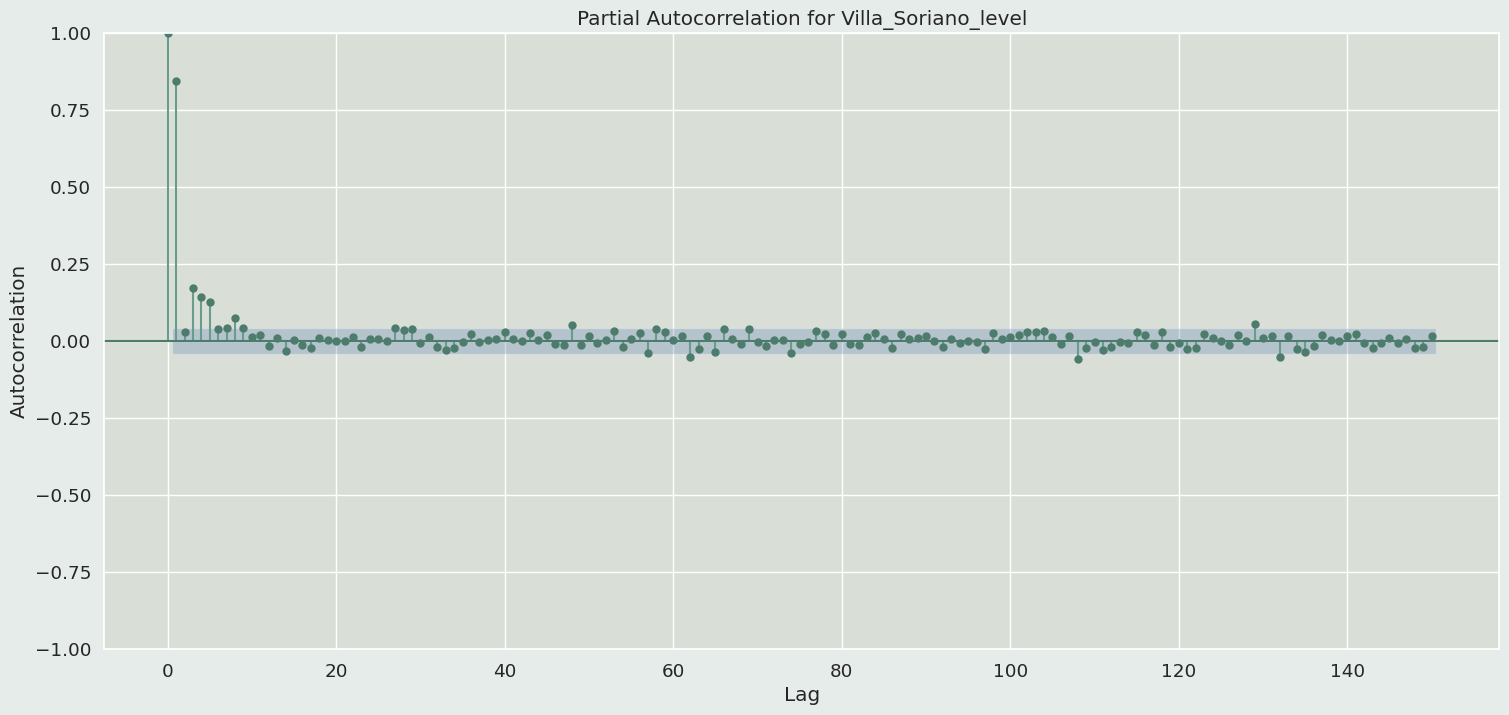

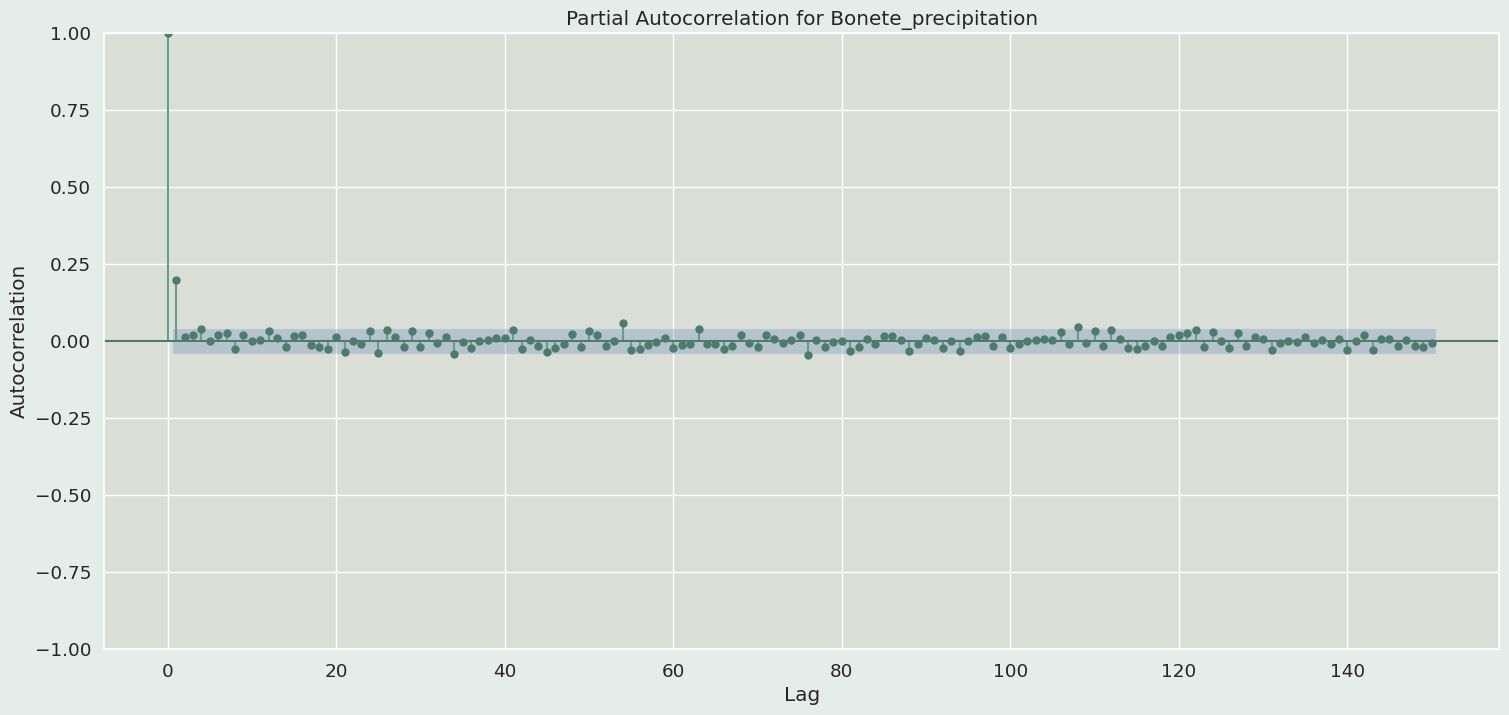

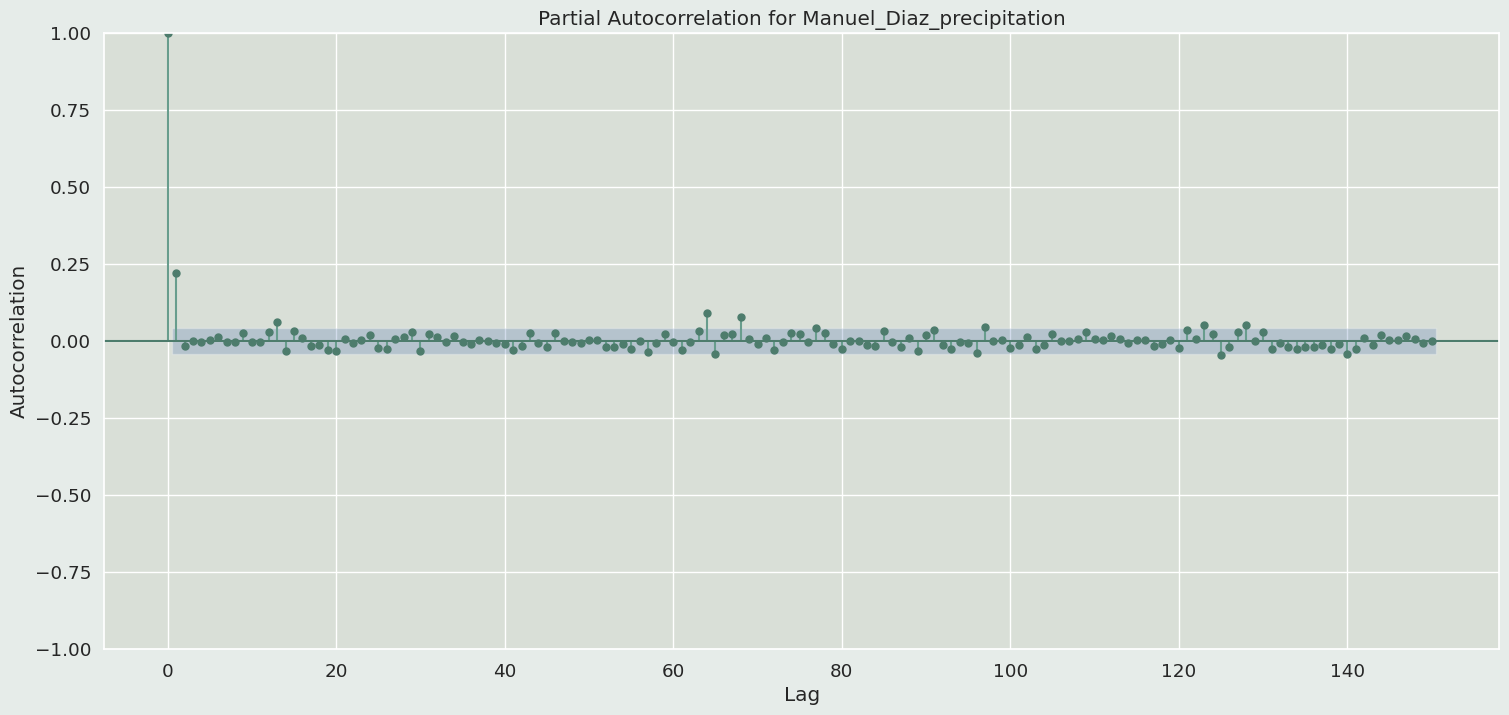

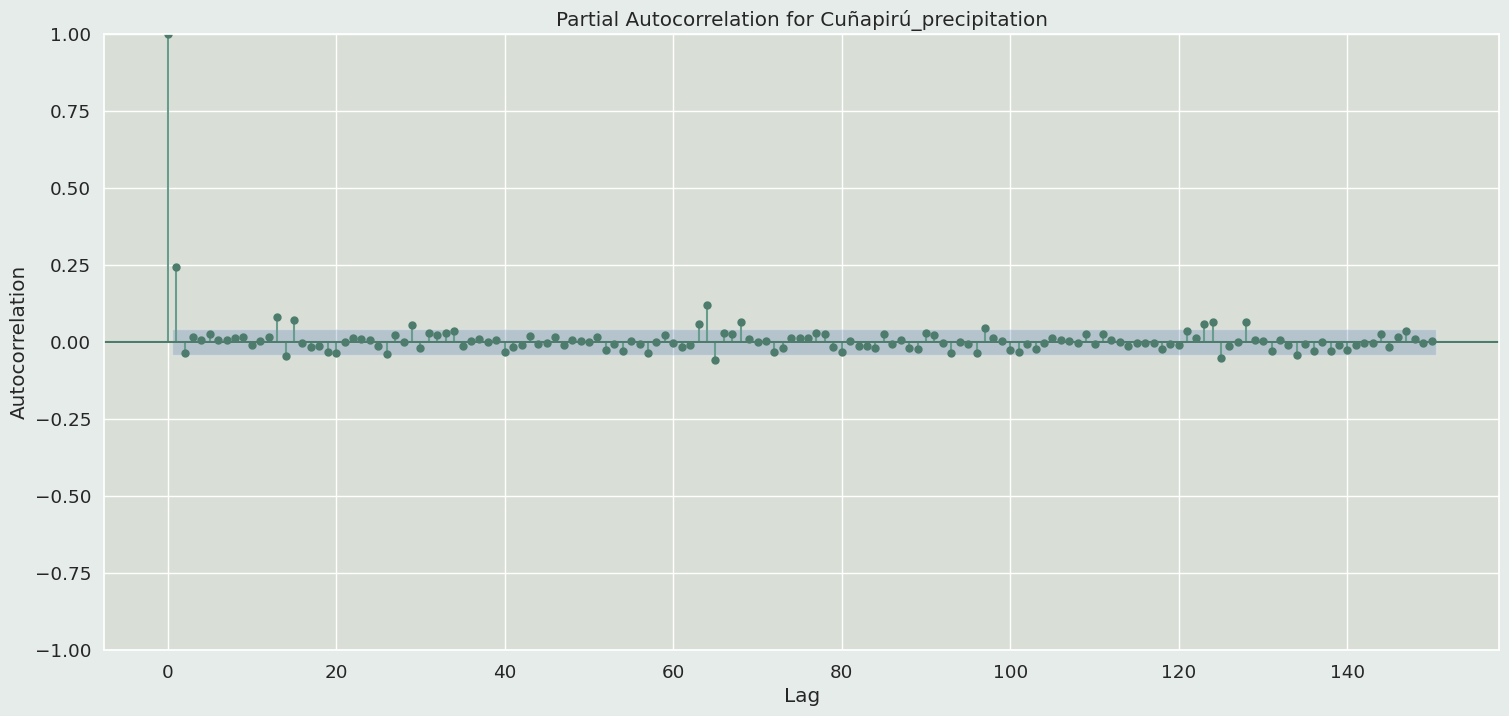

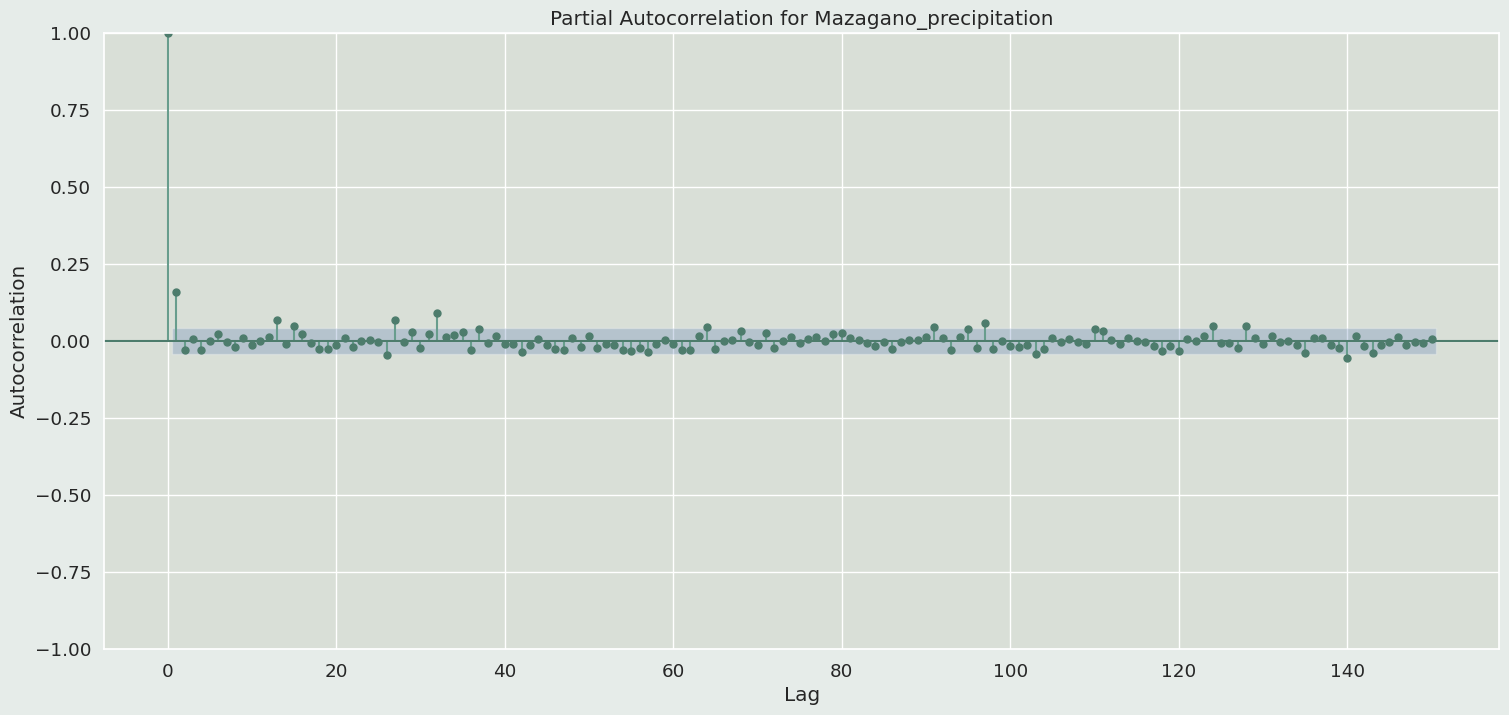

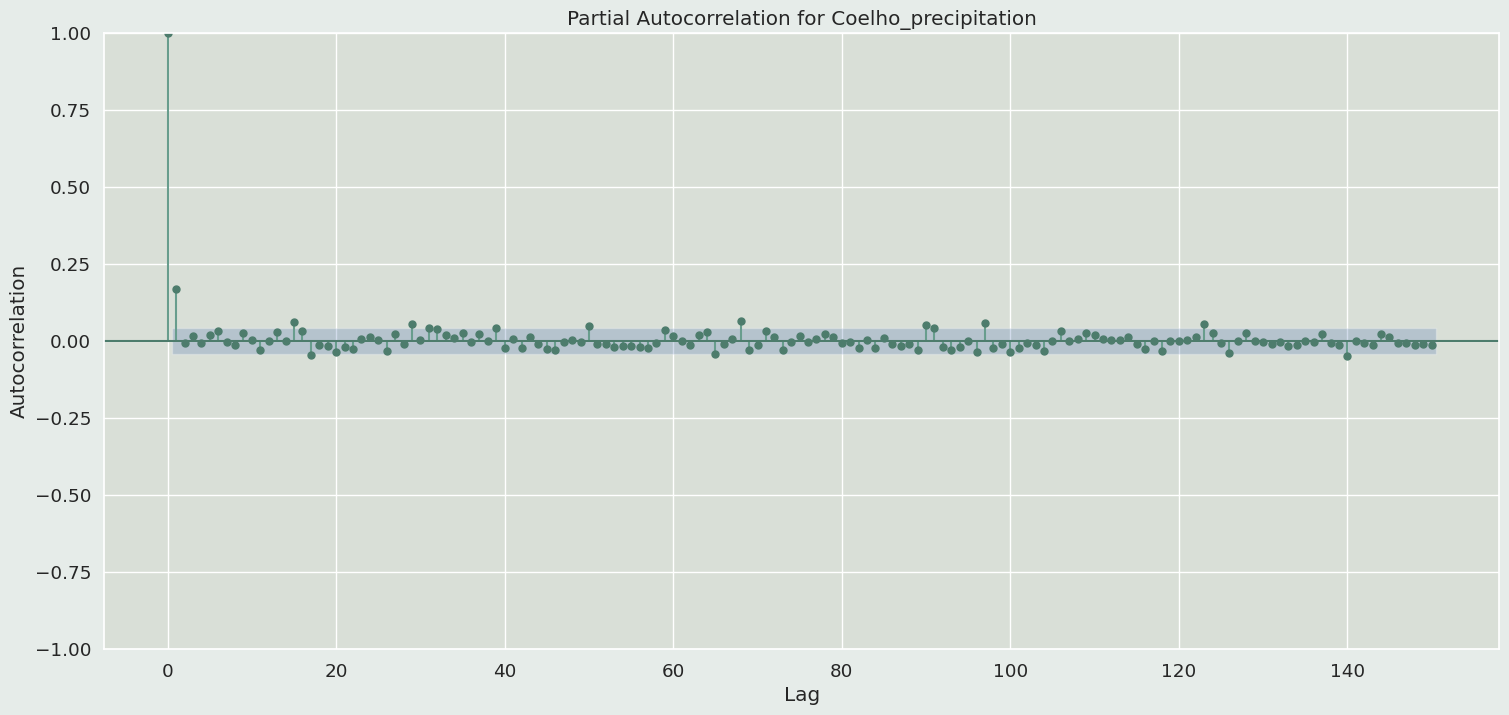

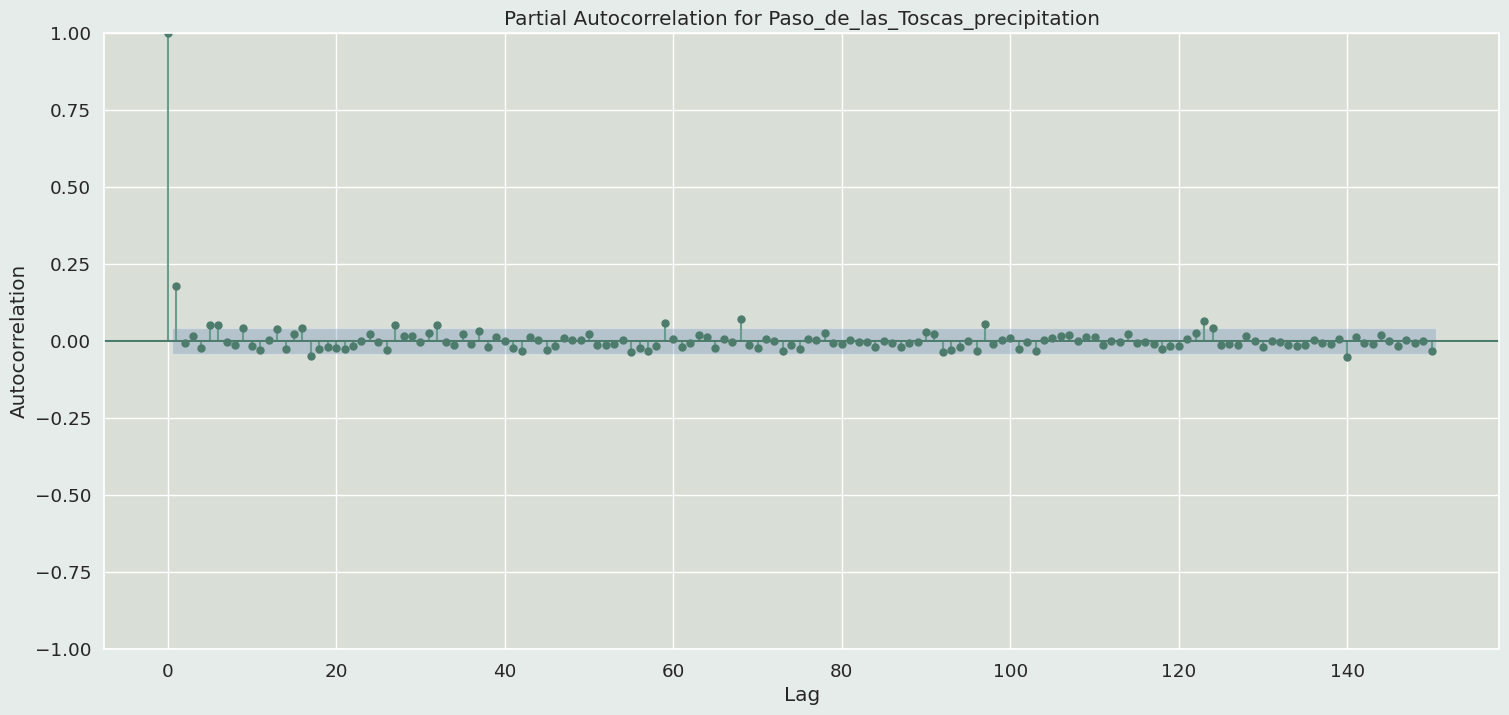

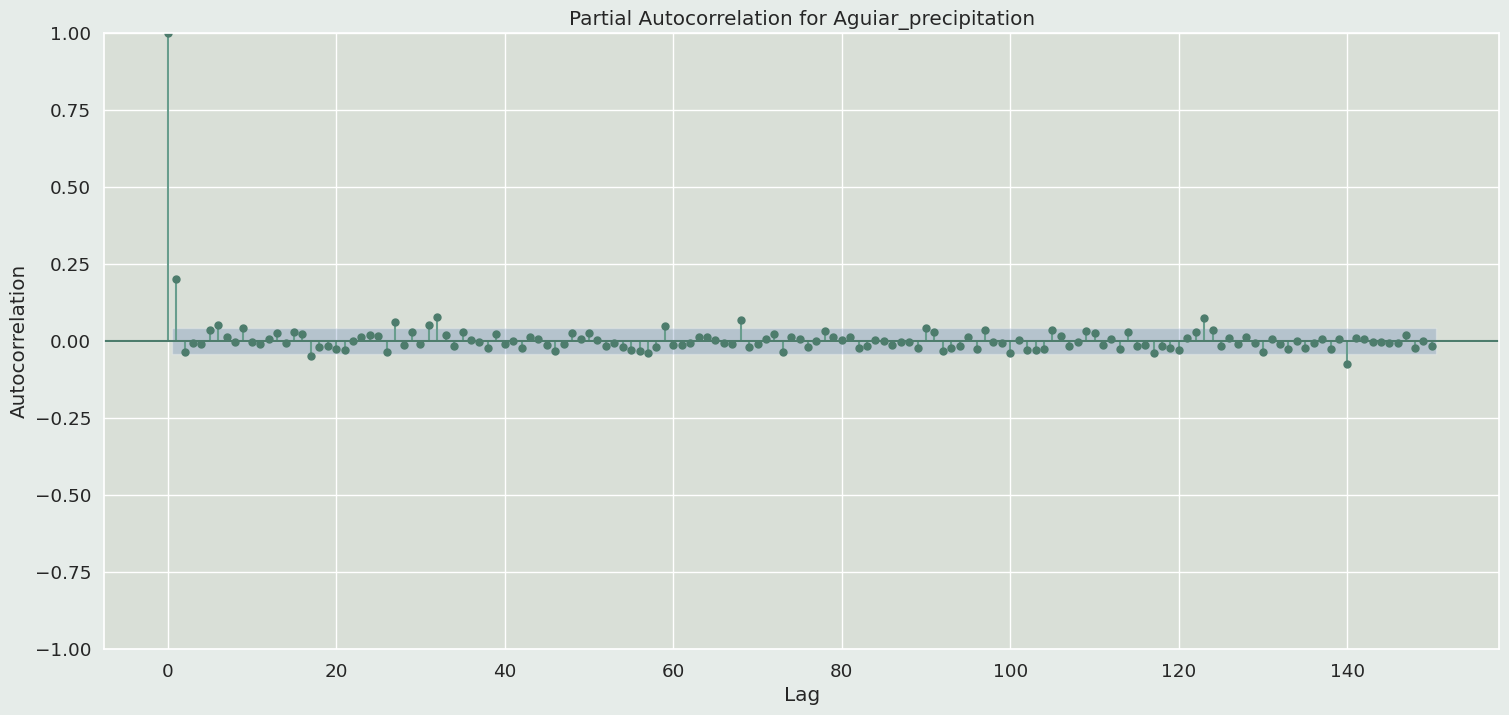

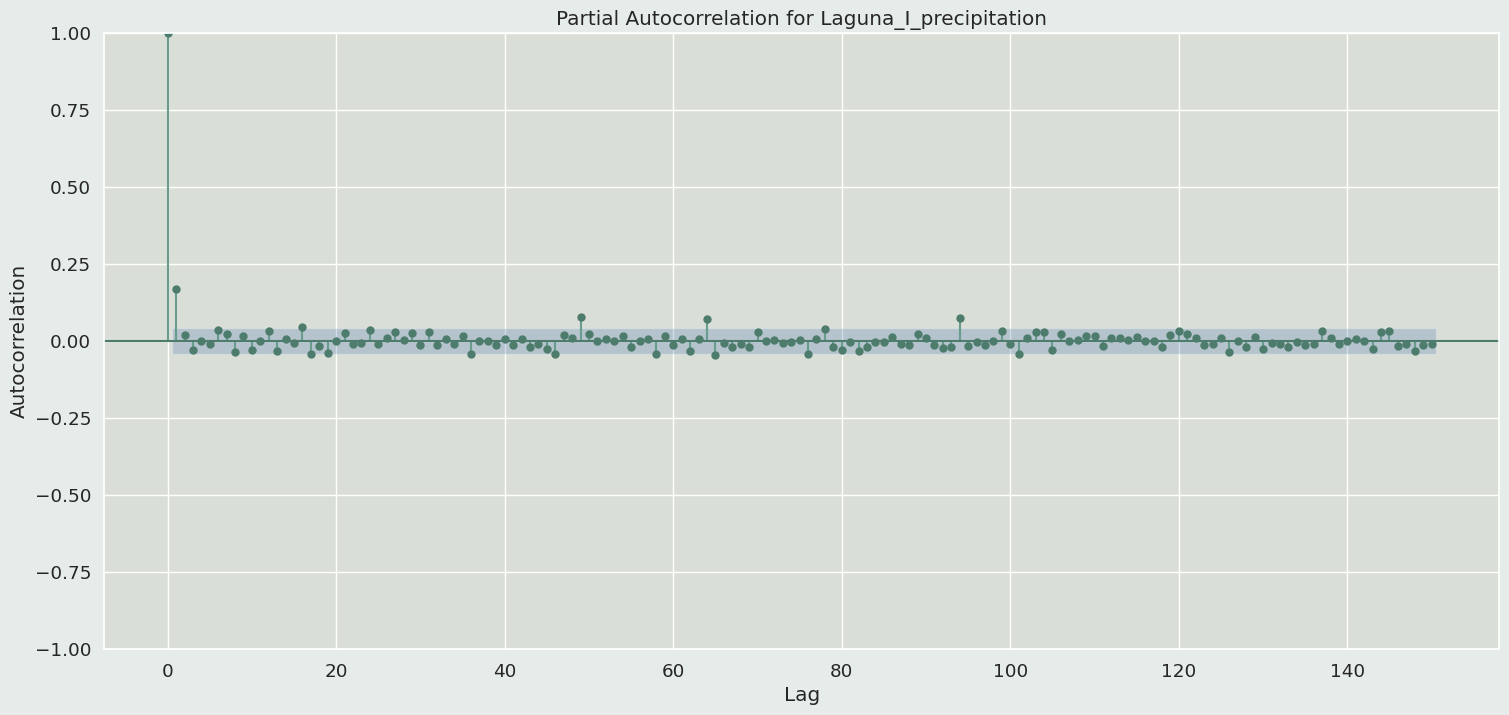

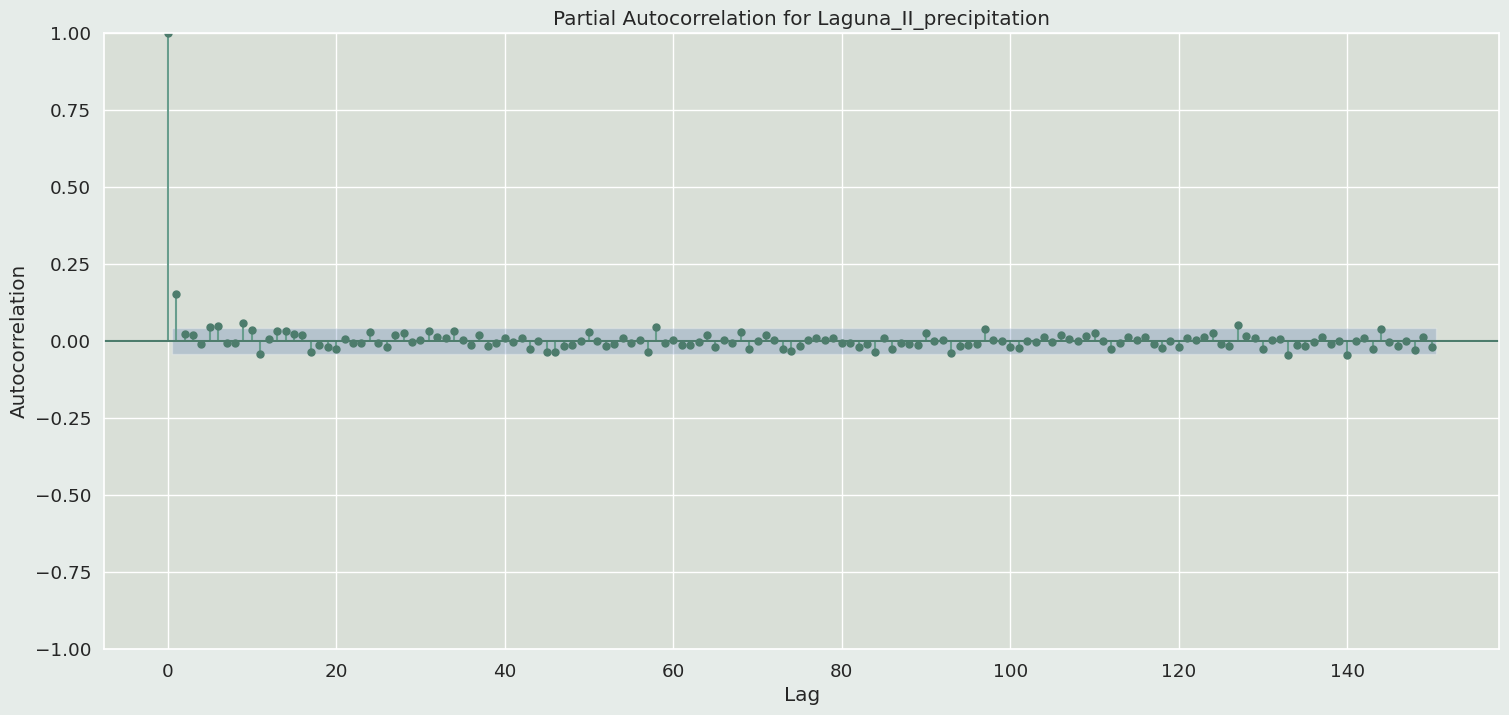

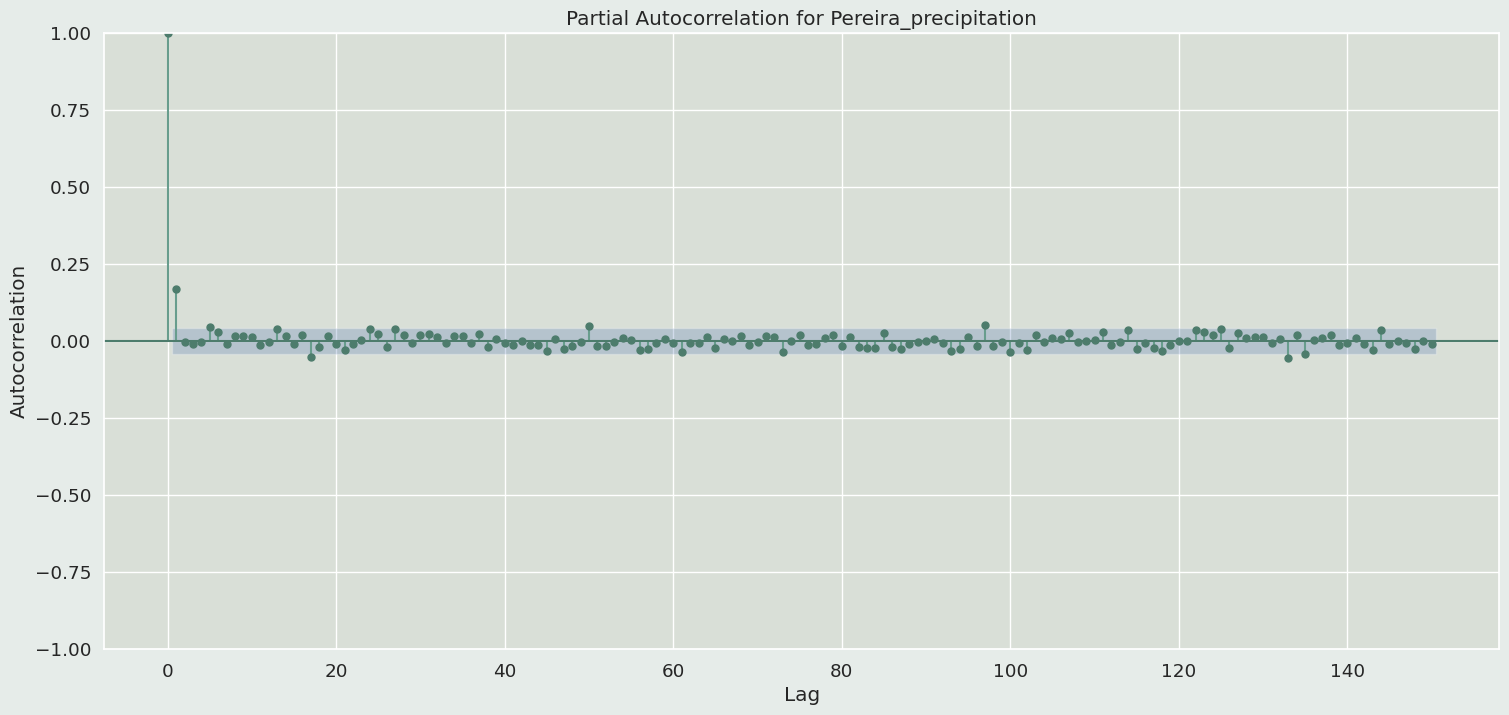

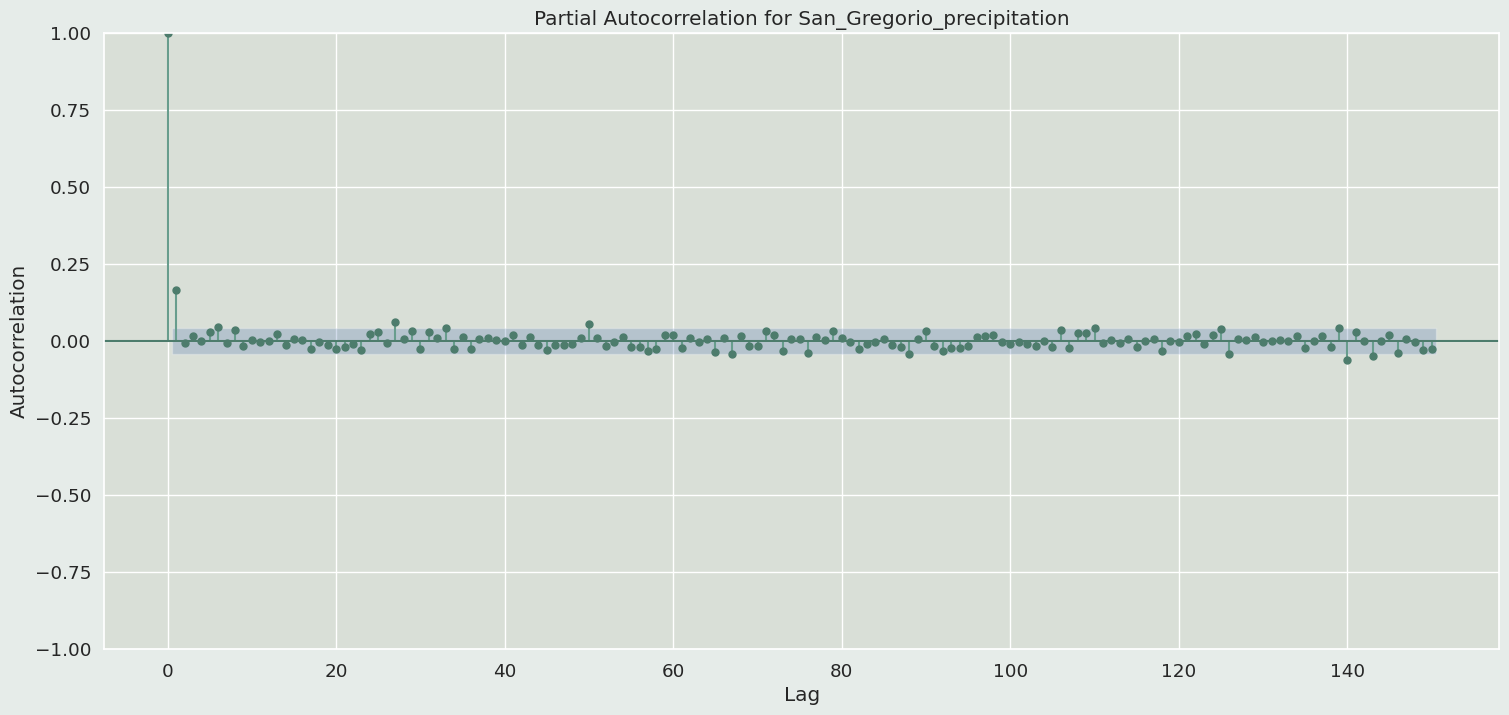

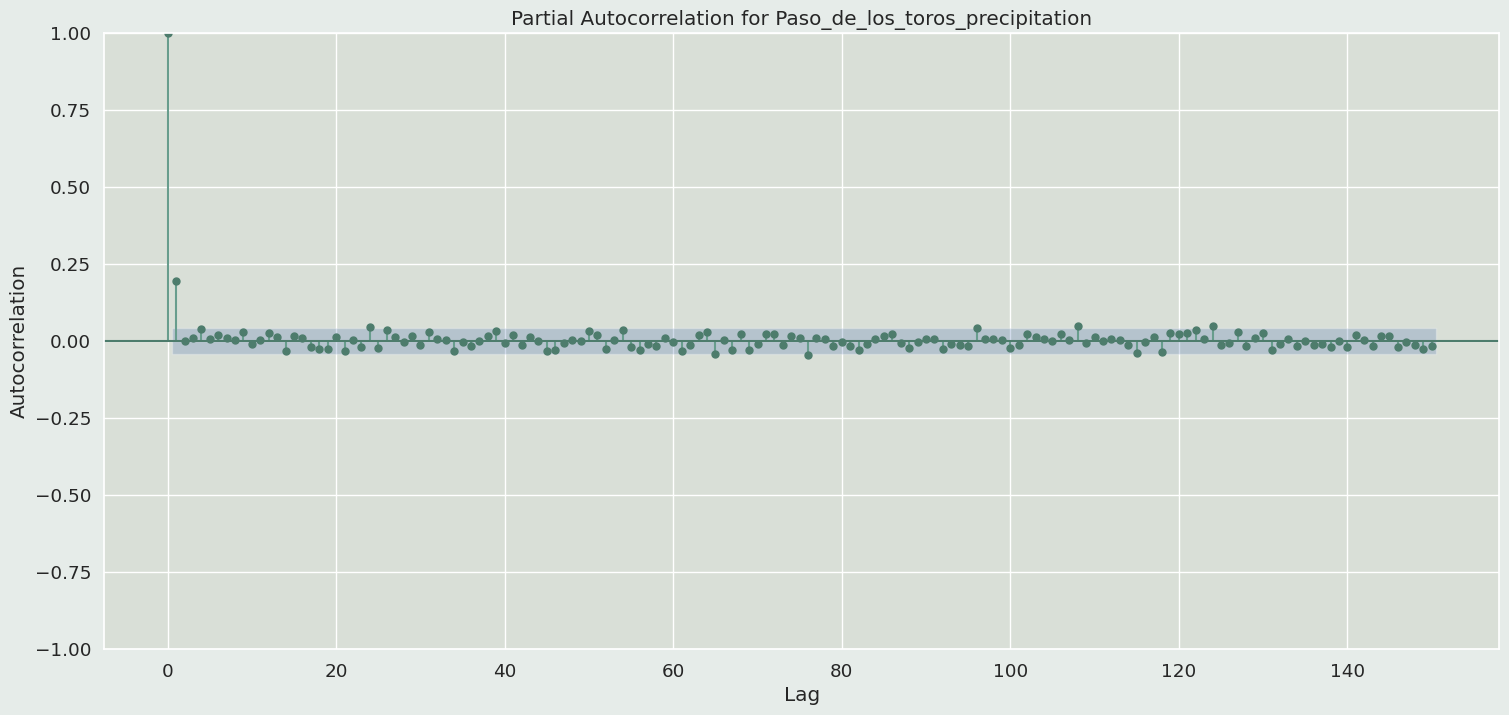

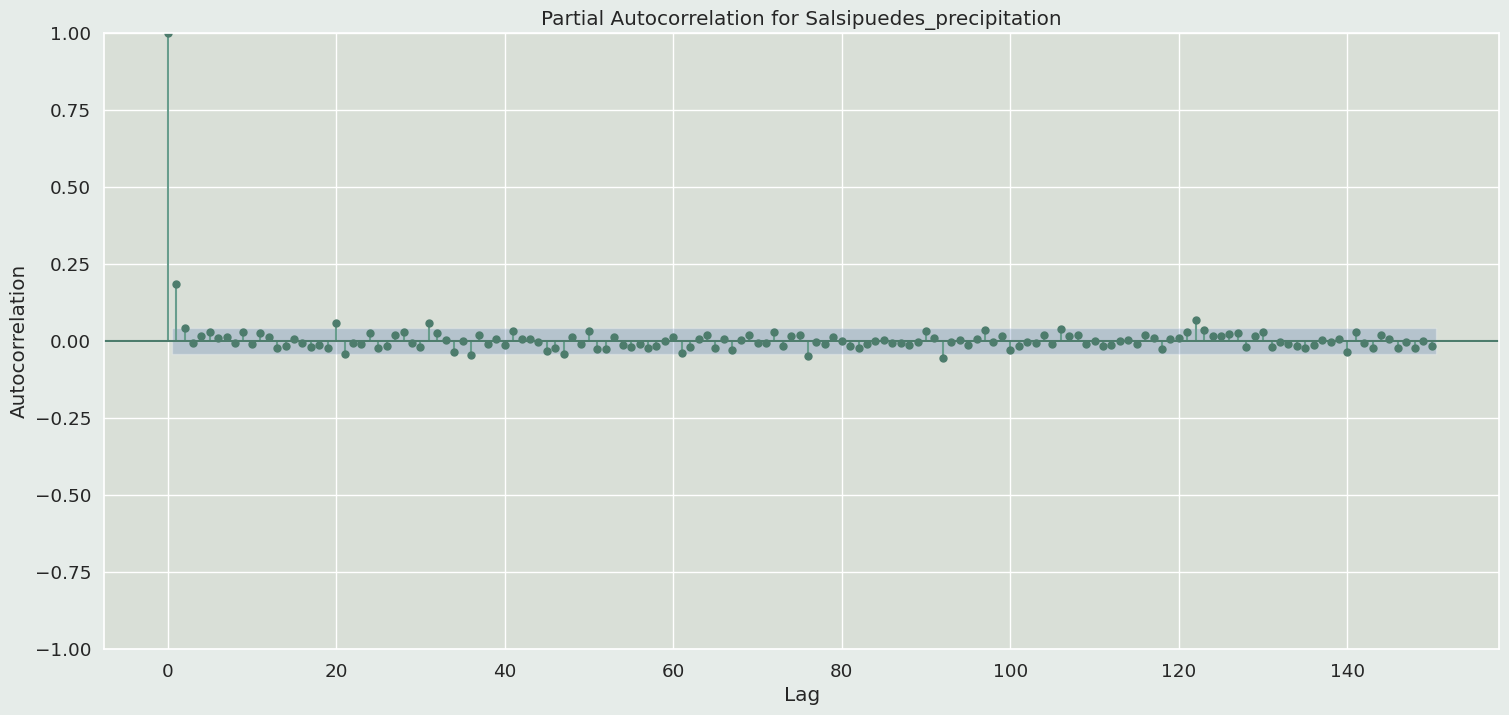

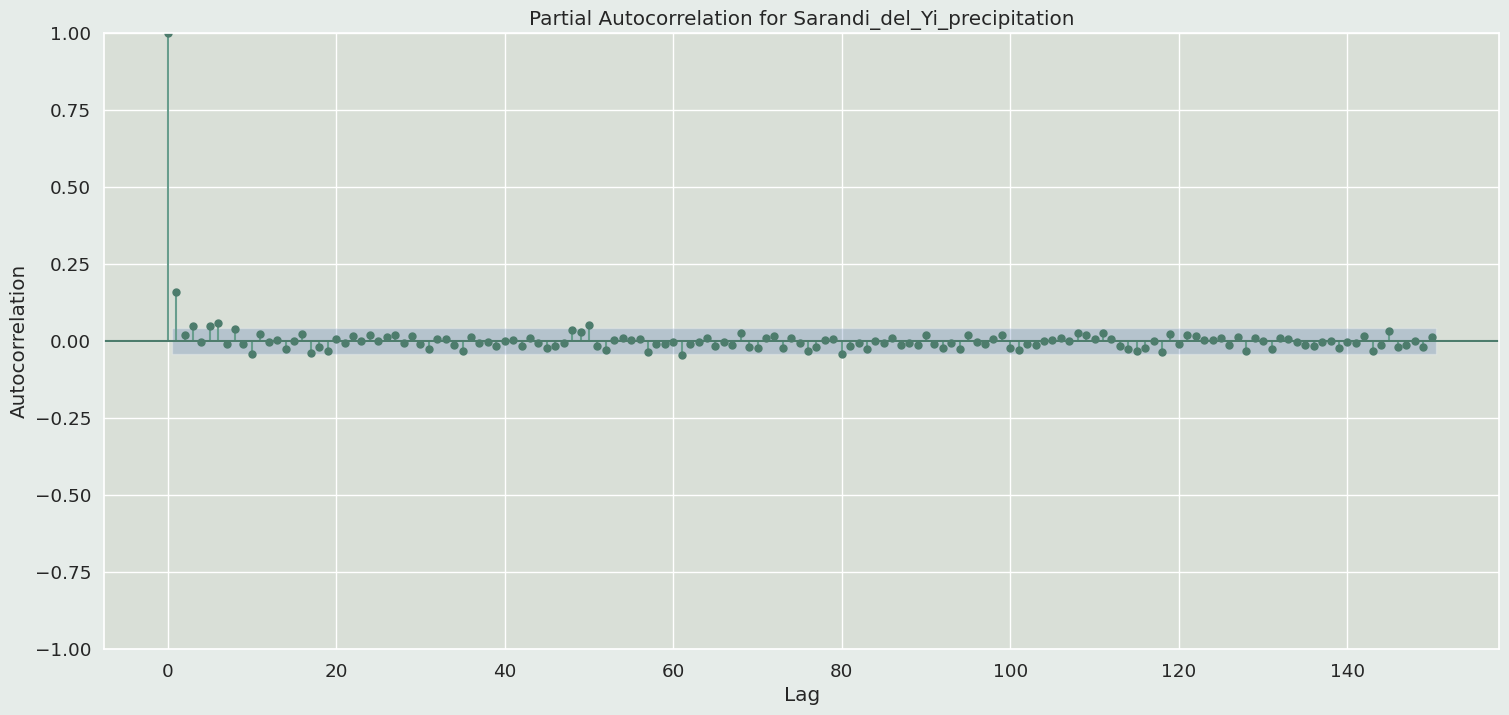

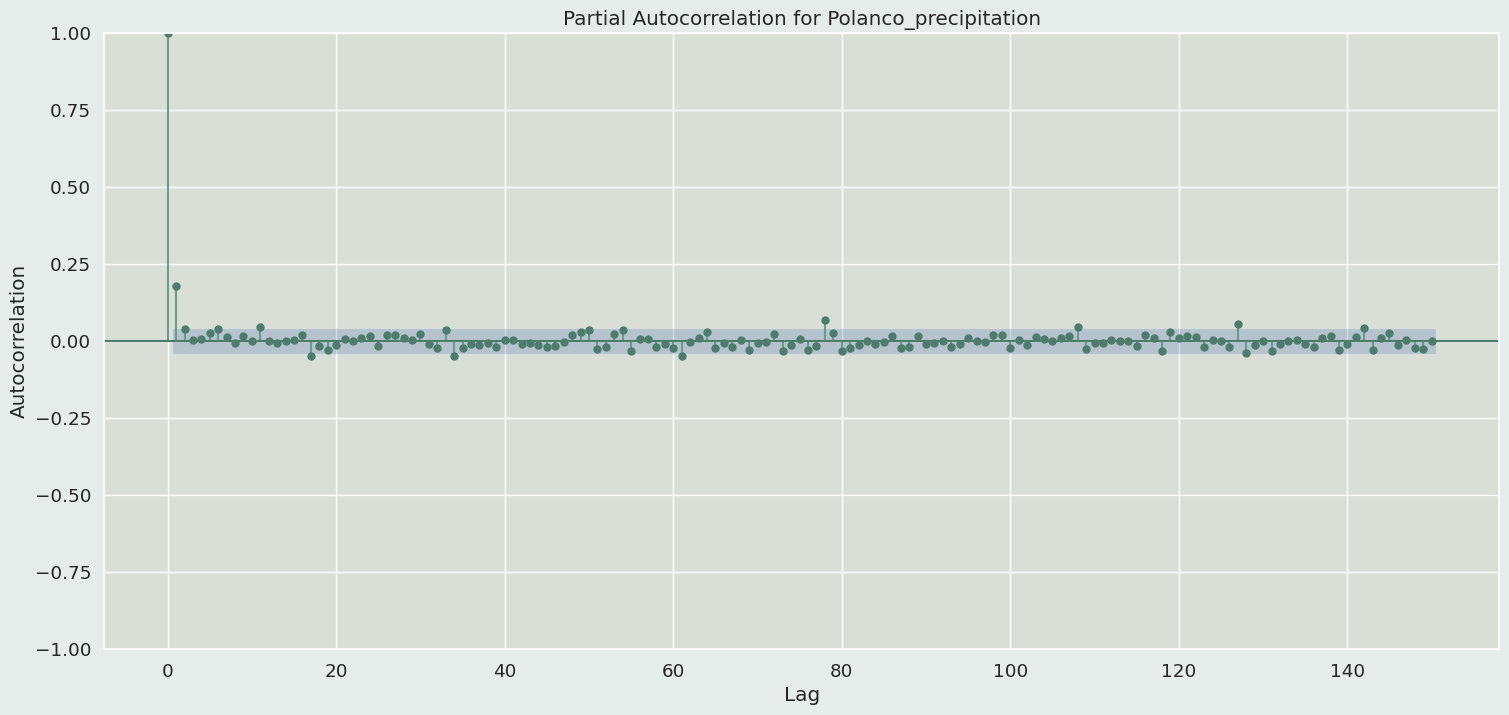

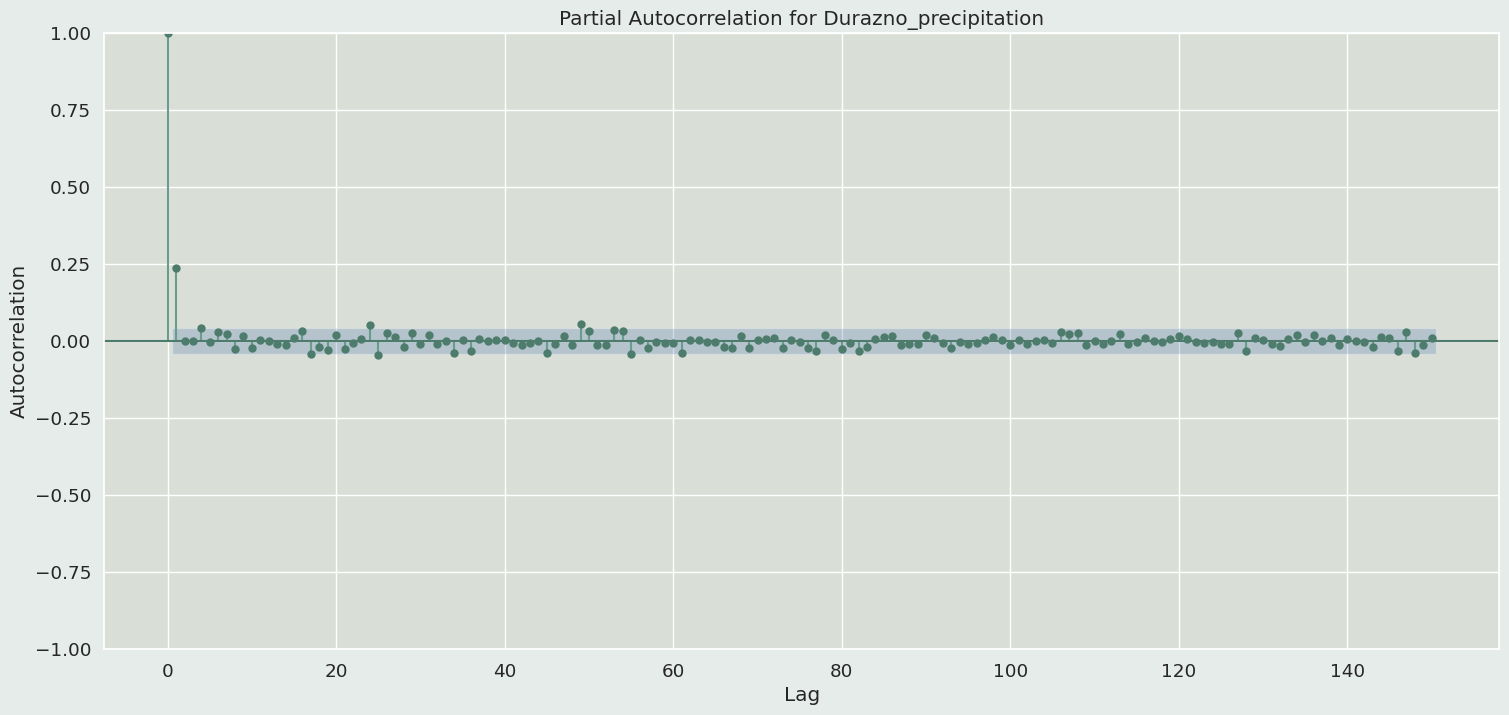

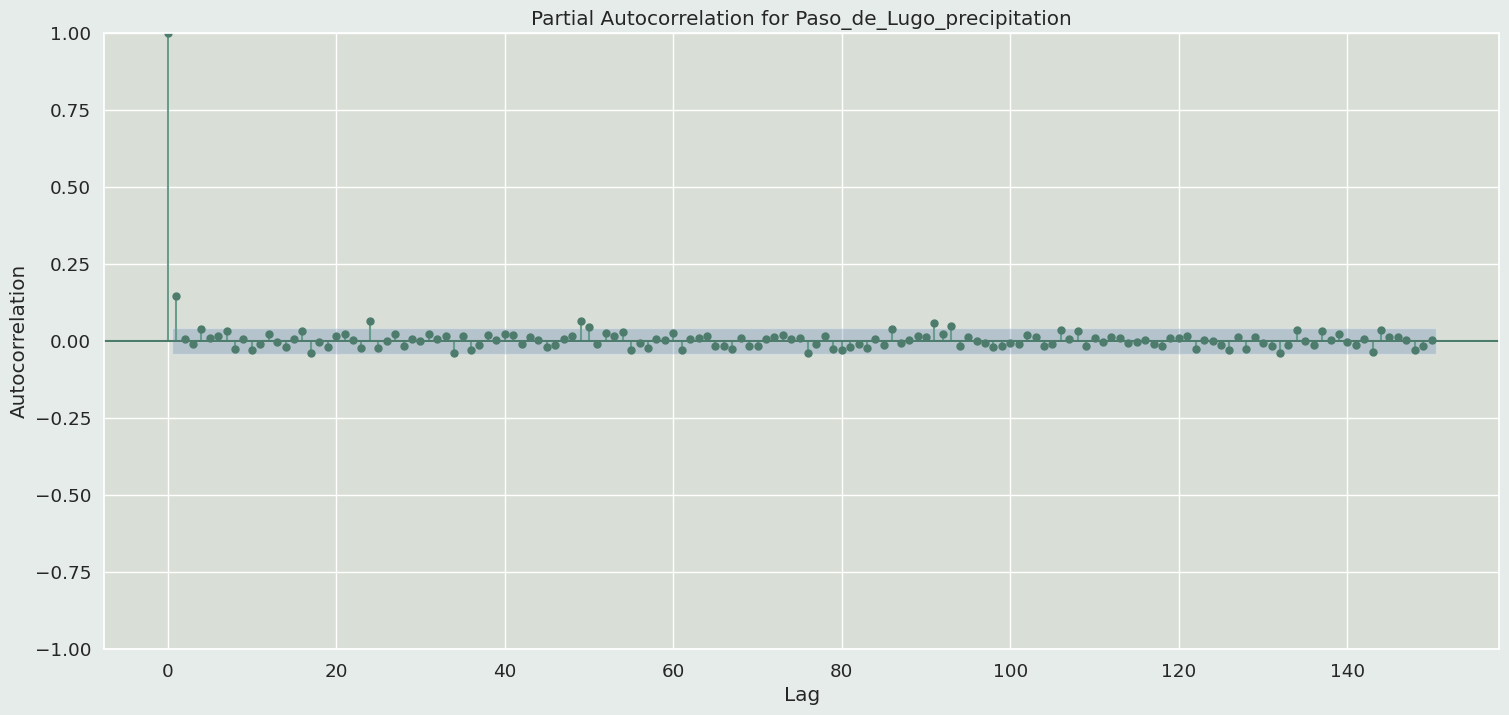

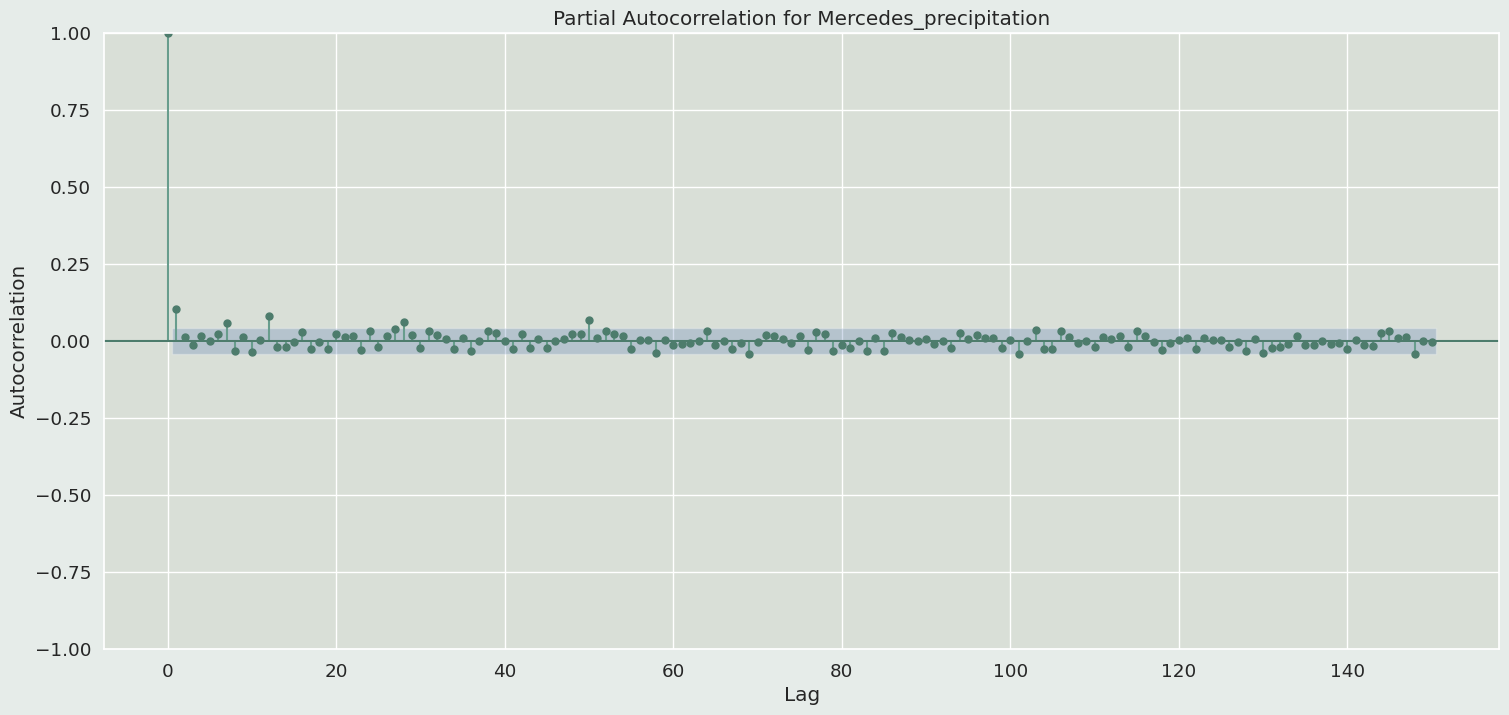

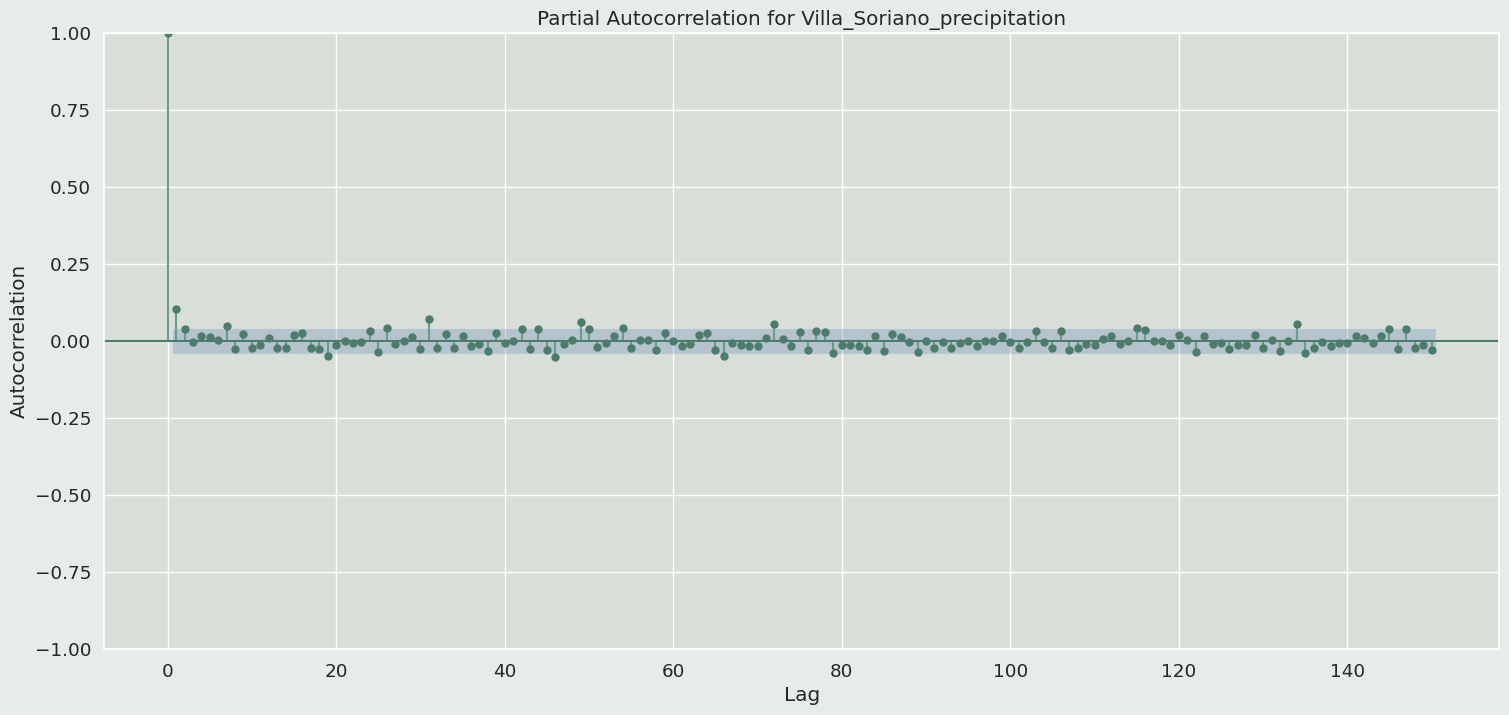

In [ ]:
plot_partial_autocorrelation(data_Negro_uruguai, Negro_uruguai_columns_name, 150, Negro_uruguai_metrics_path + "Parcial_Autocorrelation/")

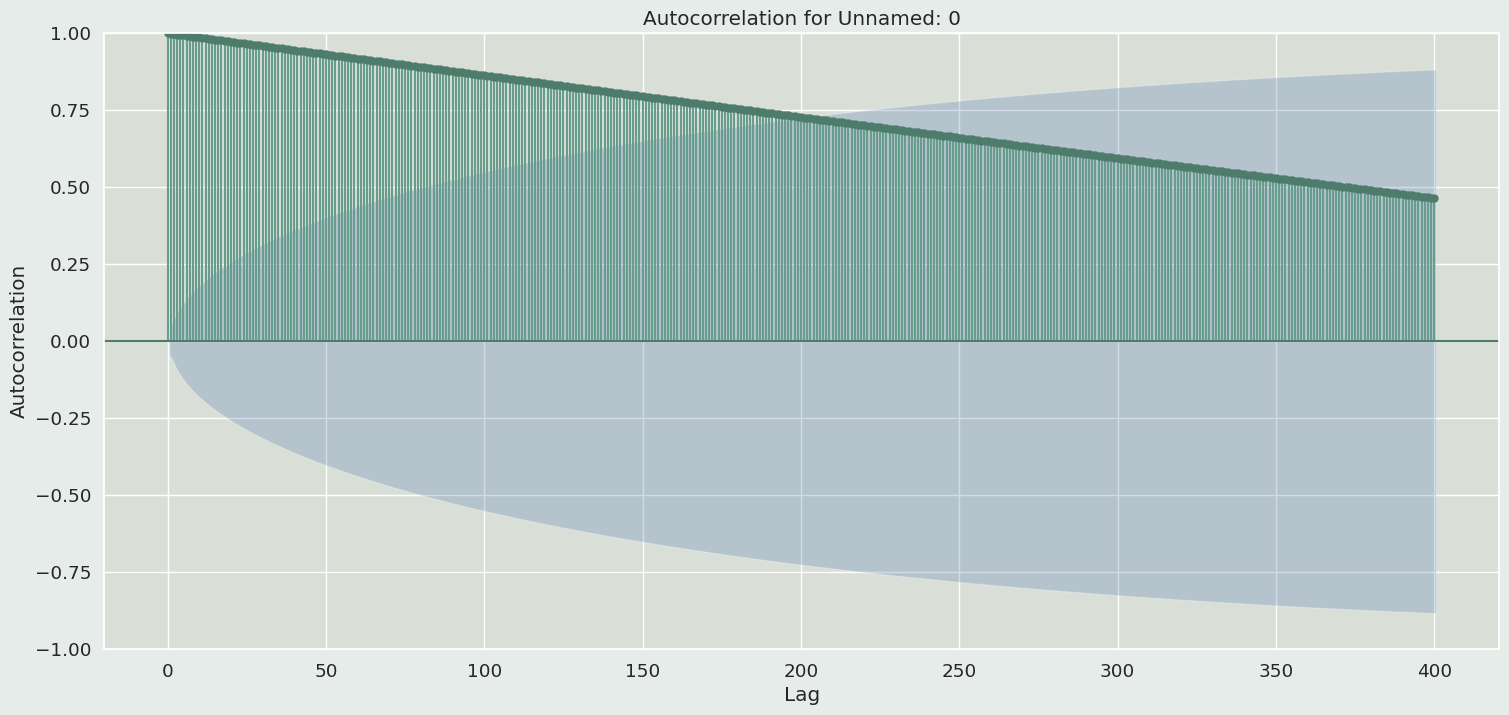

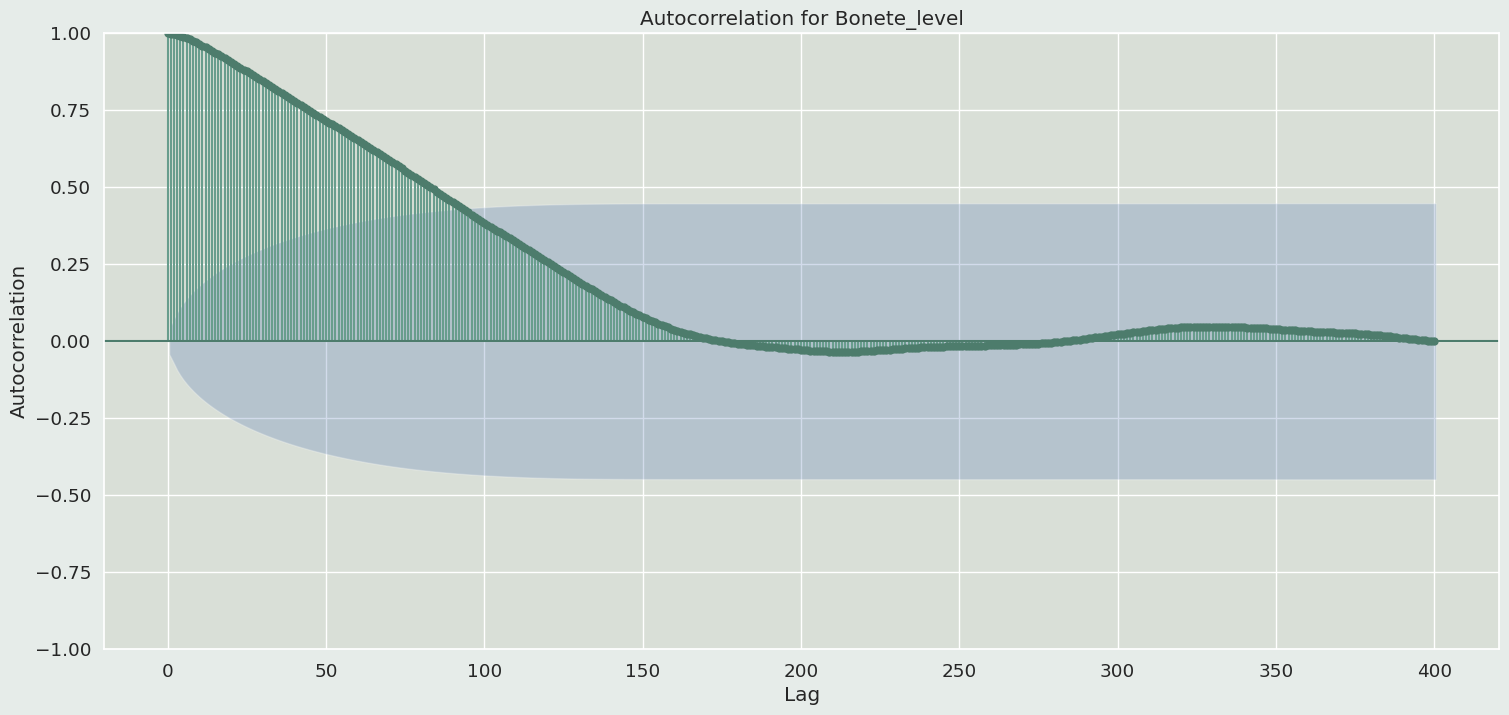

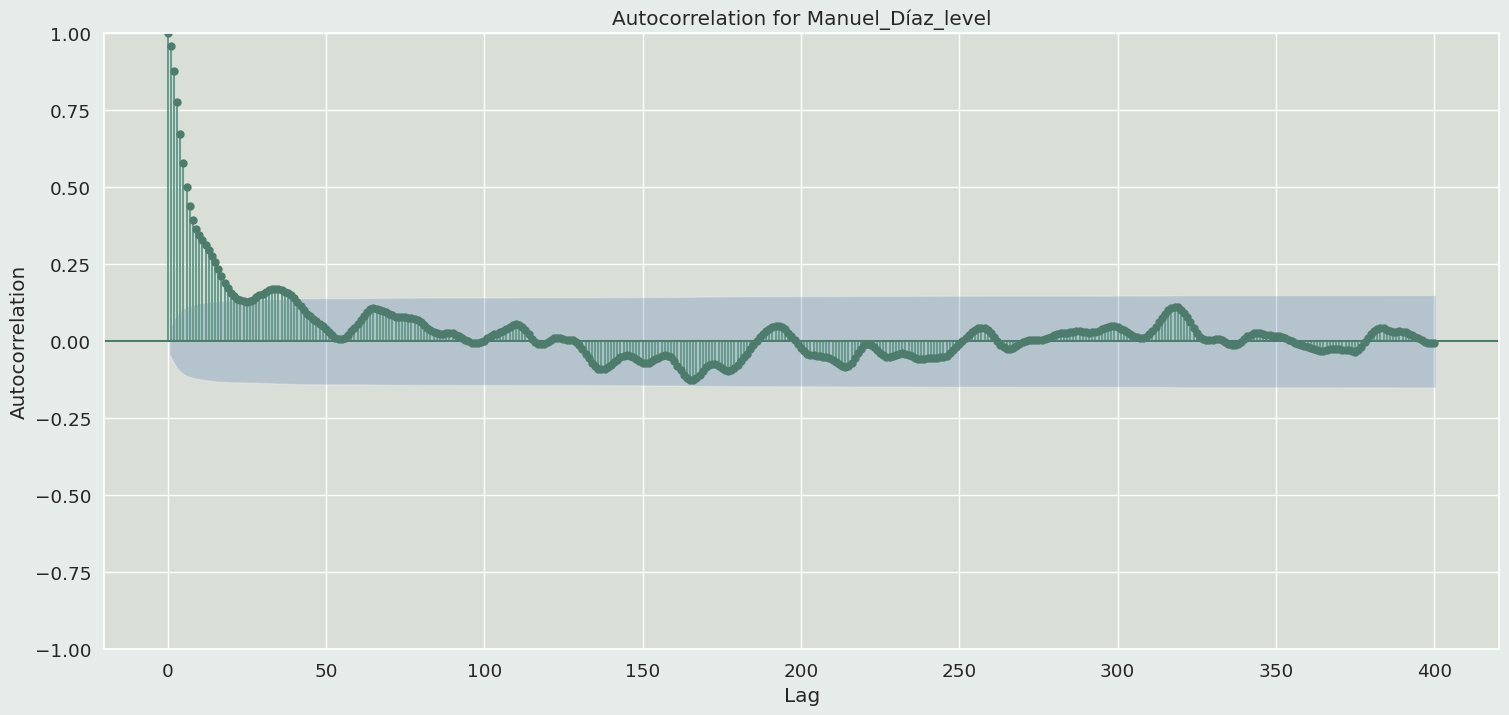

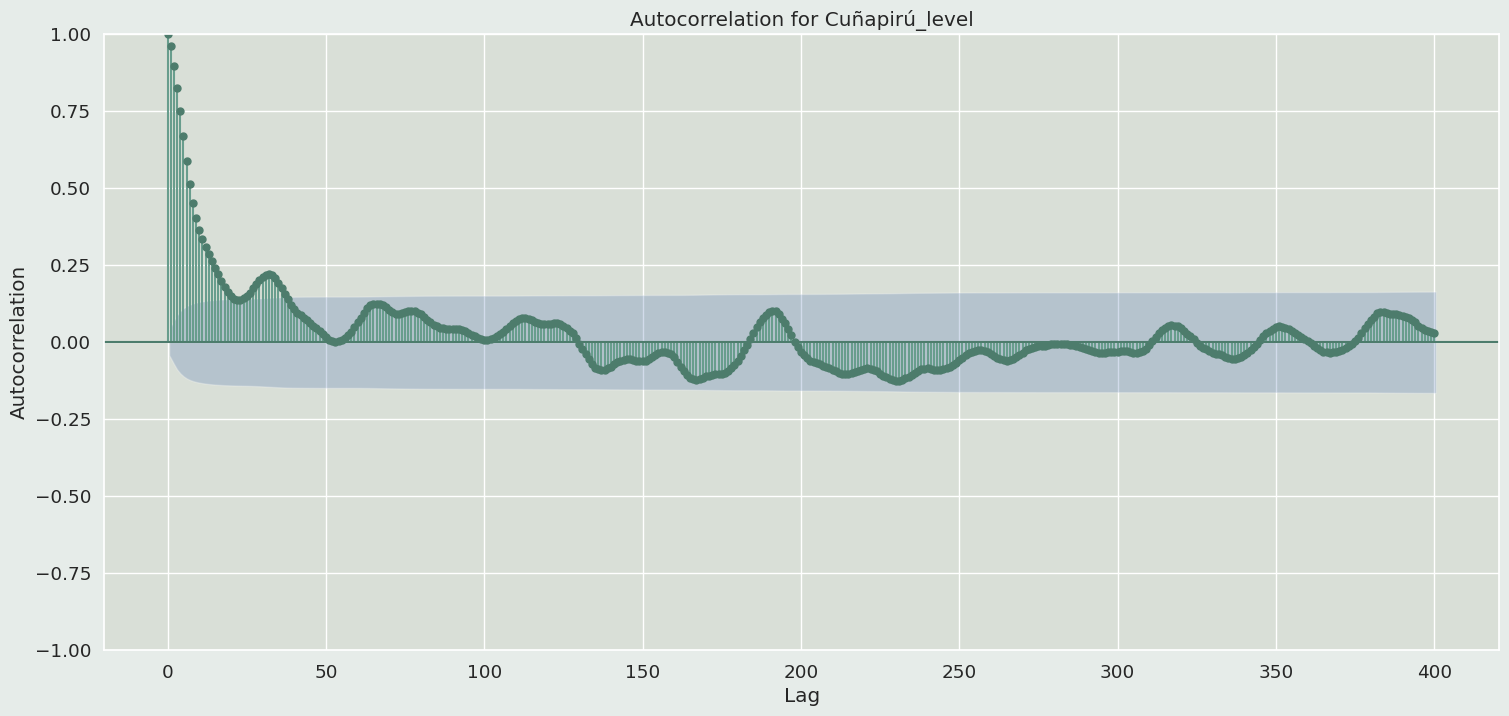

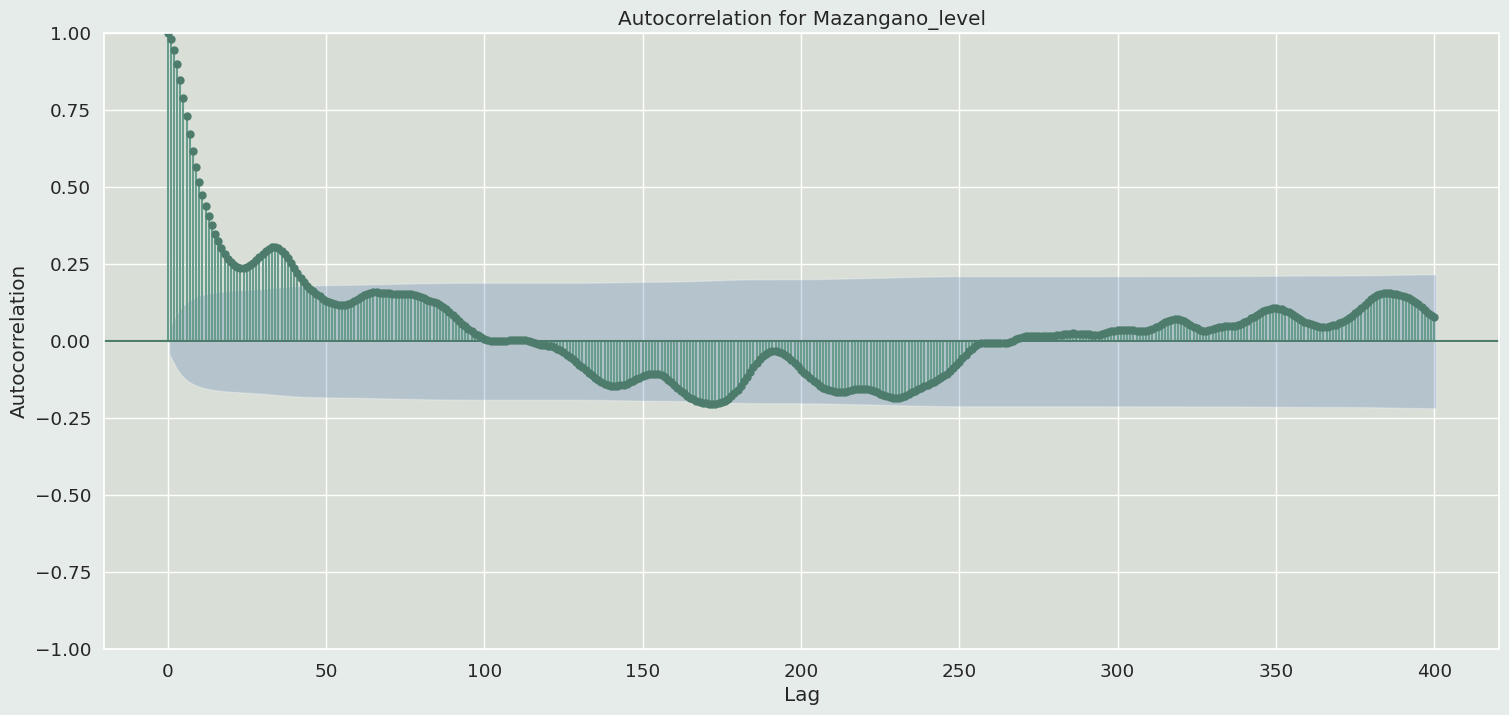

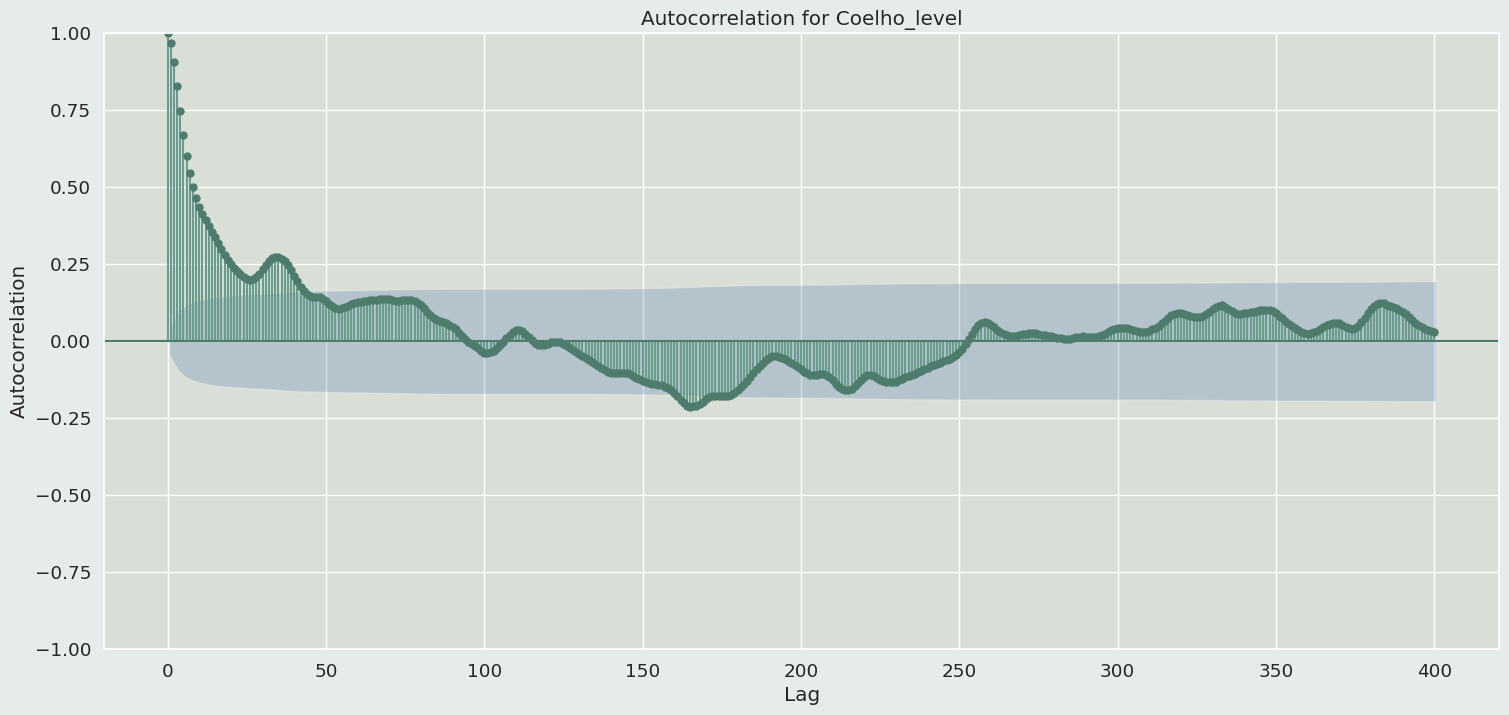

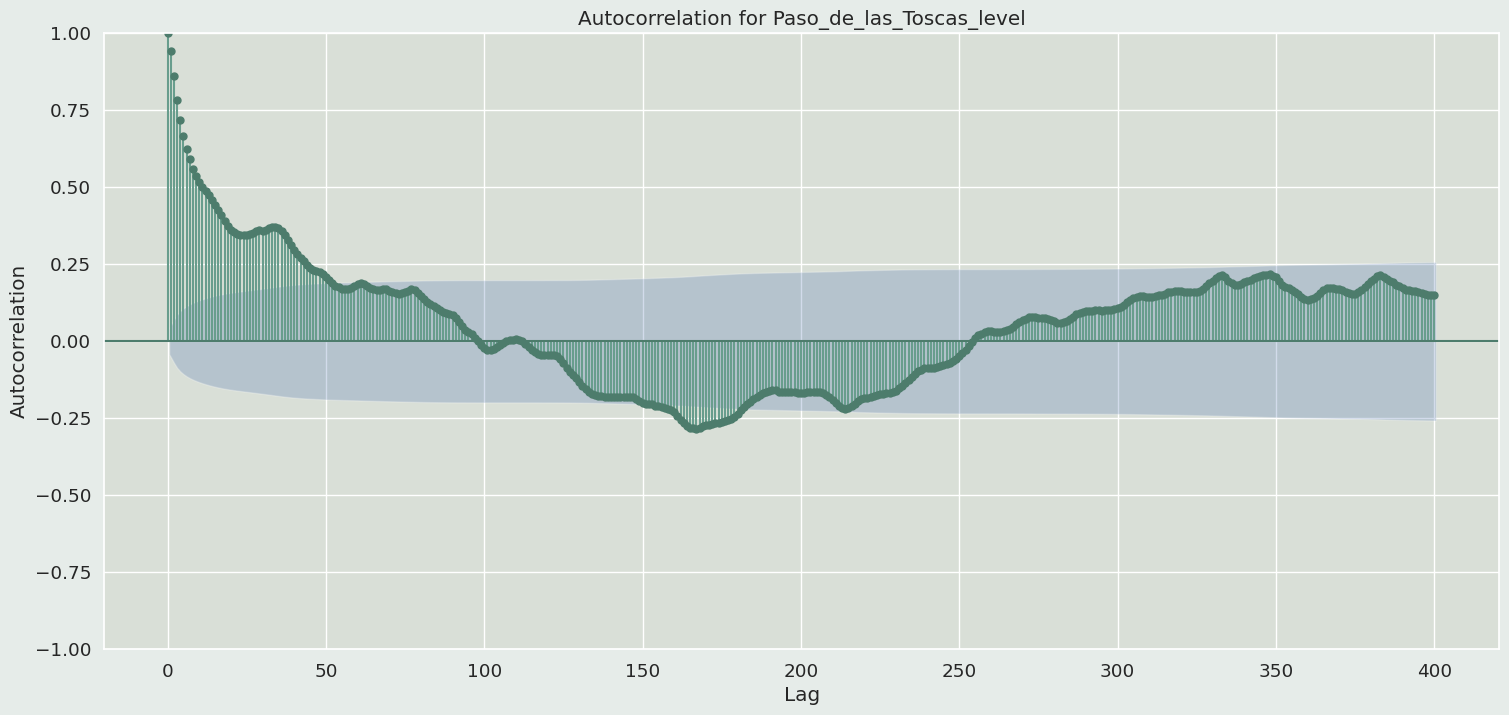

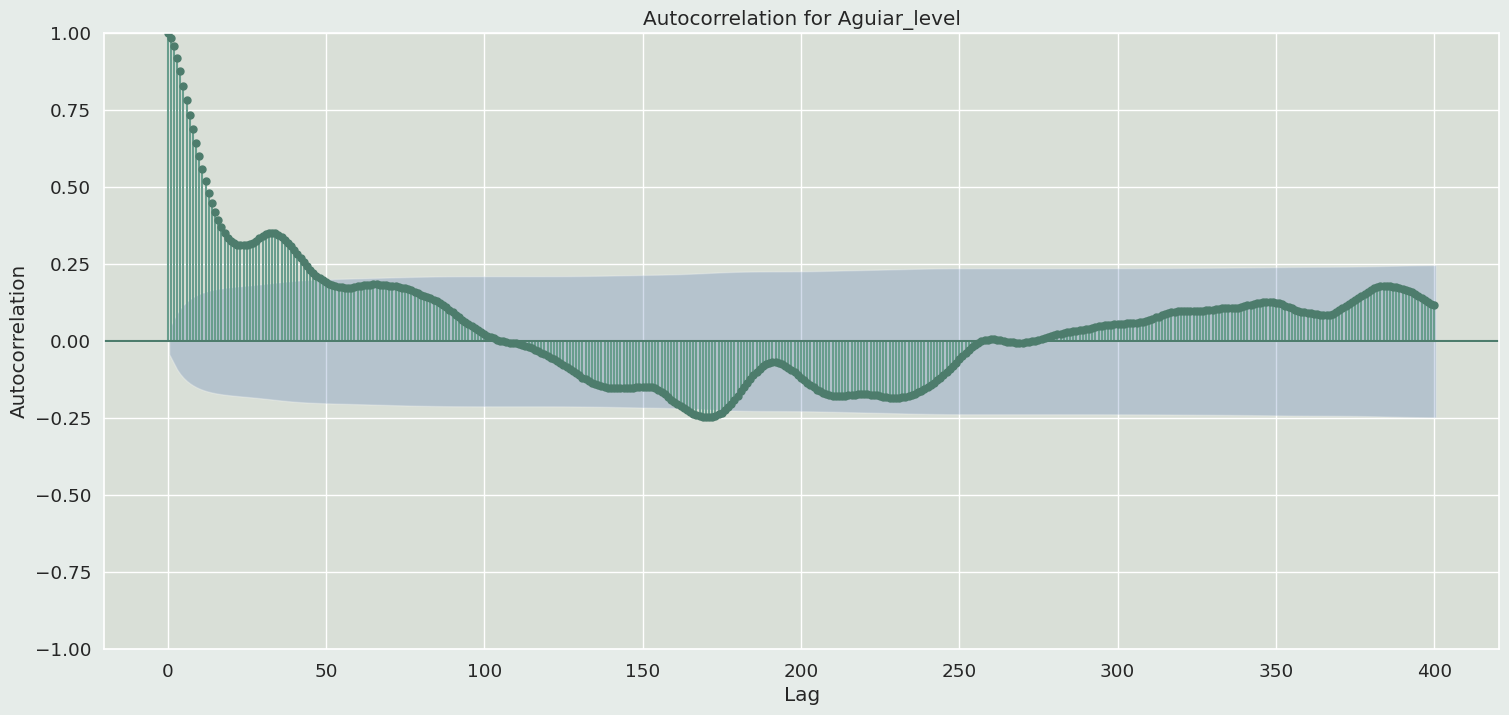

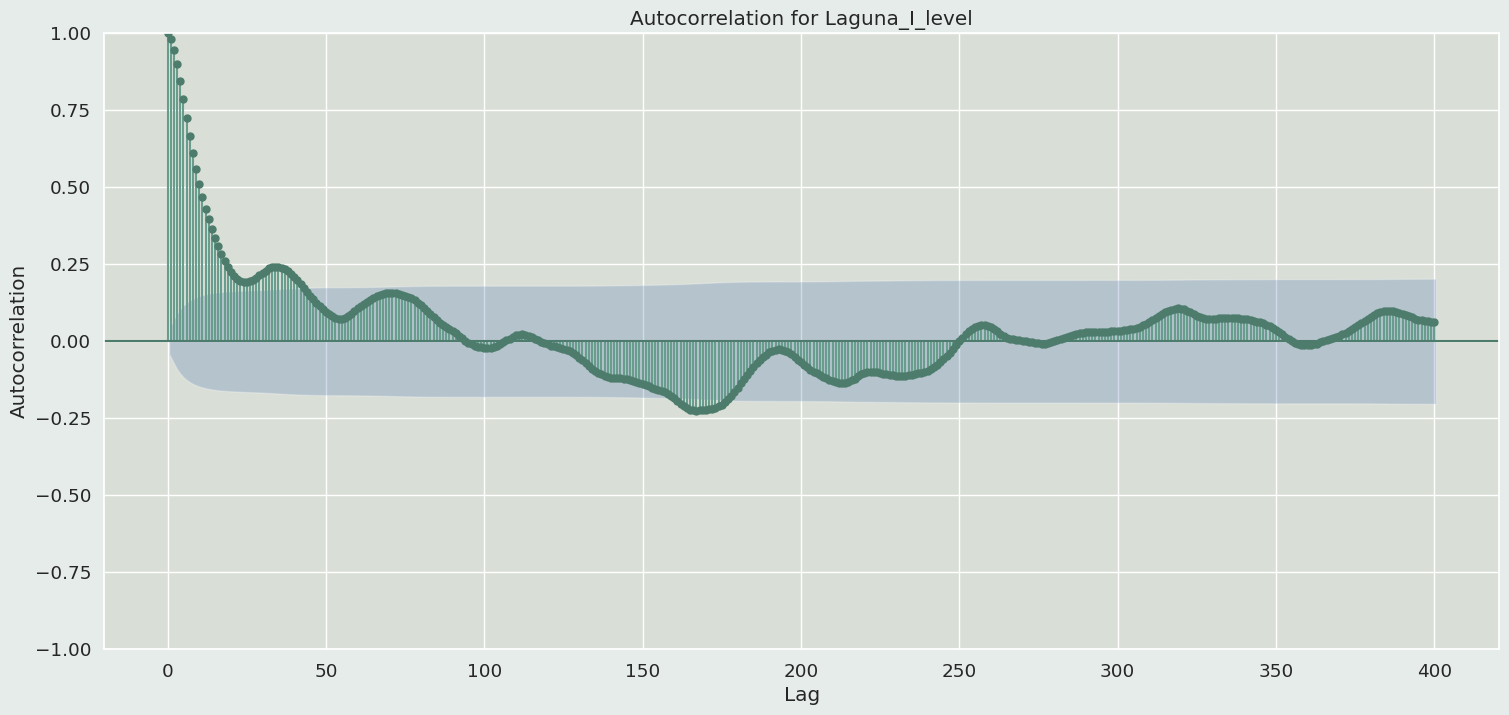

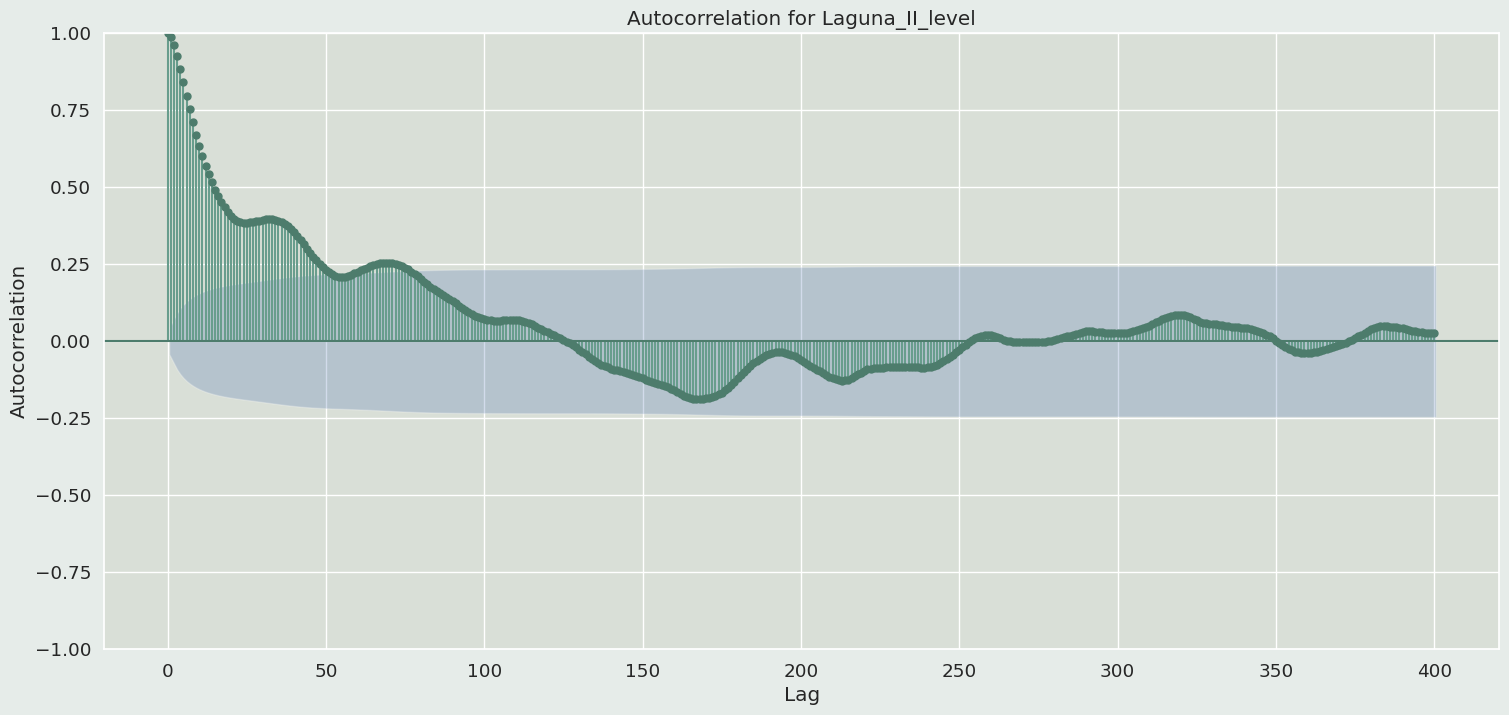

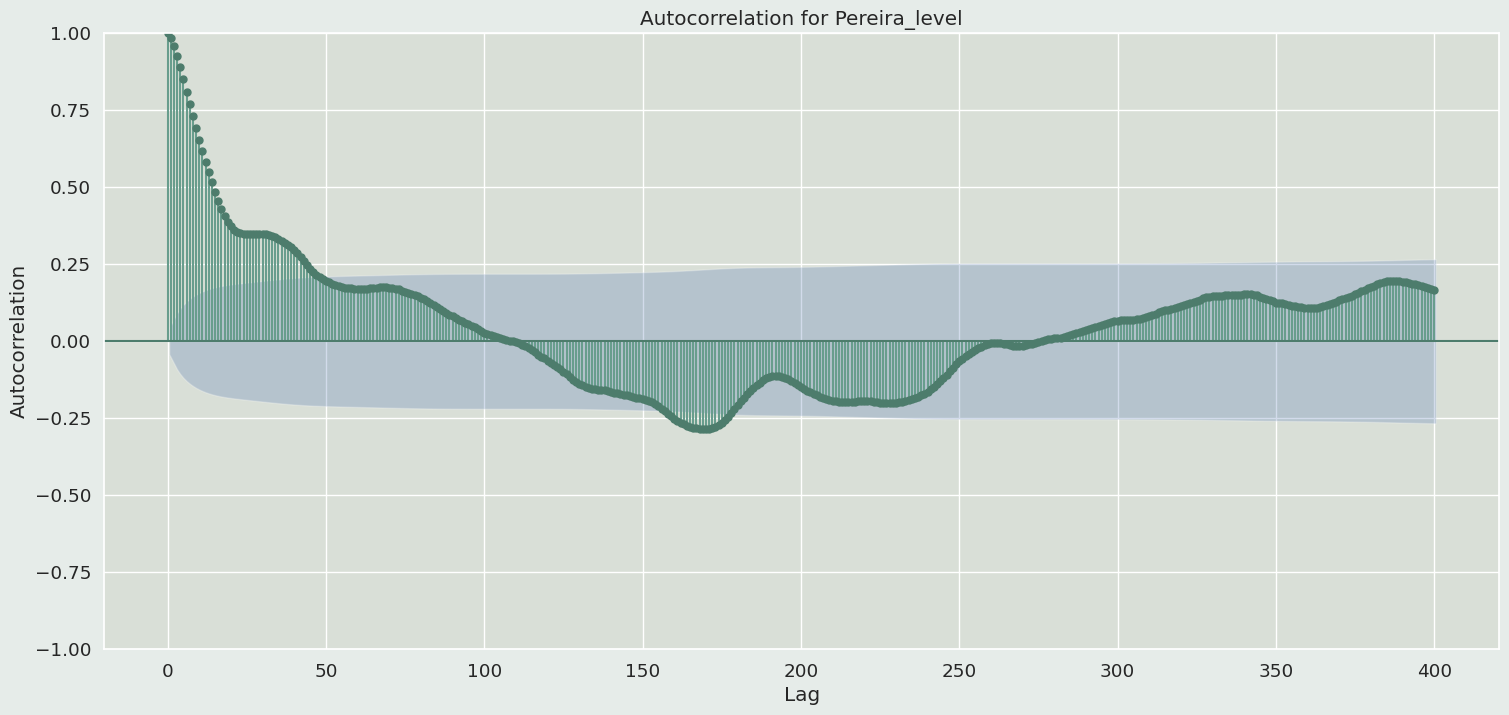

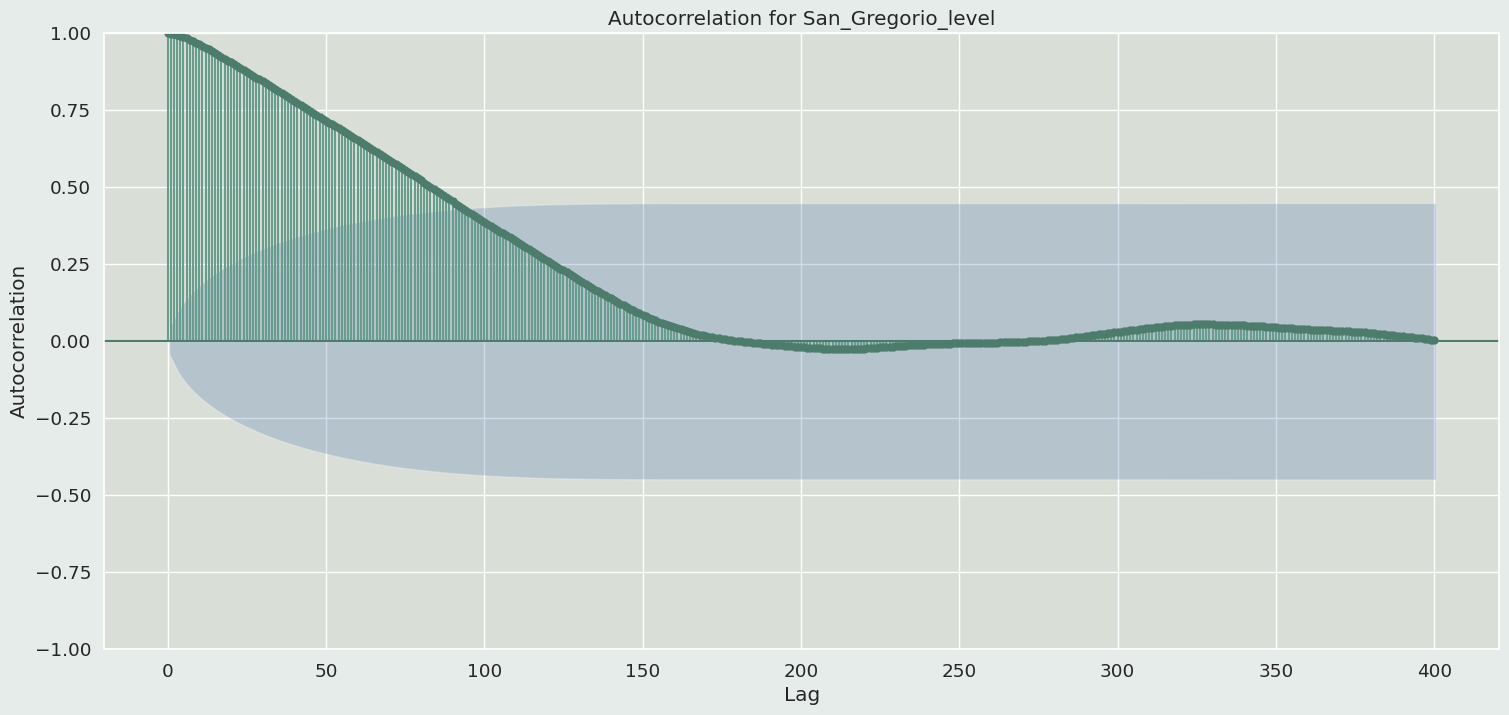

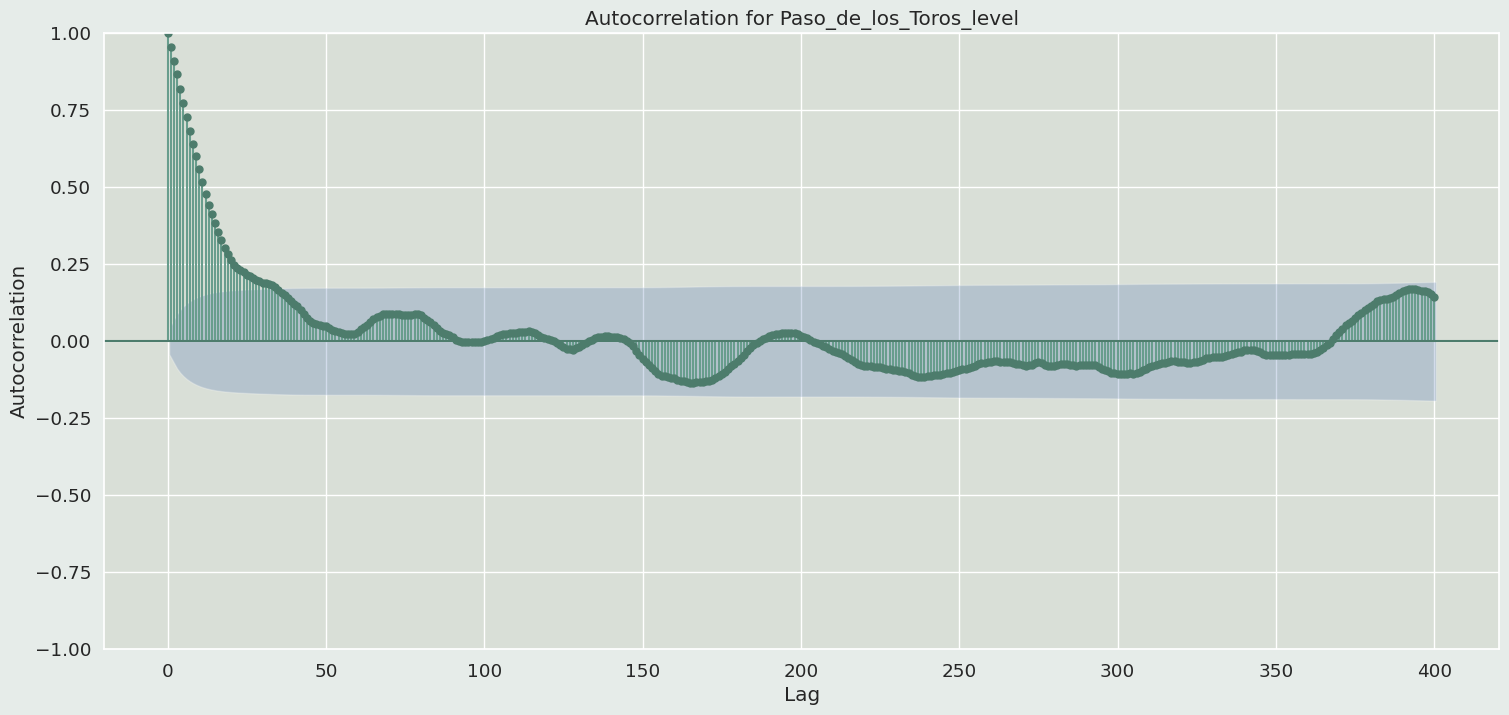

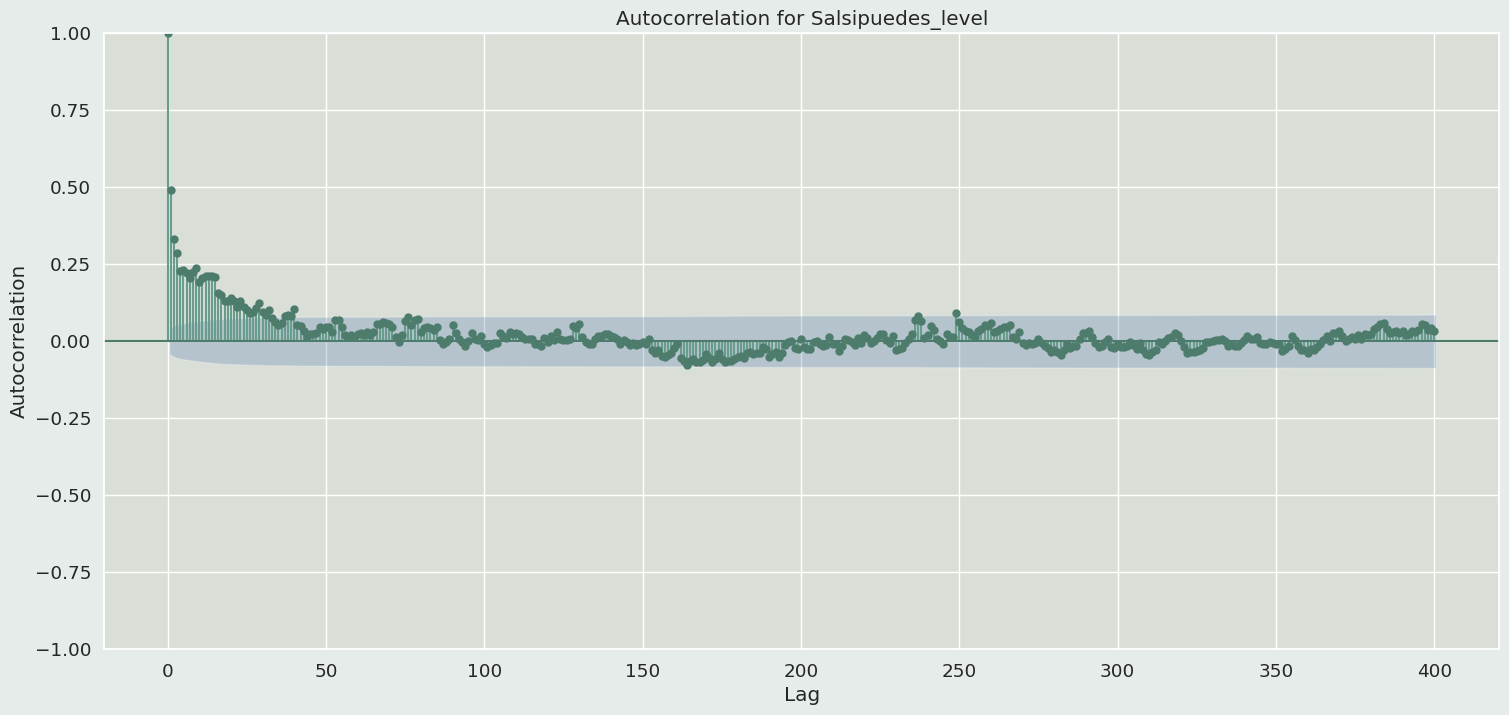

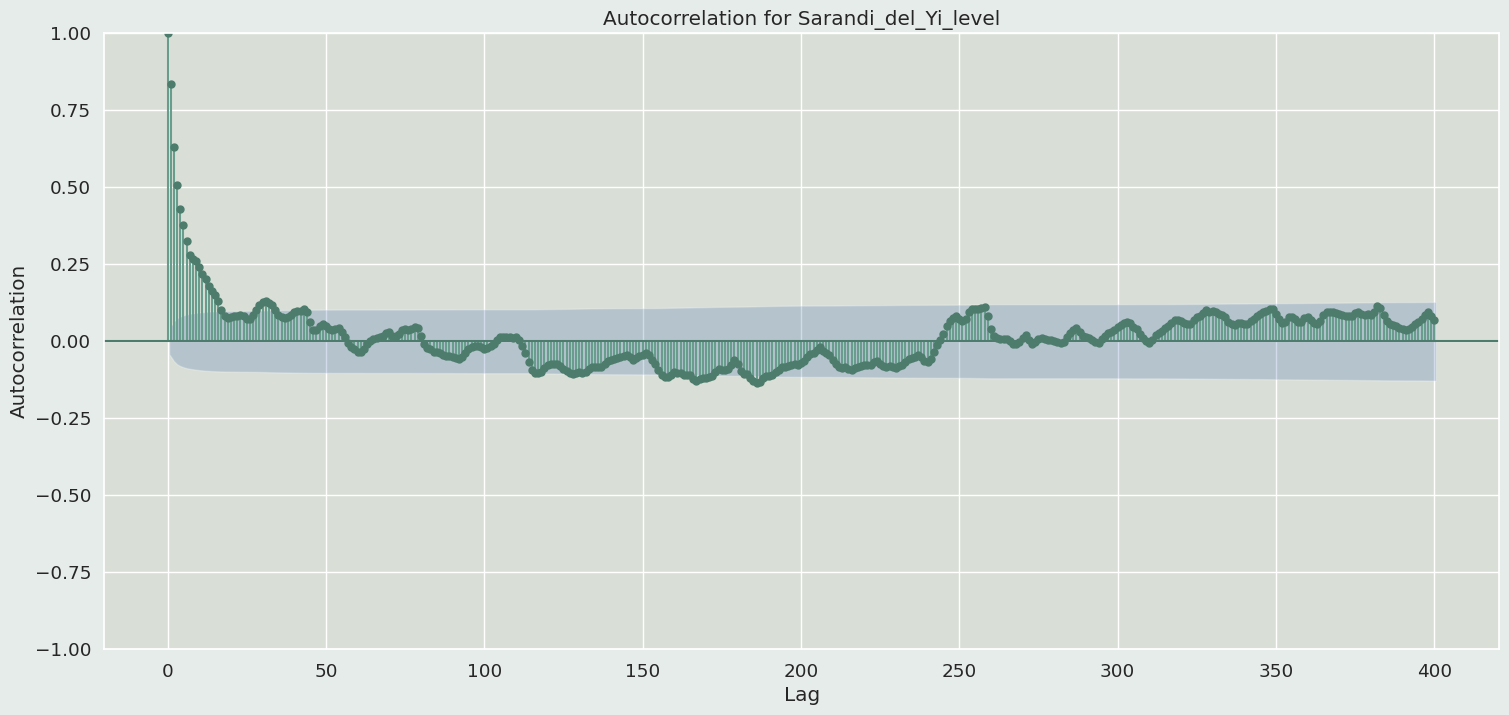

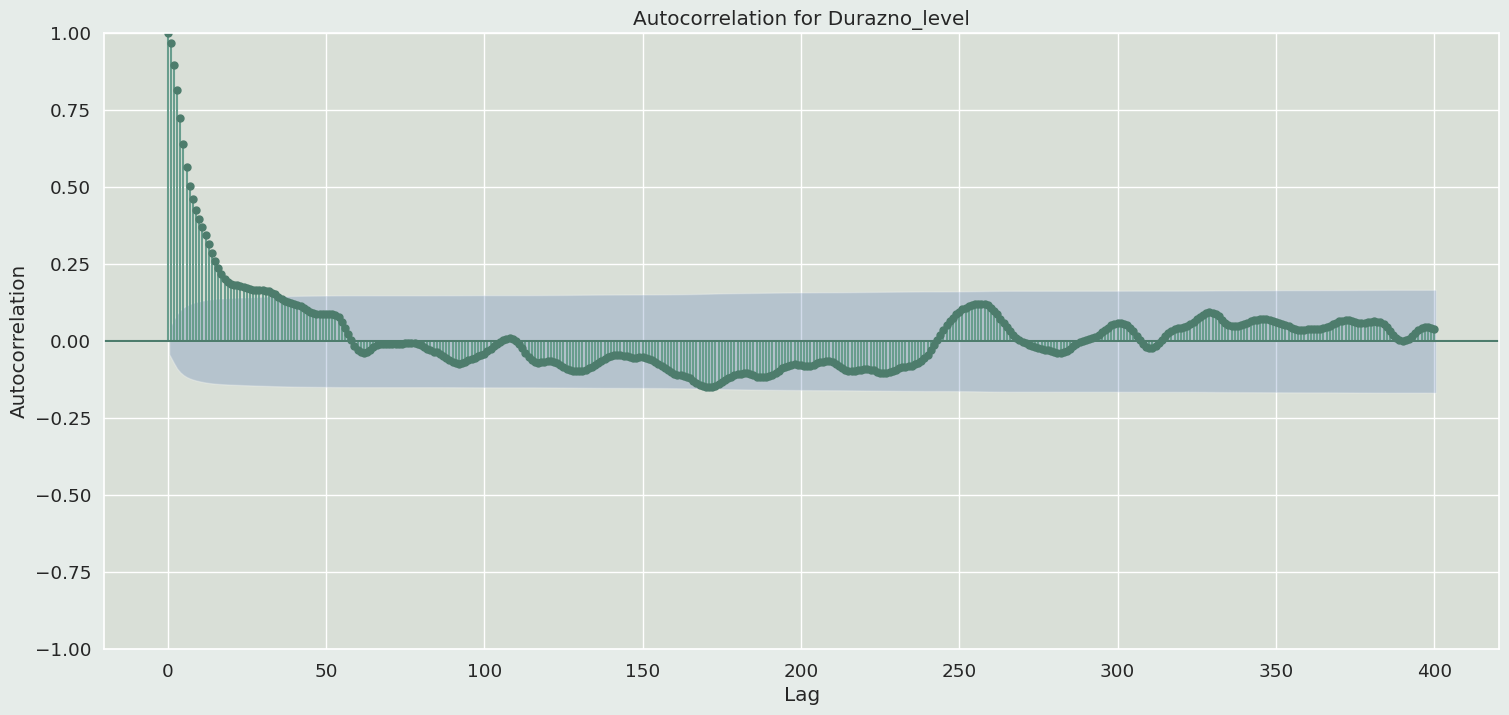

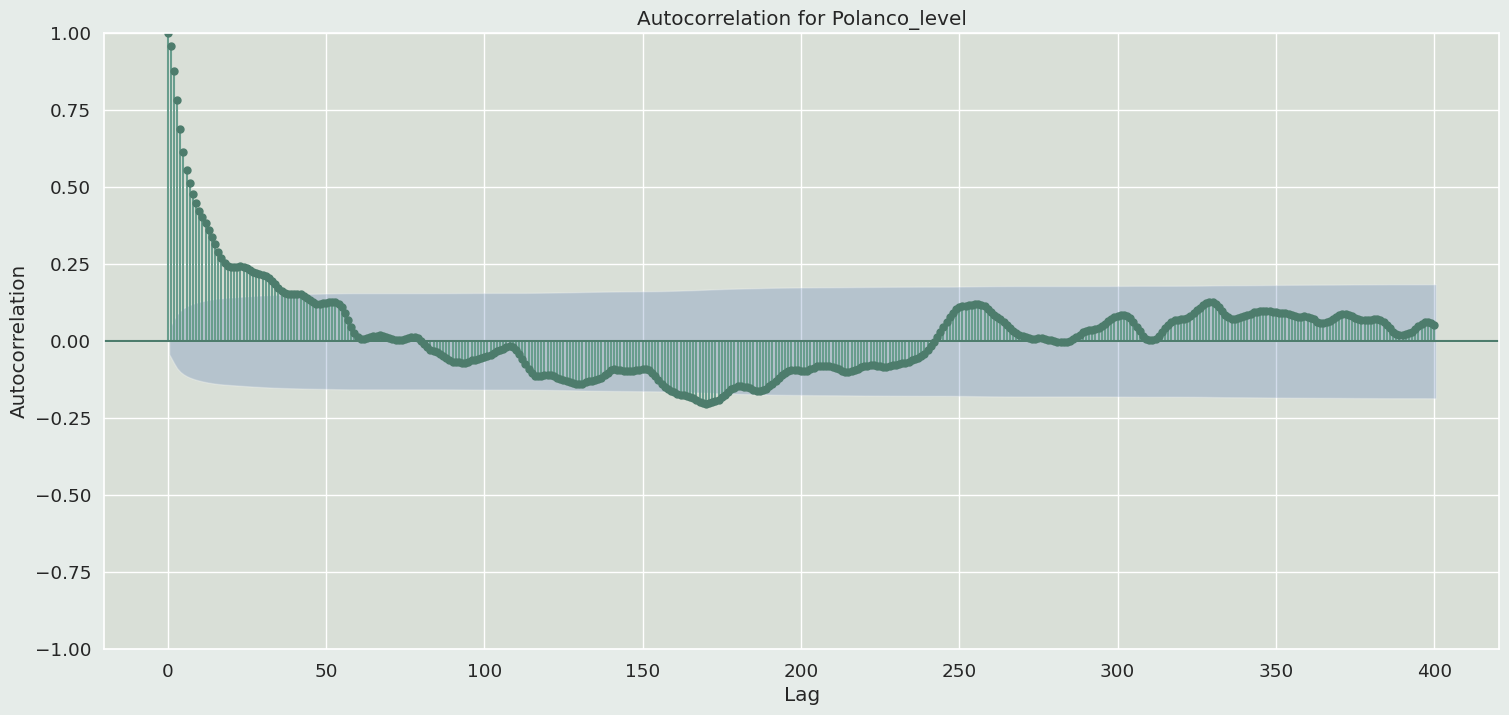

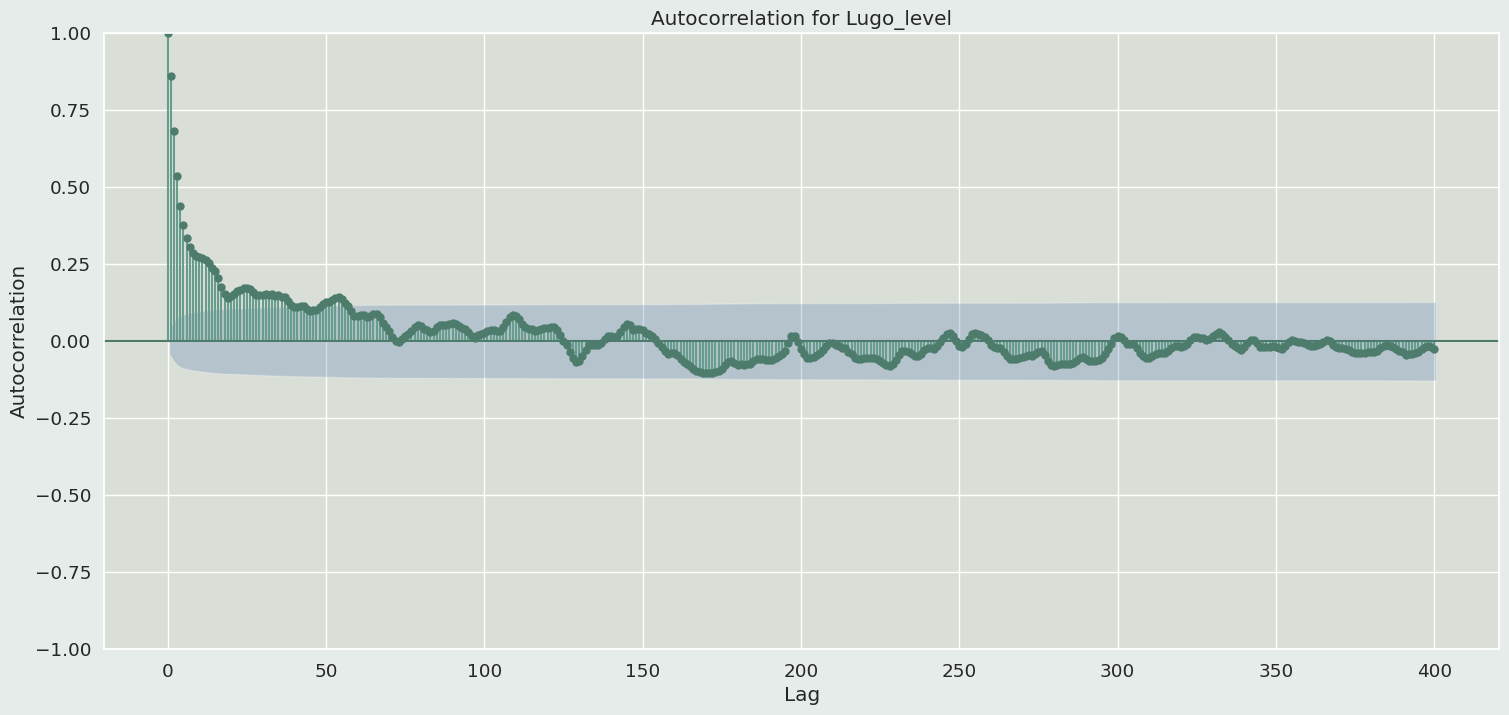

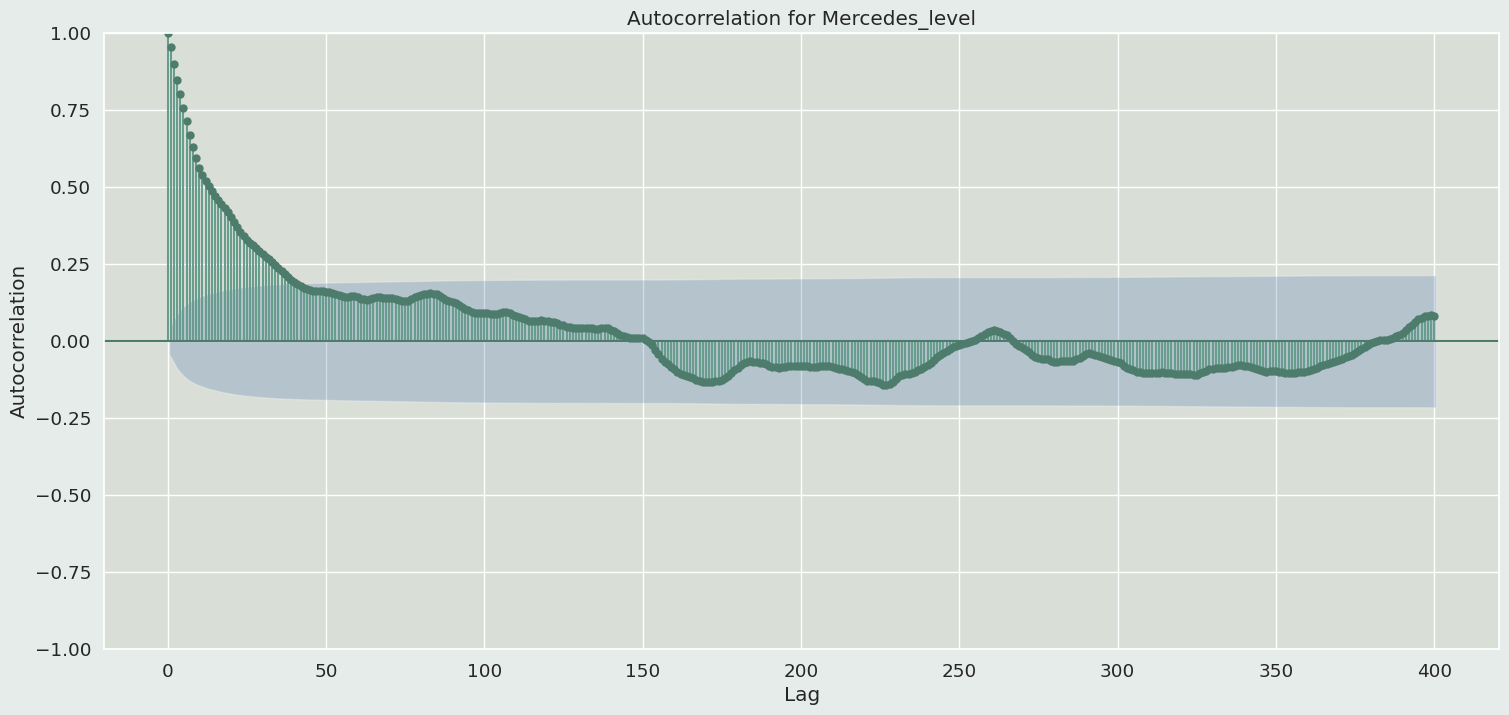

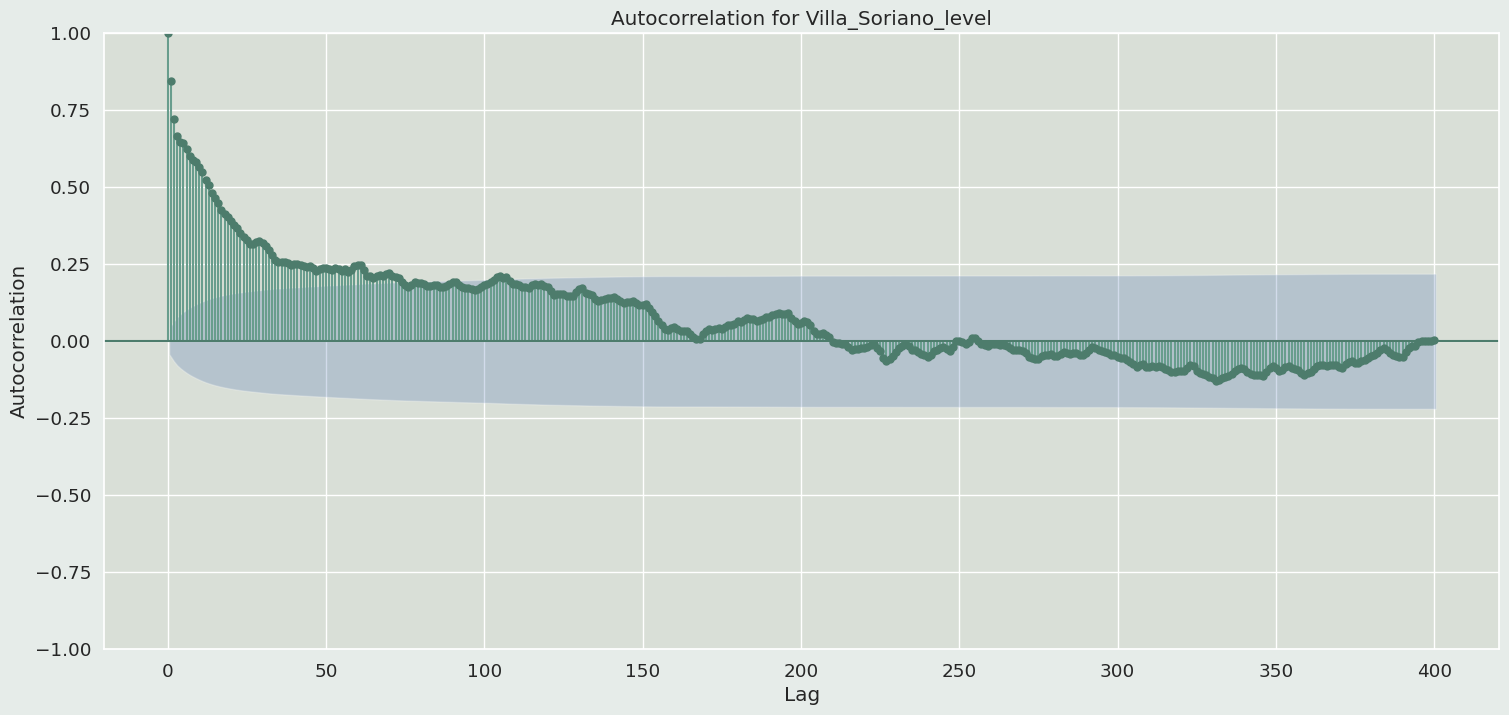

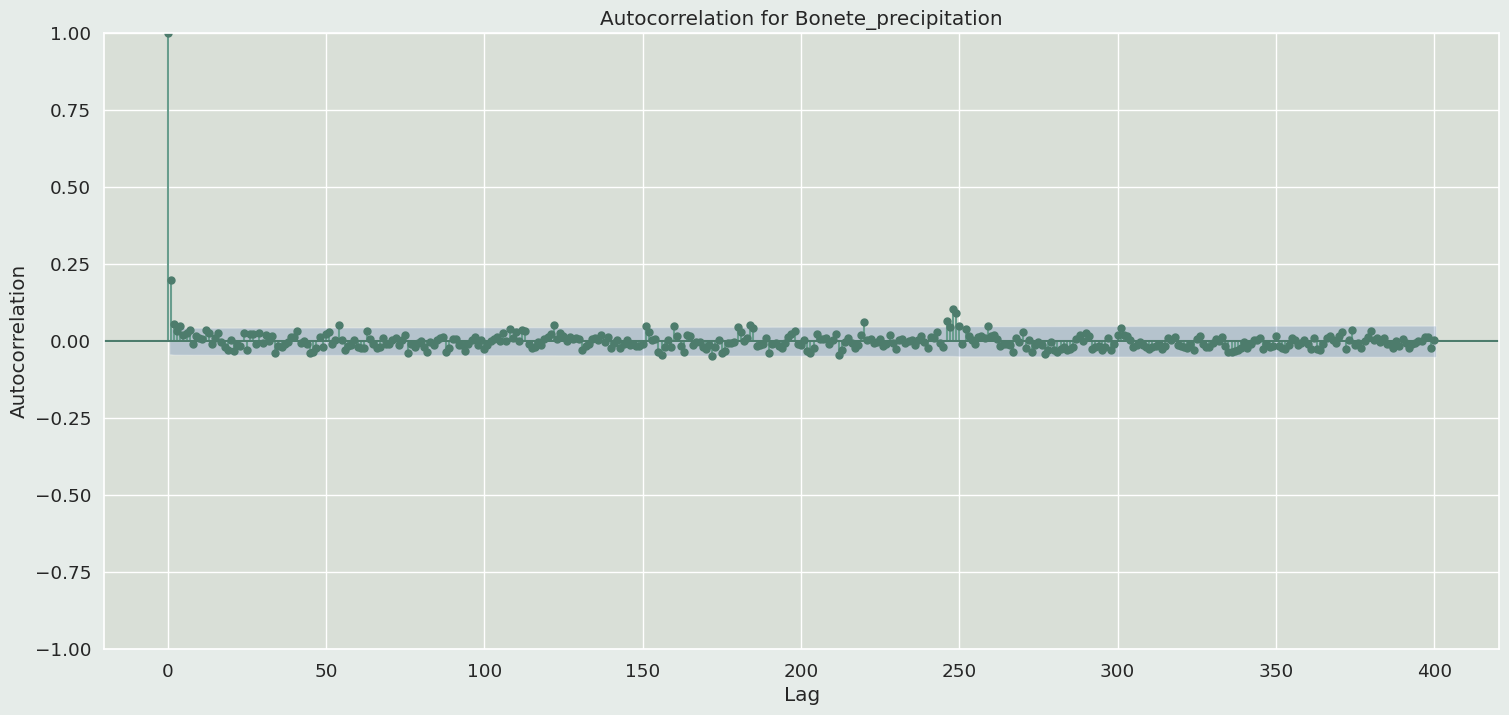

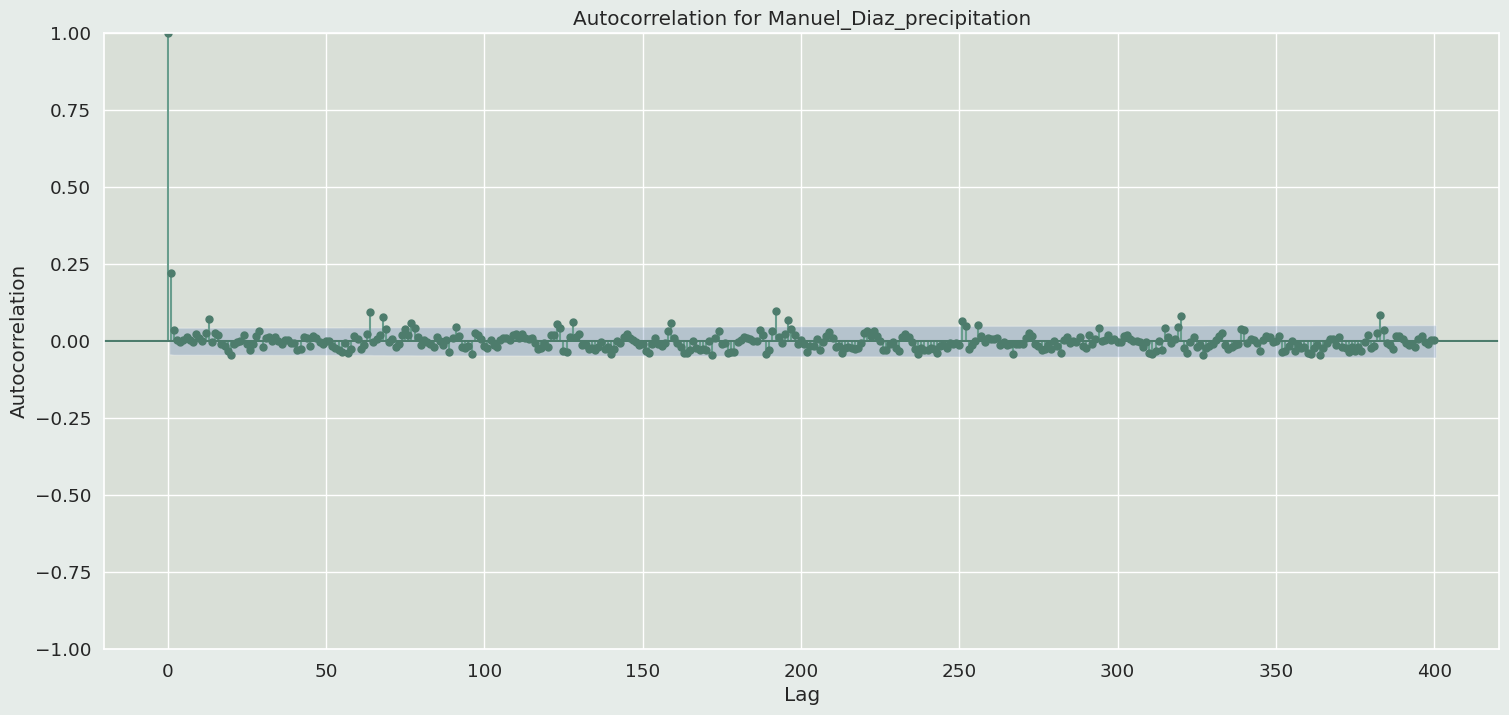

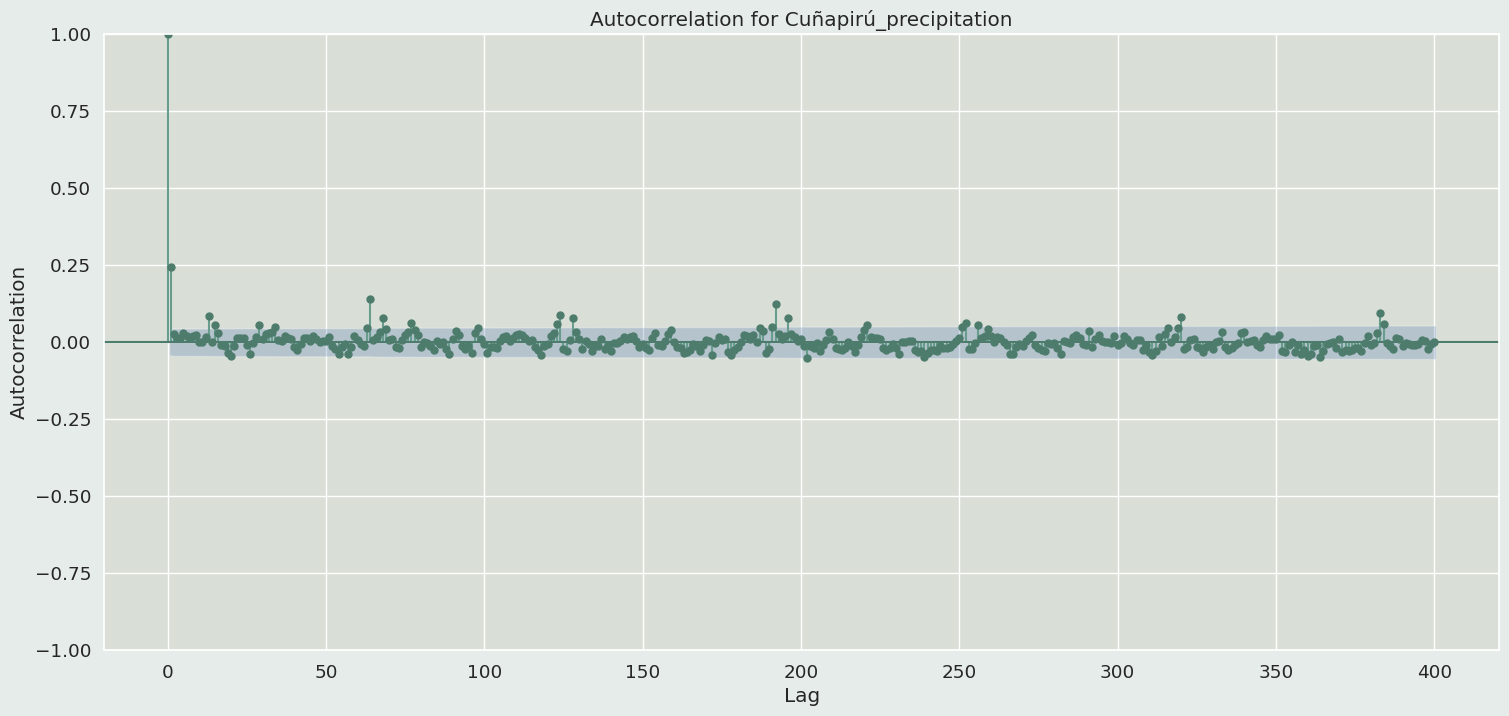

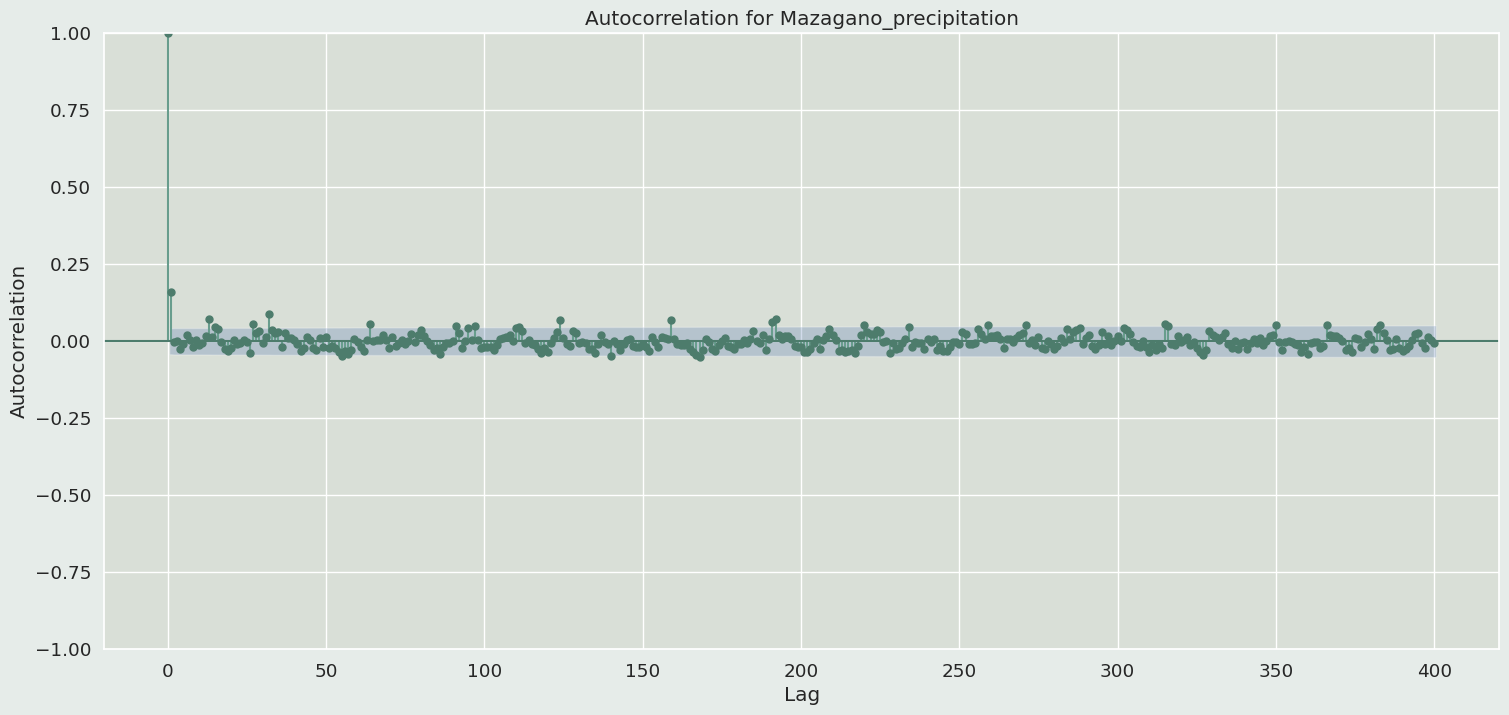

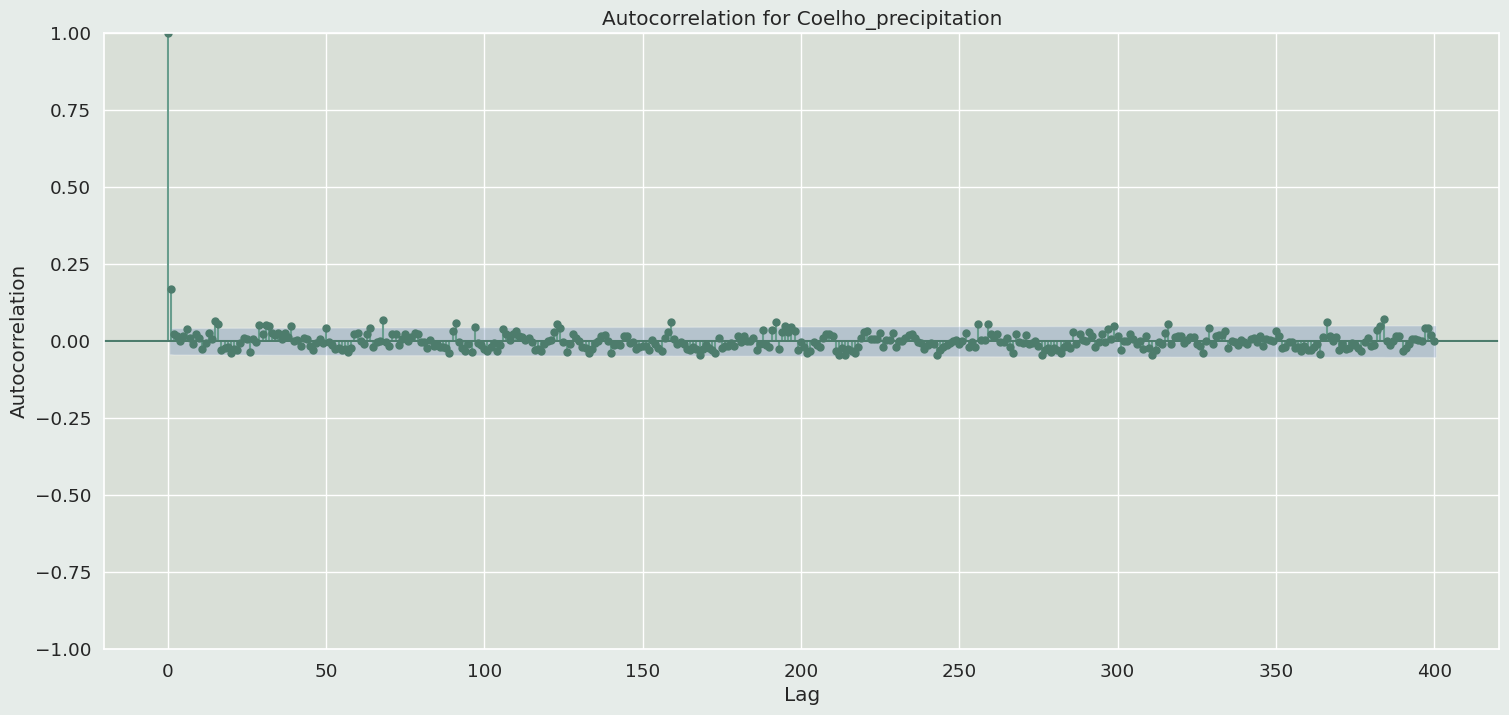

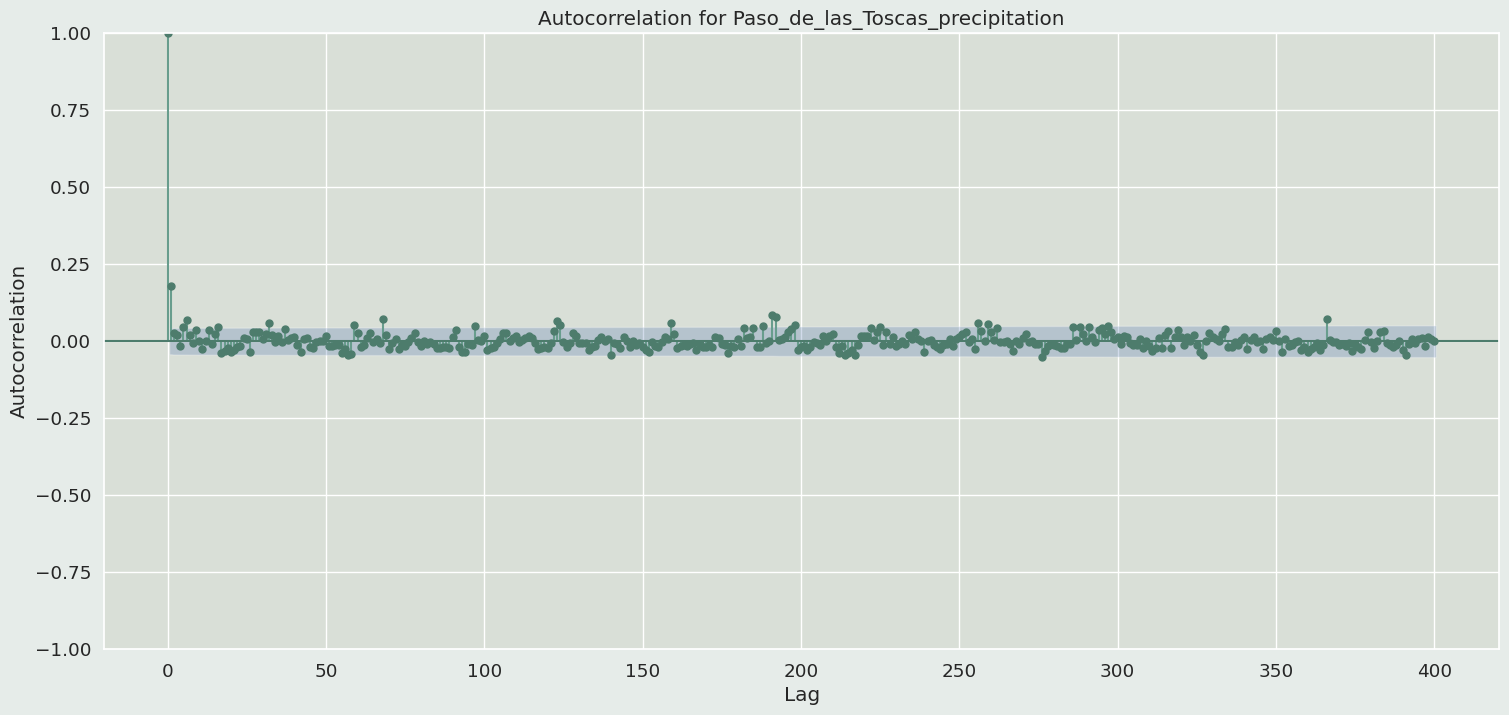

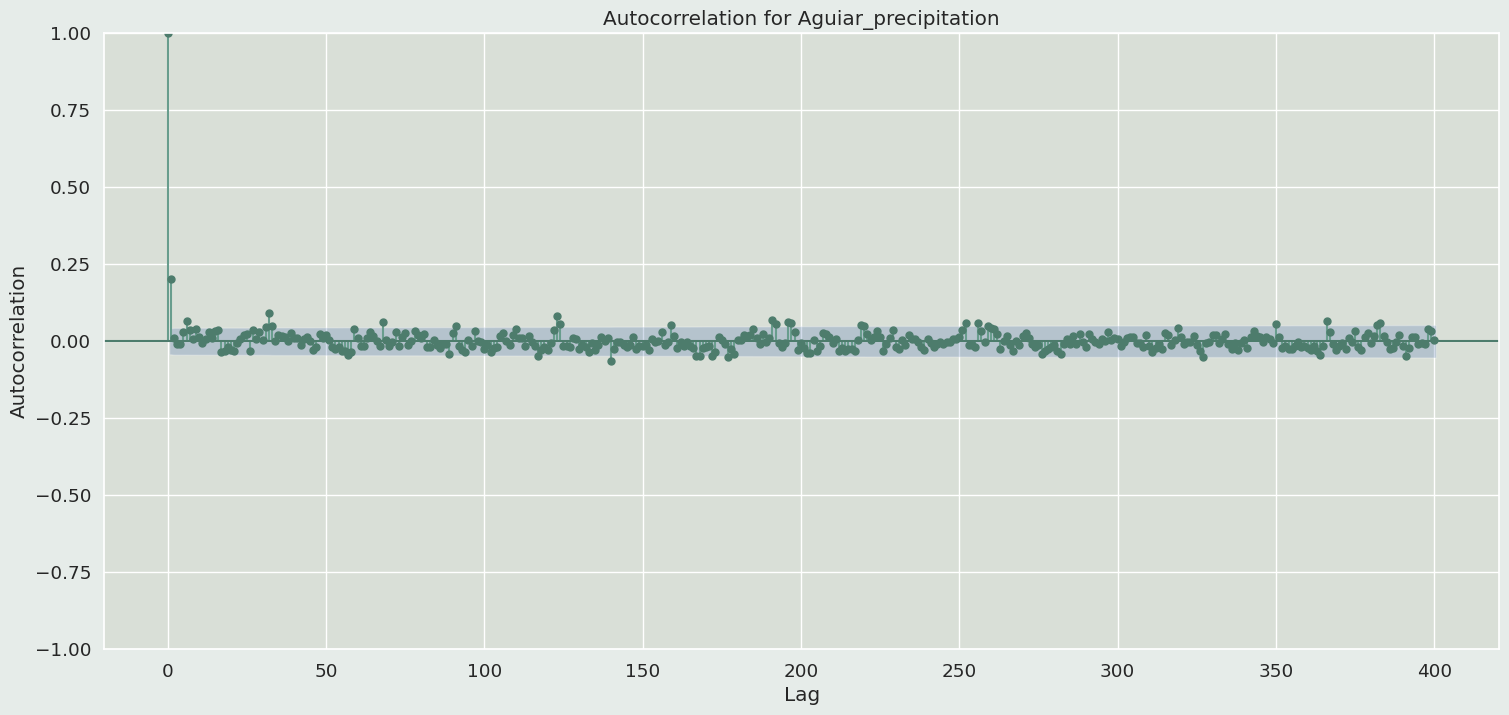

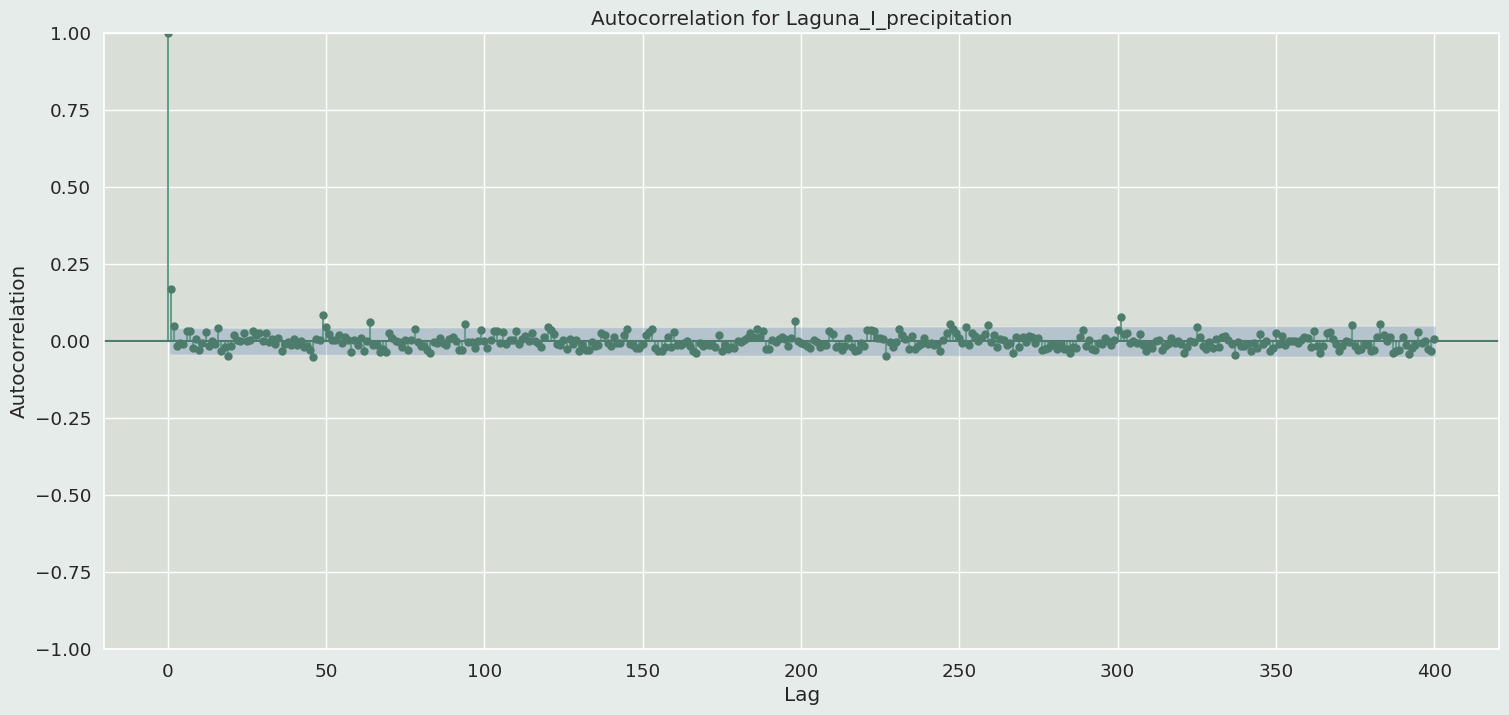

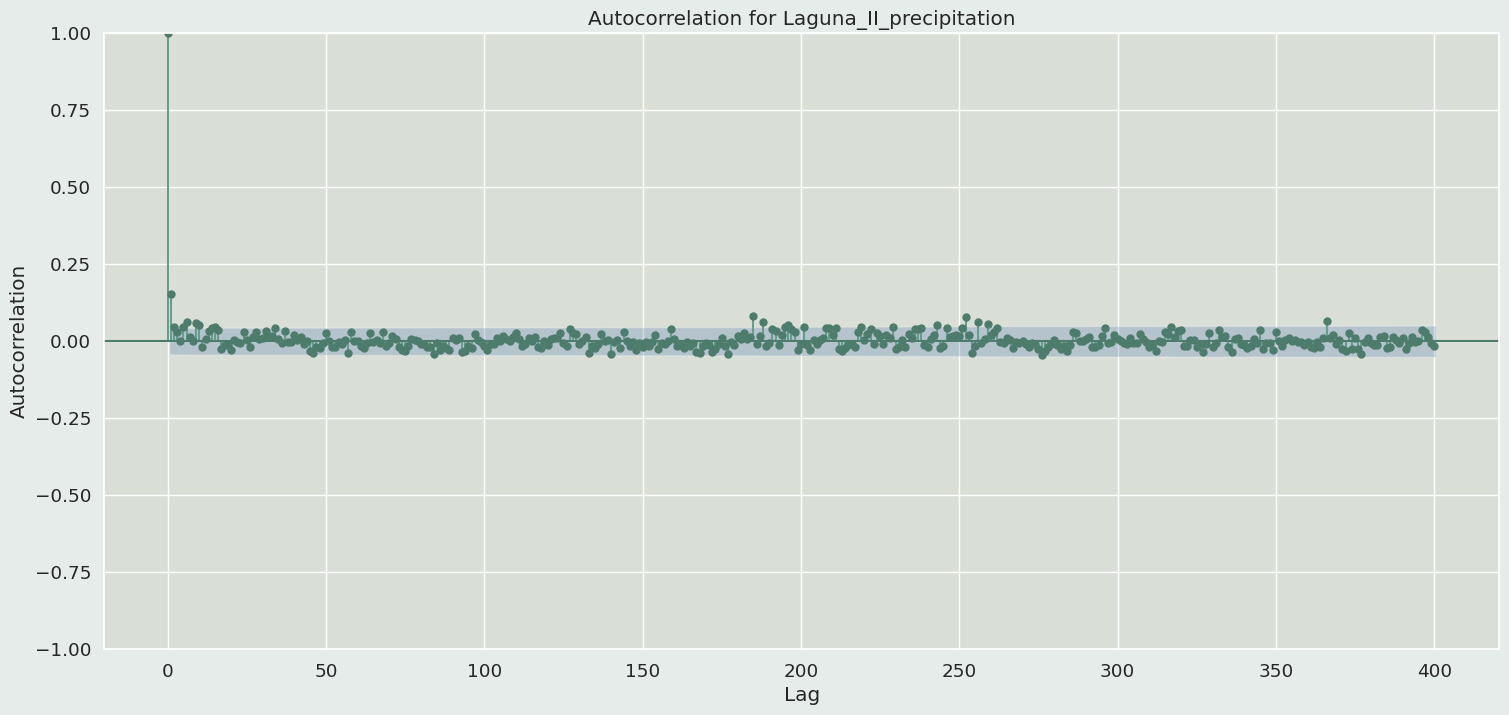

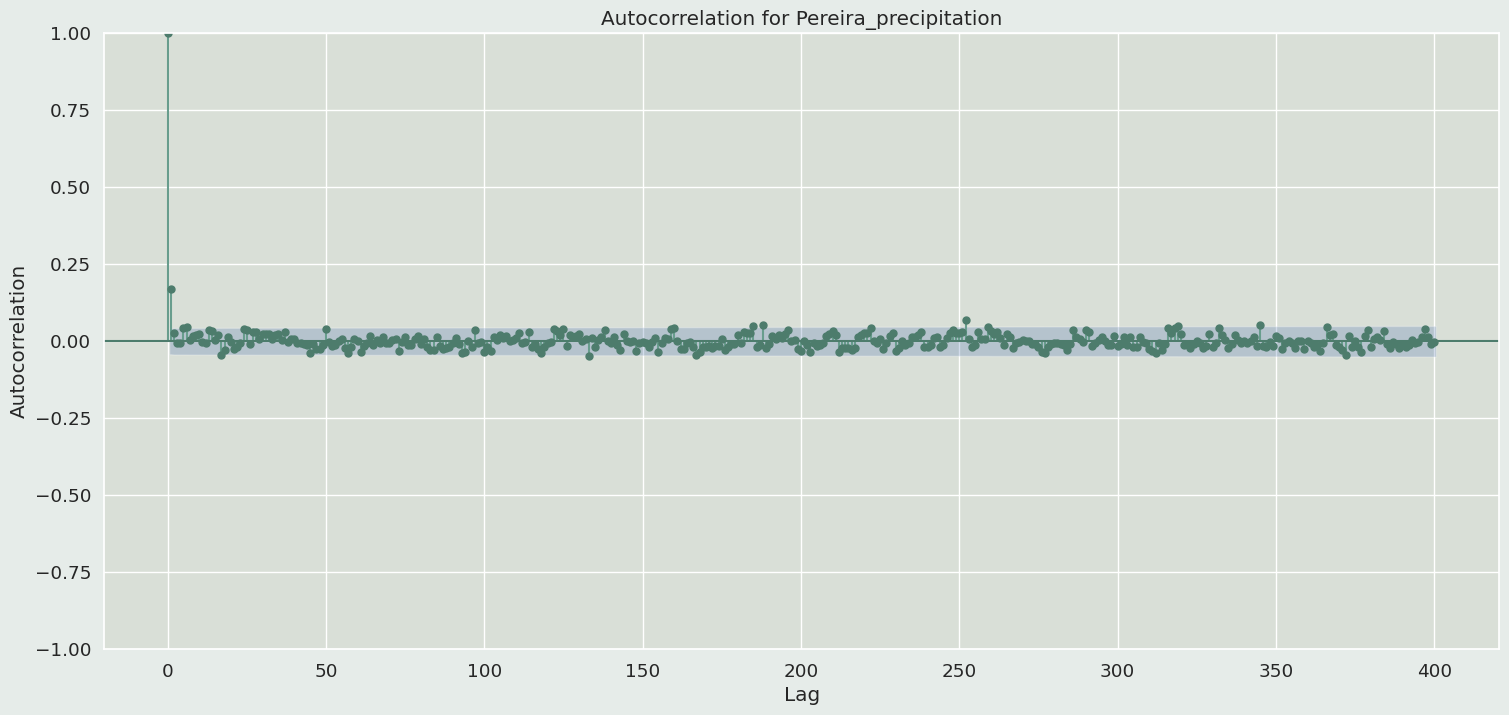

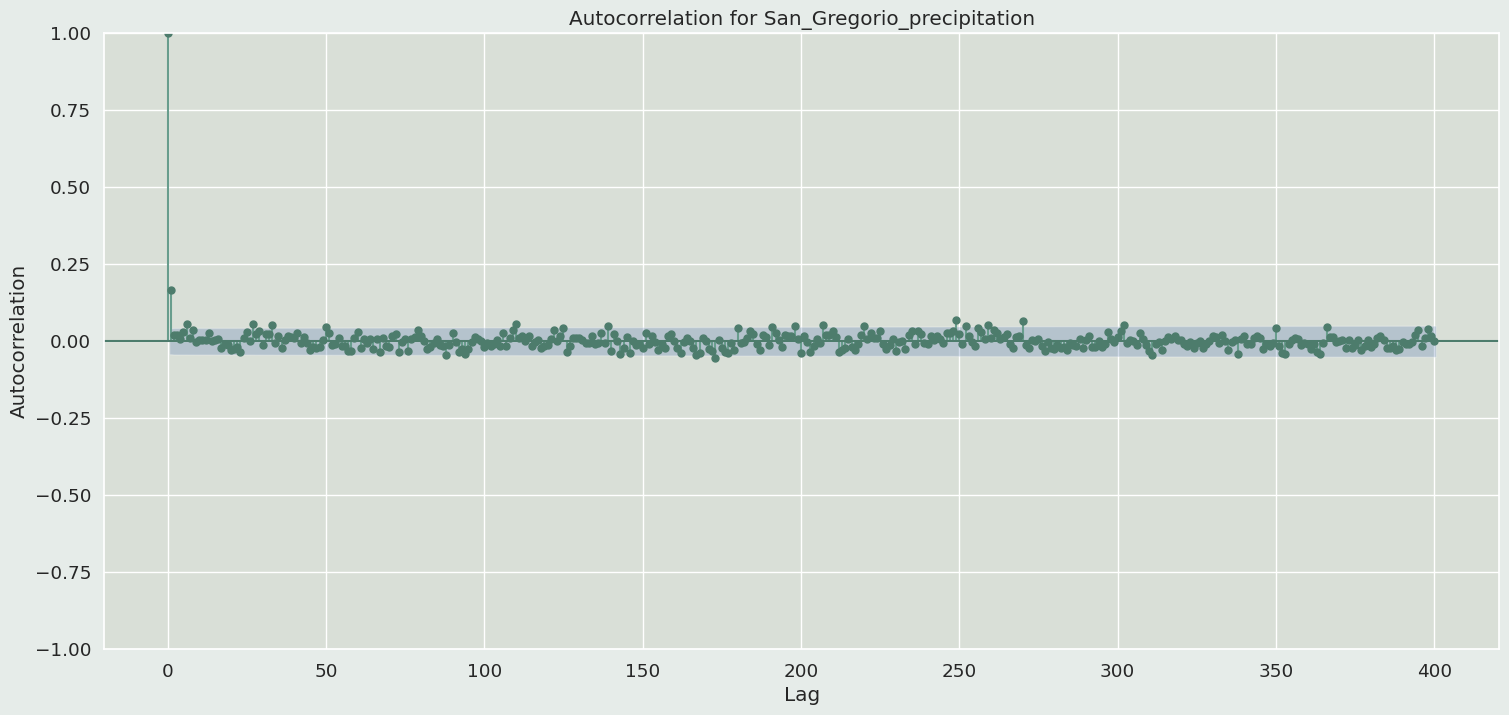

In [ ]:
plot_autocorrelation(data_Negro_uruguai, Negro_uruguai_columns_name, 400, Negro_uruguai_metrics_path + "Autocorrelation/")

In [ ]:
plot_power_spectrum(data_Negro_uruguai, Negro_uruguai_columns_name, 1, Negro_uruguai_metrics_path + "Power_Spectrum/", is_loglog = True)

In [ ]:
plot_moving_average(data_Negro_uruguai, Negro_uruguai_columns_name, 7, Negro_uruguai_metrics_path + "Moving_Average/")

Organizing column names

#### Time series graphs

In [ ]:
for index, column in enumerate(level):
    plot_time_series(data = data_Negro_uruguai,
                     time_column = "dt.1",
                     value_column_1 = column,
                     value_column_2 = precipitation[index],
                     output_path = path + f"Negro_uruguai_visualizations/time_series_graphs/",
                     file_name = "time_series_{column[:-6]}.png",
                     title_1 = f"{column[:-6]} height",
                     title_2 = f"{precipitation[index][:-14]} precipitation")

In [ ]:
# Organizing column labels
level = []
precipitation = []

for column in data_Negro_uruguai.columns:
    if "_level" in column:
        level.append(column)
    if "_precipitation" in column:
        precipitation.append(column)

#### Histogram charts

In [ ]:
for column in data_Negro_uruguai.columns.drop(["dt", "dt.1"]):
    plot_histogram(data = data_Negro_uruguai,
                   column = column,
                   save_to_file = path + f"Negro_uruguai_visualizations/histogram_charts/",
                   title = f"{column} distribution")

#### Boxplot graphs

In [ ]:
for index, column in enumerate(level):
    plot_boxplot(data = data_Negro_uruguai,
                 columns = [column, precipitation[index]],
                 save_to_file = path + f"Negro_uruguai_visualizations/boxplot_graphs/",
                 display_graph = False,
                 titles = [f"{column[:-6]} height", f"{precipitation[index][:-14]} precipitation"])

#### Violin graphs

In [ ]:
for index, column in enumerate(level):
    plot_violinplot(data = data_Negro_uruguai,
                 columns = [column, precipitation[index]],
                 save_to_file = path + f"Negro_uruguai_visualizations/violin_plots/",
                 display_graph = False,
                 titles = [f"{column[:-6]} height", f"{precipitation[index][:-14]} precipitation"])

## Example of how to handle missing data

In [ ]:
# Example of dataframe with missing data
df_missing_data = data_Negro_uruguai.copy()
df_missing_data.head(5)

In [ ]:
from copy import deepcopy

# Creating a copy of the DataFrame to work with
data_with_no_missing = deepcopy(data_Negro_uruguai)

# Handling missing values: Filling with 0
data_with_no_missing = handle_missing_values(data_with_no_missing, method="fill_zeros")

# Displaying data with handled missing values
print("Data with handled missing values:")
data_with_no_missing

In [ ]:
# Normalizing data between 0 and 1
normalized_data, original_min_max = normalize_data(data_no_outliers, columns=Negro_uruguai_columns_name, method="min_max")

# Displaying the normalized data
print("Normalized data:")
display(normalized_data)

# Storing `original_min_max` for inverse normalization, if needed
print("Original values for inversion:")
display(original_min_max)

In [ ]:
# Detecting and handling outliers: Replacing with the mean
data_no_outliers = detect_and_handle_outliers(data_with_no_missing, columns=Negro_uruguai_columns_name, method="fill_mean")

# Displaying data with treated outliers
print("Data with treated outliers:")
data_no_outliers

In [ ]:
# Splitting the normalized data into training, validation, and test sets
features = Negro_uruguai_columns_name
target_column = 35  # Define the target variable
date_column = 'dt'
date_split = '2022-01-04'  # Cutoff date for separating training/test datasets

x_train, x_val, y_train, y_val, x_test, y_test, date_train, date_test = split_train_validation(
    normalized_data,
    features=features,
    target_index=target_column,  # Can be name or index
    date_column=date_column,
    date_split=date_split,
    test_size=0.2,
    seed_number=42
)

# Displaying the generated sets
print("Train (X):")
print(x_train)
print("Train (Y):")
print(y_train)
print("Validation (X):")
print(x_val)
print("Validation (Y):")
print(y_val)
print("Test (X):")
print(x_test)
print("Test (Y):")
print(y_test)

#### Detectando outliers

In [ ]:
data_with_no_missing = handle_missing_values(df_missing_data, method="fill_zeros")


In [ ]:
# Detecting and handling outliers: Replacing with the mean
data_no_outliers = detect_and_handle_outliers(data_with_no_missing, columns=johan_columns_name, method="fill_mean")
data_no_outliers